In [211]:
import os
import warnings

import scanpy as sc
import pandas as pd
import numpy as np

from numba.core.errors import NumbaDeprecationWarning
from pathlib import Path

warnings.filterwarnings("ignore", category=NumbaDeprecationWarning)

sc.logging.print_header()

scanpy==1.9.3 anndata==0.9.2 umap==0.5.3 numpy==1.24.4 scipy==1.11.1 pandas==1.5.3 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.6 pynndescent==0.5.10


In [212]:
import dandelion as ddl

ddl.logging.print_header()

dandelion==0.3.3.dev41 pandas==1.5.3 numpy==1.24.4 matplotlib==3.7.2 networkx==3.1 scipy==1.11.1


In [213]:
FILEPATH = Path("/Users/uqssoon/Documents/Projects/InezMara/transfer_3137871_files_bbccc5c2/")

In [214]:
#import pandas as pd

#tcr_files = []
#for sample in samples:
#    file_location = (
#        sample + "/dandelion/" + sample + "_t_filtered_contig_dandelion.tsv"
#    )
#    tcr_files.append(pd.read_csv(file_location, sep="\t"))
#tcr = pd.concat(tcr_files, ignore_index=True)
#tcr.reset_index(inplace=True, drop=True)
#tcr

bcr = []
for x in ["TCR_Control", "TCR_KO"]:
    bcr.append(
        ddl.load_data(
            FILEPATH
            / x
            / "dandelion"
            / "tmp"
            / "all_contig_igblast_db-all.tsv"
        )
    )

In [215]:
bcr = pd.concat(bcr)
#bcr.reset_index(inplace=True, drop=True)
#bcr

In [216]:
adatas = []
for x in ["Control", "KO"]:
    adatas.append(sc.read_h5ad(FILEPATH / ("TCR_" + x) / (x + "Filt_forVDJ.h5ad")))

In [217]:
adata = adatas[0].concatenate(adatas[1], index_unique=None)
adata

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html


AnnData object with n_obs × n_vars = 15401 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch'
    var: 'gene_ids-Control', 'feature_types-Control', 'genome-Control', 'n_cells-Control', 'n_counts-Control', 'mito-Control', 'hemo-Control', 'ribo-Control', 'n_cells_by_counts-Control', 'mean_counts-Control', 'pct_dropout_by_counts-Control', 'total_counts-Control', 'gene_ids-Krt76-/-', 'feature_types-Krt76-/-', 'genome-Krt76-/-', 'n_cells-Krt76-/-', 'n_counts-Krt76-/-', 'mito-Krt76-/-', 'hemo-Krt76-/-', 'ribo-Krt76-/-', 'n_cells_by_counts-Krt76-/-', 'mean_counts-Krt76-/-', 'pct_dropout_by_counts-Krt76-/-', 'total_counts-Krt76-/-', 'n_cells', 'n_counts', 'mito', 'hemo', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts',

In [218]:
adata.obs

n_genes  n_counts  n_genes_by_counts  \
AAACCTGAGAGAACAG-1-Control      3862   13554.0               3862   
AAACCTGAGCCATCGC-1-Control      3860   14011.0               3859   
AAACCTGAGGTGCAAC-1-Control      3118    8308.0               3116   
AAACCTGAGTCCATAC-1-Control      1705    3342.0               1705   
AAACCTGAGTTAAGTG-1-Control      1738    3108.0               1737   
...                              ...       ...                ...   
TTTGTCAGTCACCTAA-1-Krt76-/-     2958    6684.0               2958   
TTTGTCAGTCTAGAGG-1-Krt76-/-     1336    2274.0               1336   
TTTGTCAGTGGGTCAA-1-Krt76-/-     2642    5939.0               2642   
TTTGTCATCCCAAGTA-1-Krt76-/-     1325    2397.0               1325   
TTTGTCATCGGAATCT-1-Krt76-/-     2185    4290.0               2185   

                             total_counts  total_counts_mito  pct_counts_mito  \
AAACCTGAGAGAACAG-1-Control        13554.0              102.0         0.752545   
AAACCTGAGCCATCGC-1-Control        14010.0               43.0         0.306924   
AAACCTGAGGTGCAAC-1-Control         8306.0               77.0         0.927041   
AAACCTGAGTCCATAC-1-Control         3342.0               69.0         2.064632   
AAACCTGAGTTAAGTG-1-Control         3107.0               42.0         1.351786   
...                                   ...                ...              ...   
TTTGTCAGTCACCTAA-1-Krt76-/-        6684.0              102.0         1.526032   
TTTGTCAGTCTAGAGG-1-Krt76-/-        2274.0               37.0         1.627089   
TTTGTCAGTGGGTCAA-1-Krt76-/-        5939.0              104.0         1.751137   
TTTGTCATCCCAAGTA-1-Krt76-/-        2397.0               49.0         2.044222   
TTTGTCATCGGAATCT-1-Krt76-/-        4290.0               85.0         1.981352   

                             total_counts_hemo  pct_counts_hemo  \
AAACCTGAGAGAACAG-1-Control                 0.0              0.0   
AAACCTGAGCCATCGC-1-Control                 0.0              0.0   
AAACCTGAGGTGCAAC-1-Control                 0.0              0.0   
AAACCTGAGTCCATAC-1-Control                 0.0              0.0   
AAACCTGAGTTAAGTG-1-Control                 0.0              0.0   
...                                        ...              ...   
TTTGTCAGTCACCTAA-1-Krt76-/-                0.0              0.0   
TTTGTCAGTCTAGAGG-1-Krt76-/-                0.0              0.0   
TTTGTCAGTGGGTCAA-1-Krt76-/-                0.0              0.0   
TTTGTCATCCCAAGTA-1-Krt76-/-                0.0              0.0   
TTTGTCATCGGAATCT-1-Krt76-/-                0.0              0.0   

                             total_counts_ribo  pct_counts_ribo  \
AAACCTGAGAGAACAG-1-Control              3427.0        25.284048   
AAACCTGAGCCATCGC-1-Control              3580.0        25.553175   
AAACCTGAGGTGCAAC-1-Control              1745.0        21.008909   
AAACCTGAGTCCATAC-1-Control               827.0        24.745661   
AAACCTGAGTTAAGTG-1-Control               472.0        15.191503   
...                                        ...              ...   
TTTGTCAGTCACCTAA-1-Krt76-/-             1168.0        17.474566   
TTTGTCAGTCTAGAGG-1-Krt76-/-              323.0        14.204046   
TTTGTCAGTGGGTCAA-1-Krt76-/-             1212.0        20.407476   
TTTGTCATCCCAAGTA-1-Krt76-/-              594.0        24.780977   
TTTGTCATCGGAATCT-1-Krt76-/-              853.0        19.883450   

                             doublet_score  predicted_doublet    Sample  \
AAACCTGAGAGAACAG-1-Control        0.060215              False   Control   
AAACCTGAGCCATCGC-1-Control        0.043403              False   Control   
AAACCTGAGGTGCAAC-1-Control        0.042290              False   Control   
AAACCTGAGTCCATAC-1-Control        0.179161              False   Control   
AAACCTGAGTTAAGTG-1-Control        0.012745              False   Control   
...                                    ...                ...       ...   
TTTGTCAGTCACCTAA-1-Krt76-/-       0.185714              False  Krt76-/-   
TTTGTCAGTCTAGAGG-

In [219]:
bcr

sequence_id  \
sequence_id                                                                  
AAACCTGAGAAAGTGG-1-Control_contig_1    AAACCTGAGAAAGTGG-1-Control_contig_1   
AAACCTGAGAAAGTGG-1-Control_contig_2    AAACCTGAGAAAGTGG-1-Control_contig_2   
AAACCTGAGAAAGTGG-1-Control_contig_5    AAACCTGAGAAAGTGG-1-Control_contig_5   
AAACCTGAGAAAGTGG-1-Control_contig_4    AAACCTGAGAAAGTGG-1-Control_contig_4   
AAACCTGAGAAAGTGG-1-Control_contig_3    AAACCTGAGAAAGTGG-1-Control_contig_3   
...                                                                    ...   
TTTGTCAGTCTAGAGG-1-Krt76-/-_contig_2  TTTGTCAGTCTAGAGG-1-Krt76-/-_contig_2   
TTTGTCAGTCTAGAGG-1-Krt76-/-_contig_3  TTTGTCAGTCTAGAGG-1-Krt76-/-_contig_3   
TTTGTCATCGGAATCT-1-Krt76-/-_contig_1  TTTGTCATCGGAATCT-1-Krt76-/-_contig_1   
TTTGTCATCTTCCTTC-1-Krt76-/-_contig_3  TTTGTCATCTTCCTTC-1-Krt76-/-_contig_3   
TTTGTCATCTTCCTTC-1-Krt76-/-_contig_2  TTTGTCATCTTCCTTC-1-Krt76-/-_contig_2   

                                                                               sequence  \
sequence_id                                                                               
AAACCTGAGAAAGTGG-1-Control_contig_1   AATACCCGTCTGGAGCCTGATTCCACCATGAGCTGCAGGCTTCTCC...   
AAACCTGAGAAAGTGG-1-Control_contig_2   GGAGTCTGTAAGCACAAGTGTGTCTGGGCACAAGACACCCTTCAGA...   
AAACCTGAGAAAGTGG-1-Control_contig_5   GGTGACAAAGAGGAGGAAACCCAGTGATATAGATGTTCTCCCAGAG...   
AAACCTGAGAAAGTGG-1-Control_contig_4   GGGGAGAATCCCCAGTGGAGAGAGATAAAGAGCAAATGATGAAATC...   
AAACCTGAGAAAGTGG-1-Control_contig_3   GAAAAAGAAGAACAGGGGGTAAAGAGGAAACCCCTGCATTAGCTCG...   
...                                                                                 ...   
TTTGTCAGTCTAGAGG-1-Krt76-/-_contig_2  TGGGCTGTAAGCCCAAGTGTGTCTGGGCACAAGACACCCTTCAGAG...   
TTTGTCAGTCTAGAGG-1-Krt76-/-_contig_3  GAGCTTCTTGGCAACTGCAGCGGGGAGTTCTGGGGCTTCTGGCGTC...   
TTTGTCATCGGAATCT-1-Krt76-/-_contig_1  TCTCGTGCTTACGTGGAGTTTCTATGAGTGAAGCCACTGCCTCATC...   
TTTGTCATCTTCCTTC-1-Krt76-/-_contig_3  GGGAAGCACGTTTAGAGAAATCTGACTCTGCTGCACTCACCAGTGC...   
TTTGTCATCTTCCTTC-1-Krt76-/-_contig_2  GAAGAGTTGAGAGCAGCACTCTACACTGAACATGAATACTTCTCCA...   

                                     rev_comp productive  \
sequence_id                                                
AAACCTGAGAAAGTGG-1-Control_contig_1         F          T   
AAACCTGAGAAAGTGG-1-Control_contig_2         F          T   
AAACCTGAGAAAGTGG-1-Control_contig_5       NaN          F   
AAACCTGAGAAAGTGG-1-Control_contig_4         F          F   
AAACCTGAGAAAGTGG-1-Control_contig_3       NaN          F   
...                                       ...        ...   
TTTGTCAGTCTAGAGG-1-Krt76-/-_contig_2        F          T   
TTTGTCAGTCTAGAGG-1-Krt76-/-_contig_3      NaN          F   
TTTGTCATCGGAATCT-1-Krt76-/-_contig_1        F          T   
TTTGTCATCTTCCTTC-1-Krt76-/-_contig_3        F          F   
TTTGTCATCTTCCTTC-1-Krt76-/-_contig_2        F          F   

                                                       v_call    d_call  \
sequence_id                                                               
AAACCTGAGAAAGTGG-1-Control_contig_1                  TRBV5*01       NaN   
AAACCTGAGAAAGTGG-1-Control_contig_2   TRAV4D-4*03,TRAV4N-4*01       NaN   
AAACCTGAGAAAGTGG-1-Control_contig_5                       NaN  TRBD2*01   
AAACCTGAGAAAGTGG-1-Control_contig_4                TRAV7-5*03       NaN   
AAACCTGAGAAAGTGG-1-Control_contig_3                       NaN       NaN   
...                                                       ...       ...   
TTTGTCAGTCTAGAGG-1-Krt76-/-_contig_2          TRAV4-4/DV10*02       NaN   
TTTGTCAGTCTAGAGG-1-Krt76-/-_contig_3                      NaN       NaN   
TTTGTCATCGGAATCT-1-Krt76-/-_contig_1                TRBV16*01  TRBD2*01   
TTTGTCATCTTCCTTC-1-Krt76-/-_contig_3                 TRDV1*02       NaN   
TTTGTCATCTTCCTTC-1-Krt76-/-_contig_2               TRAV6-4*03       NaN   

                                                             j_call  \
sequence_id                         

In [15]:
#adata.write_h5ad(os.path.expanduser("~/Downloads/ines.h5ad"), compression="gzip")
adatax.write_h5ad("adata_ines_MS.h5ad", compression = "gzip")

We look at both productive and non-productive contigs as a start because these are thymocytes.

In [220]:
vdj, adatax = ddl.pp.check_contigs(bcr, adata, productive_only=False)


Preparing data: 31039it [00:03, 9850.68it/s] 
Scanning for poor quality/ambiguous contigs: 100%|██████████| 11141/11141 [00:17<00:00, 628.85it/s]


In [221]:
vdj_1 = vdj[vdj.data.productive == "T"].copy()
vdj_2 = vdj[vdj.data.productive == "F"].copy()

In [ ]:
adata_1 = adata.copy()
adata_2 = adata.copy()

ddl.tl.transfer(adata_1, vdj_1)
ddl.tl.transfer(adata_2, vdj_2)

In [222]:
vdj

Dandelion class object with n_obs = 9754 and n_contigs = 28027
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon', 'vj_in_frame', 'locus', 'c_call', 'junction_length', 'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end', 'v_germline_start', 'v_germline_end', 'd_sequence_start', 'd_sequence_end', 'd_germline_start', 'd_germline_end', 'j_sequence_start', 'j_sequence_end', 'j_germline_start', 'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score', 'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1', 'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'cell_id', 'consensus_count', 'duplicate_count', 'v_call_10x', 'd_call_10x', 'j_call_10x', 'junction_10x', 'junction_10x_aa', 'j_support_igblastn', 'j_score_igblastn', 'j_call_igblastn', 'j_call_blastn', 'j_identity_blastn', 'j_alignment_length_bl

In [223]:
vdj.data

sequence_id  \
sequence_id                                                                  
AAACCTGAGAGAACAG-1-Control_contig_1    AAACCTGAGAGAACAG-1-Control_contig_1   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_1  AAACCTGAGAGTCGGT-1-Krt76-/-_contig_1   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_3  AAACCTGAGAGTCGGT-1-Krt76-/-_contig_3   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_2  AAACCTGAGAGTCGGT-1-Krt76-/-_contig_2   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_4  AAACCTGAGAGTCGGT-1-Krt76-/-_contig_4   
...                                                                    ...   
TTTGTCATCCTTAATC-1-Control_contig_2    TTTGTCATCCTTAATC-1-Control_contig_2   
TTTGTCATCGGAATCT-1-Krt76-/-_contig_1  TTTGTCATCGGAATCT-1-Krt76-/-_contig_1   
TTTGTCATCTTCCTTC-1-Control_contig_1    TTTGTCATCTTCCTTC-1-Control_contig_1   
TTTGTCATCTTCCTTC-1-Control_contig_3    TTTGTCATCTTCCTTC-1-Control_contig_3   
TTTGTCATCTTCCTTC-1-Control_contig_2    TTTGTCATCTTCCTTC-1-Control_contig_2   

                                                                               sequence  \
sequence_id                                                                               
AAACCTGAGAGAACAG-1-Control_contig_1   CAAATATTCCTTTCCTGTTCTGGACCATCCATGGATCCTAGACTTC...   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_1  GTCACATCAGTGCTCATCCCACTATGGGCATCCAGACCCTCTGTTG...   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_3  ATTCTAGTCATCATAGTTAGCCAGGTGGAGCCCCTGCATAGCGCGT...   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_2  GAGACTGATTCTTTTTCTTTTCCAGAGACCACACATGGTGATGGTG...   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_4  GGGGTTTCTCTTGGGAGTCACAGGGTTGTGCAGCCCTTGCCCTGAC...   
...                                                                                 ...   
TTTGTCATCCTTAATC-1-Control_contig_2   GAGACAAACCTCTCTGCCACCTGGTCTCCCTGCCCCTGCCCAGGCT...   
TTTGTCATCGGAATCT-1-Krt76-/-_contig_1  TCTCGTGCTTACGTGGAGTTTCTATGAGTGAAGCCACTGCCTCATC...   
TTTGTCATCTTCCTTC-1-Control_contig_1   TGGGGAGACCTCTCTTAAGCGAAGGTGGTGTGAAGTCAACACTGAA...   
TTTGTCATCTTCCTTC-1-Control_contig_3   TGGGGCTCTCTCACCAAAGAGACCAGTATCCTGAGAGGAAGCATGT...   
TTTGTCATCTTCCTTC-1-Control_contig_2   GGGCTGATTGGCAGCCGATTGAACAGCCTATGCGAGCTTCTTGGCA...   

                                     rev_comp productive               v_call  \
sequence_id                                                                     
AAACCTGAGAGAACAG-1-Control_contig_1         F          T            TRBV17*01   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_1        F          T            TRBV15*01   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_3        F          T  TRBV19*01,TRBV19*03   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_2        F          T            TRBV19*01   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_4      NaN          F                  NaN   
...                                       ...        ...                  ...   
TTTGTCATCCTTAATC-1-Control_contig_2       NaN          F                  NaN   
TTTGTCATCGGAATCT-1-Krt76-/-_contig_1        F          T            TRBV16*01   
TTTGTCATCTTCCTTC-1-Control_contig_1         F          T            TRBV20*01   
TTTGTCATCTTCCTTC-1-Control_contig_3         F          F          TRBV13-2*01   
TTTGTCATCTTCCTTC-1-Control_contig_2       NaN          F                  NaN   

                                        d_call      j_call  \
sequence_id                                                  
AAACCTGAGAGAACAG-1-Control_contig_1        NaN  TRBJ2-5*01   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_1       NaN  TRBJ2-1*01   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_3       NaN  TRBJ2-5*01   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_2       NaN  TRBJ2-5*01   
AAACCTGAGAGTCGGT-1-Krt76-/-_contig_4       NaN  TRBJ2-6*01   
...                                        ...         ...   
TTTGTCATCCTTAATC-1-Control_contig_2        NaN  TRBJ2-4*01   
TTTGTCATCGGAATCT-1-Krt76-/-_contig_1  TRBD2*01  TRBJ2-5*01   
TTTGTCATCTTCCTTC-1-Control_contig_1        NaN  TRBJ1-6*01   
TTTGTCATCTTCCTTC-1-Control_contig_3        NaN  TRBJ2-7*01   
TTTGTCATCTTCCTTC-1-Control_contig_2        NaN  TRBJ2-6*01   

   

In [13]:
vdj.metadata

locus_VDJ locus_VJ productive_VDJ  \
AAACCTGAGAGAACAG-1-Control                  TRB     None              T   
AAACCTGAGGTGCAAC-1-Control              TRB|TRB  TRA|TRA            T|F   
AAACCTGAGTTAAGTG-1-Control          TRB|TRB|TRB      TRA          T|T|F   
AAACCTGCAAGTTCTG-1-Control  TRB|TRB|TRB|TRB|TRB      TRA      T|T|F|F|F   
AAACCTGCATCTCCCA-1-Control                  TRB     None              T   
...                                         ...      ...            ...   
TGAGGGATCGCCTGTT-1-Control                 None      TRA           None   
TGCTACCAGCGTTGCC-1-Control                 None      TRA           None   
TGGACGCCATCGATGT-1-Control                 None  TRA|TRA           None   
TGGGCGTGTTCCACTC-1-Control                 None      TRA           None   
TTCCCAGCAGTAAGCG-1-Control                 None      TRA           None   

                           productive_VJ         v_call_VDJ d_call_VDJ  \
AAACCTGAGAGAACAG-1-Control          None             TRBV17       None   
AAACCTGAGGTGCAAC-1-Control           T|F             TRBV26      TRBD2   
AAACCTGAGTTAAGTG-1-Control             T  TRBV13-2|TRBV13-2      TRBD2   
AAACCTGCAAGTTCTG-1-Control             T     TRBV5|TRBV13-1      TRBD1   
AAACCTGCATCTCCCA-1-Control          None              TRBV5       None   
...                                  ...                ...        ...   
TGAGGGATCGCCTGTT-1-Control             T               None       None   
TGCTACCAGCGTTGCC-1-Control             F               None       None   
TGGACGCCATCGATGT-1-Control           F|F               None       None   
TGGGCGTGTTCCACTC-1-Control             F               None       None   
TTCCCAGCAGTAAGCG-1-Control             F               None       None   

                                                         j_call_VDJ  \
AAACCTGAGAGAACAG-1-Control                                  TRBJ2-5   
AAACCTGAGGTGCAAC-1-Control                          TRBJ2-7|TRBJ2-5   
AAACCTGAGTTAAGTG-1-Control                  TRBJ2-3|TRBJ2-4|TRBJ2-7   
AAACCTGCAAGTTCTG-1-Control  TRBJ1-1|TRBJ2-5|TRBJ1-3|TRBJ2-1|TRBJ2-6   
AAACCTGCATCTCCCA-1-Control                                  TRBJ2-3   
...                                                             ...   
TGAGGGATCGCCTGTT-1-Control                                     None   
TGCTACCAGCGTTGCC-1-Control                                     None   
TGGACGCCATCGATGT-1-Control                                     None   
TGGGCGTGTTCCACTC-1-Control                                     None   
TTCCCAGCAGTAAGCG-1-Control                                     None   

                                                    v_call_VJ      j_call_VJ  \
AAACCTGAGAGAACAG-1-Control                               None           None   
AAACCTGAGGTGCAAC-1-Control  TRAV7-2,TRAV7D-2|TRAV4-3,TRAV4D-3  TRAJ31|TRAJ34   
AAACCTGAGTTAAGTG-1-Control         TRAV15N-2,TRAV15D-2/DV6D-2         TRAJ58   
AAACCTGCAAGTTCTG-1-Control              TRAV4D-4,TRAV4-4/DV10         TRAJ39   
AAACCTGCATCTCCCA-1-Control                               None           None   
...                                                       ...            ...   
TGAGGGATCGCCTGTT-1-Control                  TRAV6D-7,TRAV6N-7         TRAJ42   
TGCTACCAGCGTTGCC-1-Control                            TRAV5-4         TRAJ43   
TGGACGCCATCGATGT-1-Control                   TRAV6-6,TRAV6D-6  TRAJ19|TRAJ22   
TGGGCGTGTTCCACTC-1-Control                TRAV12N-3,TRAV12D-3          TRAJ6   
TTCCCAGCAGTAAGCG-1-Control                  TRAV3N-3,TRAV3D-3          TRAJ4   

                                               c_call_VDJ  ...  \
AAACCTGAGAGAACAG-1-Control                          TRBC2  ...   
AAACCTGAGGTGCAAC-1-Control                    TRBC2|TRBC2  ...   
AAACCTGAGTTAAGTG-1-Control              TRBC2|TRBC2|TRBC2  ...   
AAACCTGCAAGTTCTG-1-Control  TRBC1|TRBC2|TRBC1|TRBC2|TRBC2  ...   
AAACCTGCATCTCCCA-1-Control                          TRBC2  ...   
...                                   

In [14]:
adata

AnnData object with n_obs × n_vars = 15401 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch'
    var: 'gene_ids-Control', 'feature_types-Control', 'genome-Control', 'n_cells-Control', 'n_counts-Control', 'mito-Control', 'hemo-Control', 'ribo-Control', 'n_cells_by_counts-Control', 'mean_counts-Control', 'pct_dropout_by_counts-Control', 'total_counts-Control', 'gene_ids-Krt76-/-', 'feature_types-Krt76-/-', 'genome-Krt76-/-', 'n_cells-Krt76-/-', 'n_counts-Krt76-/-', 'mito-Krt76-/-', 'hemo-Krt76-/-', 'ribo-Krt76-/-', 'n_cells_by_counts-Krt76-/-', 'mean_counts-Krt76-/-', 'pct_dropout_by_counts-Krt76-/-', 'total_counts-Krt76-/-', 'n_cells', 'n_counts', 'mito', 'hemo', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts',

In [17]:
adatax

AnnData object with n_obs × n_vars = 15401 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'has_contig', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_V

In [21]:
adatax.obs["Sample"].value_counts()

Control     9832
Krt76-/-    5569
Name: Sample, dtype: int64

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


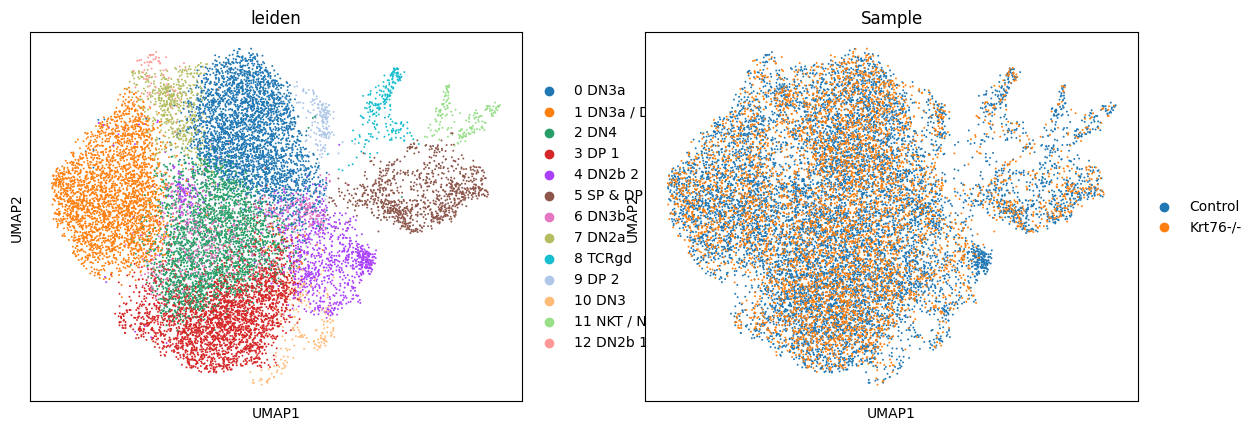

In [16]:
sc.pl.umap(adatax, color=["leiden", "Sample"])

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored


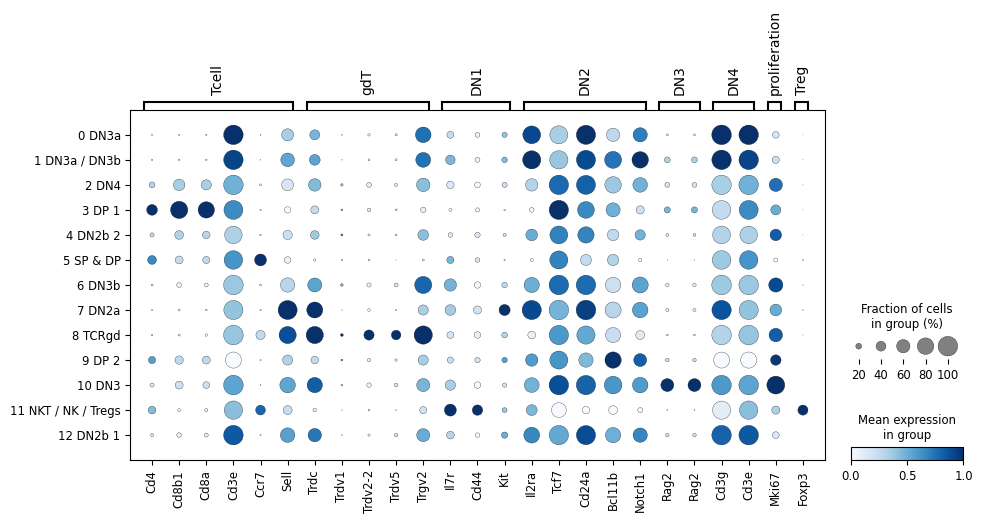

In [37]:
sc.pl.dotplot(
    adatax,
    {
        "Tcell": [
            "Cd4",
            "Cd8b1",
            "Cd8a",
            "Cd3e",
            "Ccr7",
            "Sell",
        ],
        "gdT": [
            "Trdc",
            "Trdv1",
            "Trdv2-2",
            "Trdv5",
            "Trgv2",
        ],
        "DN1": [
            "Il7r",
            "Cd44",
            "Kit",
        ],
        "DN2": [
            "Il2ra",
            "Tcf7",
            "Cd24a",
            "Bcl11b",
            "Notch1",
        ],
        "DN3": [
            "Rag2",
            "Rag2",
        ],
        "DN4": [
            "Cd3g",
            "Cd3e",
        ],
        "proliferation": [
            "Mki67",
        ],
        "Treg": [
            "Foxp3",
        ],
    },
    groupby="leiden",
    standard_scale="var",
    color_map="Blues",
)

In [ ]:
#### If you have done up scanpy's plotting defaults, you can reset it before going forward further.

import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline

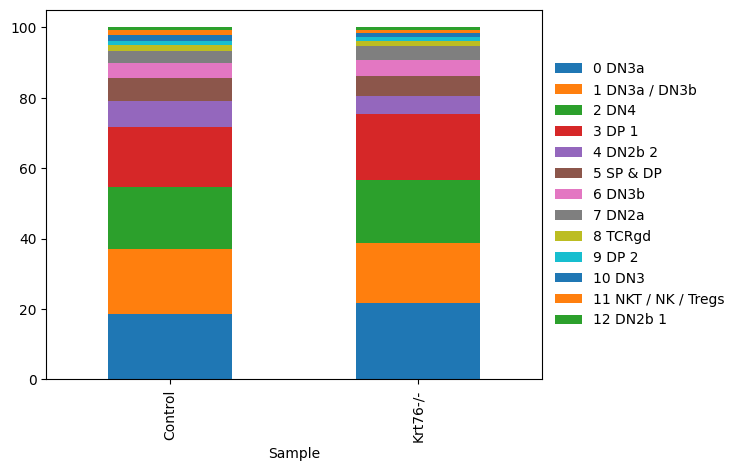

In [39]:
pd.crosstab(adatax.obs["Sample"], adatax.obs["leiden"]).apply(lambda r: r/r.sum()*100,axis = 1).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1,.5), loc = "center left", frameon=False)

In [4]:
adata = sc.read_h5ad("/Users/uqssoon/Documents/Projects/InezMara/adata_ines_MS.h5ad")
adata

AnnData object with n_obs × n_vars = 15401 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'has_contig', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_V

In [5]:
import pandas as pd

pd.crosstab(adata.obs["leiden"], adata.obs["productive_VDJ"])

productive_VDJ         F  F|F  F|F|F  F|F|F|F  F|F|F|F|F  F|F|F|F|F|F  \
leiden                                                                  
0 DN3a               143  122     59       15          5            1   
1 DN3a / DN3b        127  121     64       22          6            0   
2 DN4                 36   59     34       19          6            5   
3 DP 1                48   18     12        3          1            0   
4 DN2b 2              31   13     12        7          2            1   
5 SP & DP             20    7      4        2          0            0   
6 DN3b                10   12      5        3          0            0   
7 DN2a                 3    7      7        6          2            1   
8 TCRgd                4   14     17        5          1            1   
9 DP 2                 7    2      1        1          0            0   
10 DN3                 3    1      0        2          0            0   
11 NKT / NK / Tregs    9    1      2        0          1            0   
12 DN2b 1              2    5      0        2          0            0   

productive_VDJ       F|F|F|F|F|F|F  No_contig  None    T  ...  T|T|F  T|T|F|F  \
leiden                                                    ...                   
0 DN3a                           0       2284     0   64  ...      6        1   
1 DN3a / DN3b                    0       2206     1   34  ...      4        0   
2 DN4                            1       1234     7  124  ...     23       32   
3 DP 1                           0       1178    13  306  ...     26       20   
4 DN2b 2                         0        534     5  126  ...     10        2   
5 SP & DP                        0        349    18  235  ...      9       10   
6 DN3b                           0        281     1   50  ...      6        4   
7 DN2a                           0        492     0    0  ...      0        0   
8 TCRgd                          0        144     1    5  ...      1        2   
9 DP 2                           0        135     0   22  ...      1        2   
10 DN3                           0        109     0    8  ...      1        3   
11 NKT / NK / Tregs              0         60     5   41  ...      2        2   
12 DN2b 1                        0         91     0    2  ...      0        0   

productive_VDJ       T|T|F|F|F  T|T|F|F|F|F  T|T|F|F|F|F|F  T|T|F|F|F|F|F|F  \
leiden                                                                        
0 DN3a                       2            1              0                0   
1 DN3a / DN3b                0            0              0                0   
2 DN4                       19           17              1                4   
3 DP 1                       8            3              1                0   
4 DN2b 2                     4            1              1                0   
5 SP & DP                    3            0              1                0   
6 DN3b                       2            2              0                0   
7 DN2a                       0            0              0                0   
8 TCRgd                      1            0              0                0   
9 DP 2                       2            0              0                0   
10 DN3                       0            0              0                0   
11 NKT / NK / Tregs          0            0              0                0   
12 DN2b 1                    0            0              0                0   

productive_VDJ       T|T|T  T|T|T|F  T|T|T|F|F  T|T|T|F|F|F|F|F  
leiden                                                           
0 DN3a                   0        0          0                0  
1 DN3a / DN3b            0        0          0                0  
2 DN4                    0        0          0                1  
3 DP 1                   1        1          1                0  
4 DN2b 2                 3        1          0                0  
5 SP & DP                0        0     

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


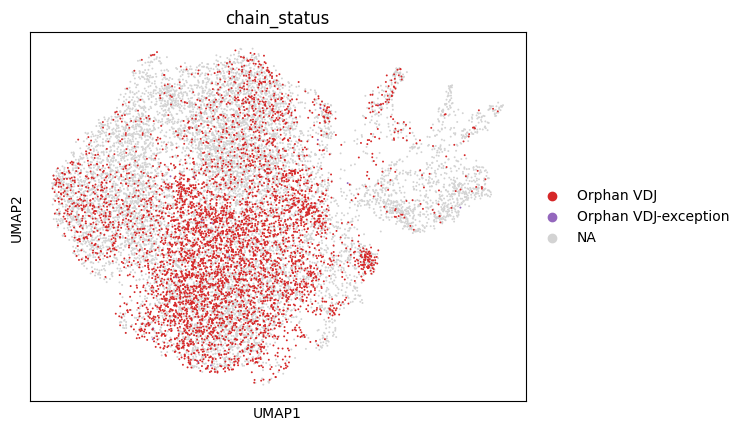

In [6]:
sc.pl.umap(adata, color="chain_status", groups=["Orphan VDJ", "Orphan VDJ-exception"])

In [7]:
adata.obs["chain_status"].value_counts()

No_contig               9097
Orphan VDJ              4782
Extra pair              1088
Single pair              362
Orphan VJ                 51
Orphan VDJ-exception      16
Extra pair-exception       5
Name: chain_status, dtype: int64

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


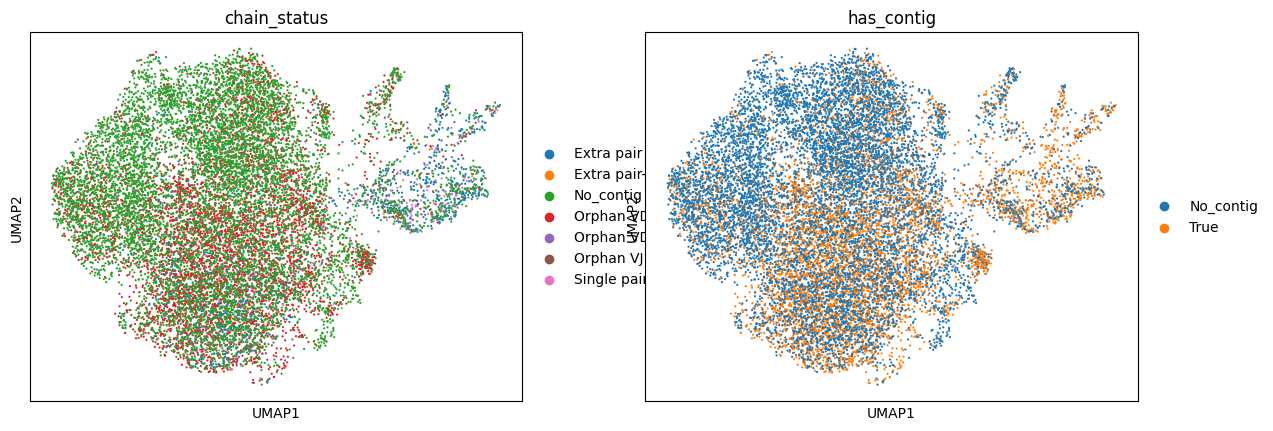

In [8]:
sc.pl.umap(adata, color=["chain_status", "has_contig"], size = 10)

In [9]:
#### If you have done up scanpy's plotting defaults, you can reset it before going forward further.

import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline


In [224]:
pd.crosstab(
    adata.obs["Sample"],
    adata.obs["has_contig"],
).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

KeyError: 'has_contig'

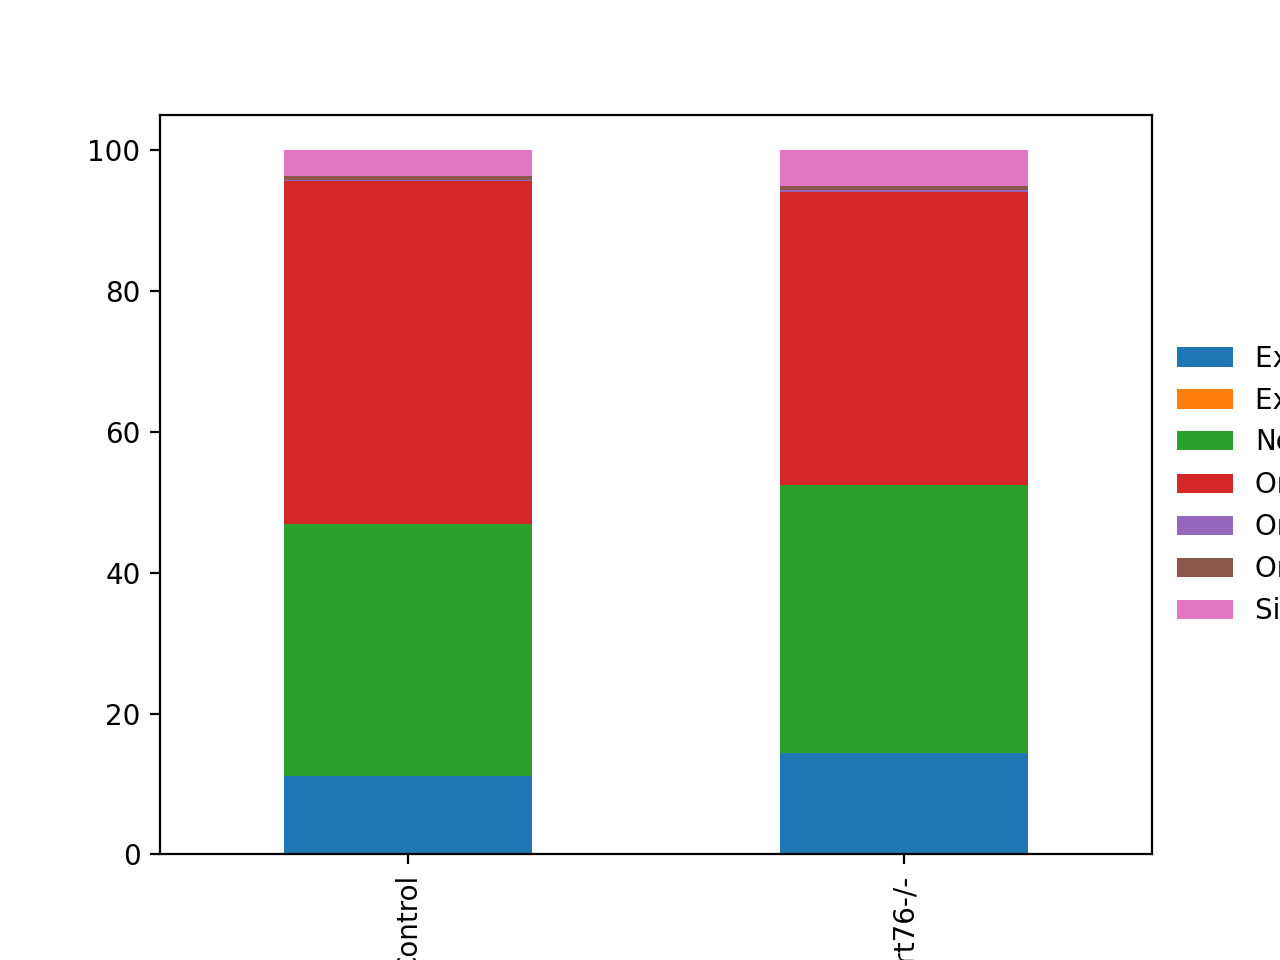

In [225]:
pd.crosstab(
    adata.obs["Sample"],
    adata.obs["chain_status"],
).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

In [ ]:
## Reordering
working_df["leiden"] = working_df[
    "leiden"
].cat.reorder_categories(
    [
        "7 DN2a",
        "12 DN2b 1",
        "4 DN2b 2",
        "10 DN3",
        "0 DN3a",
        "1 DN3a / DN3b",
        "6 DN3b",
        "2 DN4",
        "3 DP 1",
        "9 DP 2",
        "5 SP & DP",
        "8 TCRgd",
        "11 NKT / NK / Tregs",
    ]
)

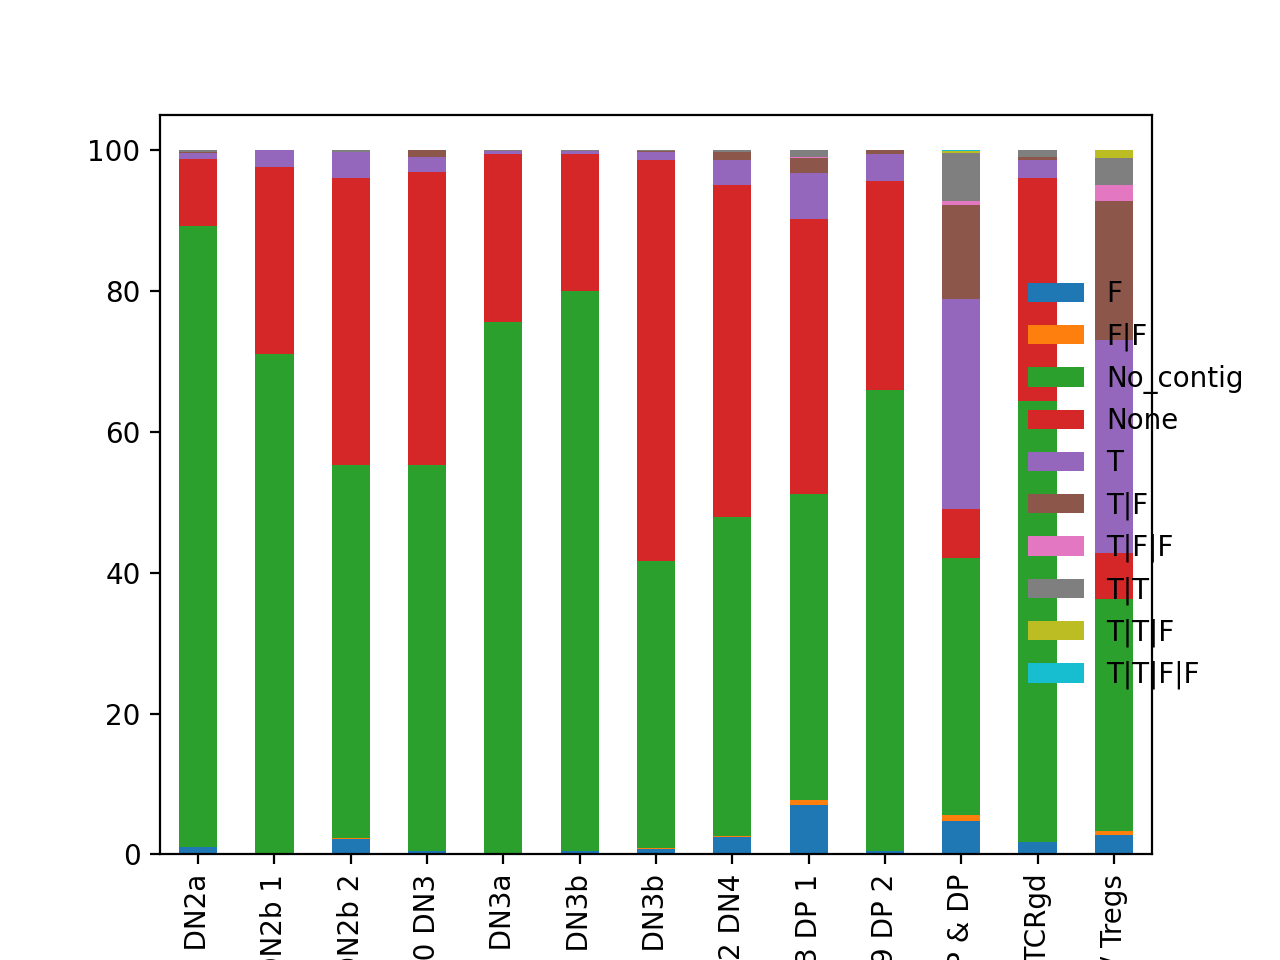

In [108]:
adata.obs["leiden"] = adata.obs["leiden"].cat.reorder_categories(
    [
        "7 DN2a",
        "12 DN2b 1",
        "4 DN2b 2",
        "10 DN3",
        "0 DN3a",
        "1 DN3a / DN3b",
        "6 DN3b",
        "2 DN4",
        "3 DP 1",
        "9 DP 2",
        "5 SP & DP",
        "8 TCRgd",
        "11 NKT / NK / Tregs",
    ]
)


options.figure_size = (10, 20)

pd.crosstab(
    adata.obs["leiden"],
    adata.obs["productive_VJ"],
).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(0.85, 0.5), loc="center left", frameon=False)

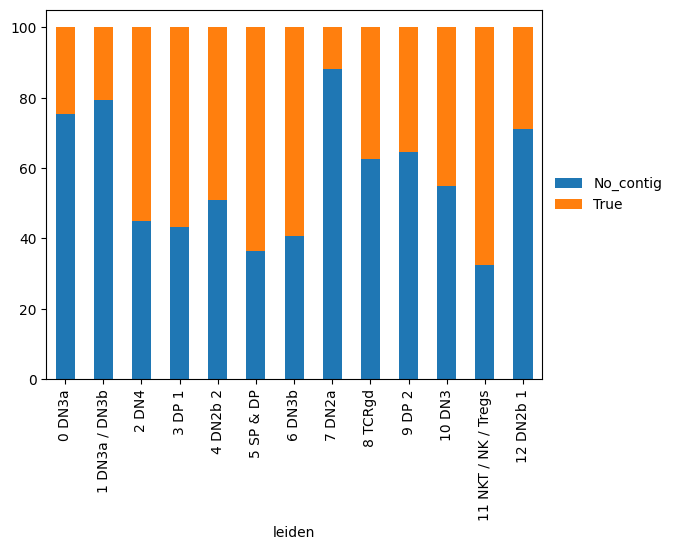

In [32]:
pd.crosstab(
    adata.obs["leiden"],
    adata.obs["has_contig"],
).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

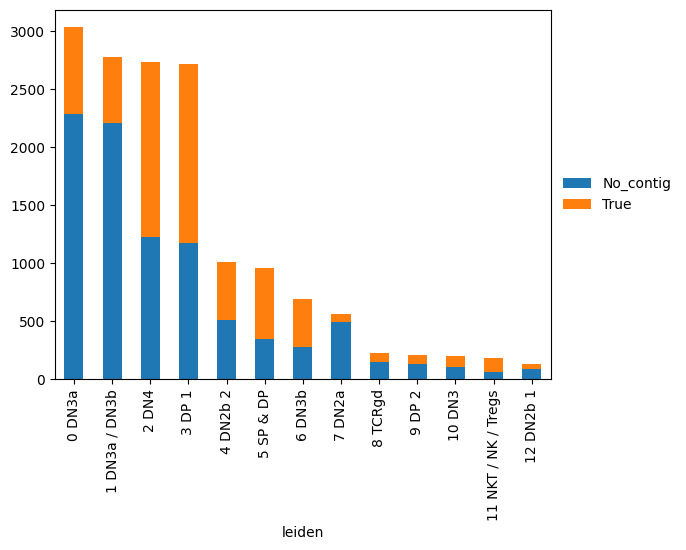

In [34]:
pd.crosstab(
    adata.obs["leiden"],
    adata.obs["has_contig"],
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

<Axes: xlabel='True'>

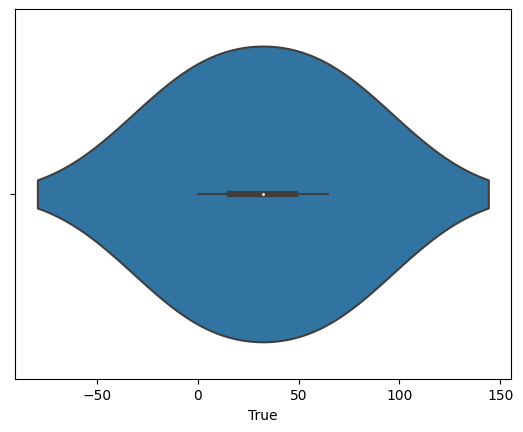

In [35]:
import seaborn as sns

df = pd.crosstab(
    adata.obs["Sample"],
    adata.obs["has_contig"],
).apply(lambda r: r / r.sum() * 100, axis=1)

sns.violinplot(data=df, x="True")

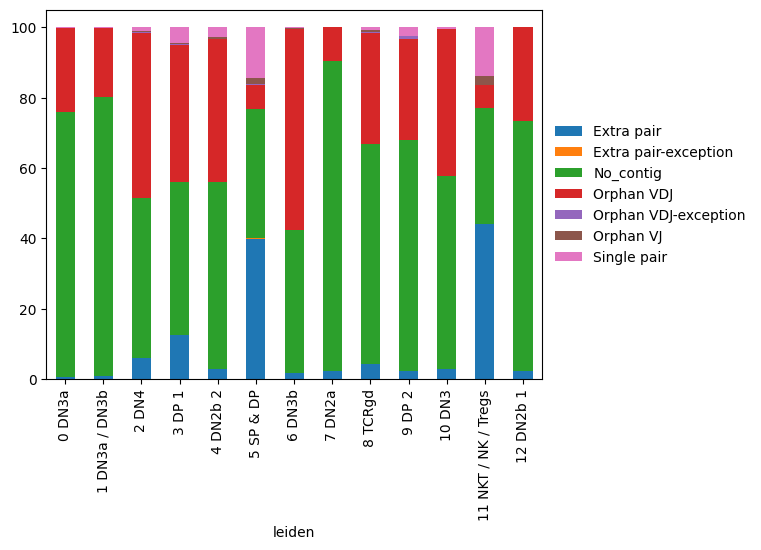

In [36]:
pd.crosstab(
    adatax.obs["leiden"],
    adatax.obs["chain_status"],
).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

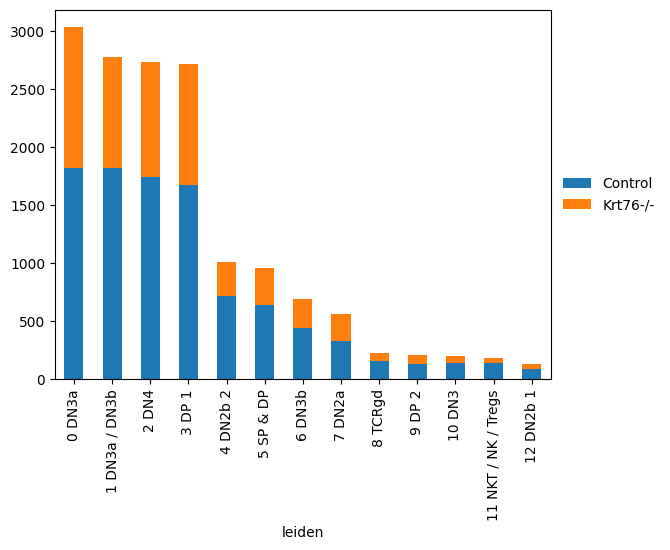

In [40]:
pd.crosstab(
    adata.obs["leiden"],
    adata.obs["Sample"],
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

## Do V/J gene usage as there almost won't be any clonotypes in thymocytes

In [12]:
adata


AnnData object with n_obs × n_vars = 15401 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'has_contig', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_V

In [13]:
working_df = pd.DataFrame(adata.obs.groupby("leiden")["v_call_abT_VDJ_main"].value_counts())
working_df

v_call_abT_VDJ_main
leiden    v_call_abT_VDJ_main                     
0 DN3a    No_contig                           2284
          None                                 125
          TRBV15                                53
          TRBV13-1                              51
          TRBV5                                 45
...                                            ...
12 DN2b 1 TRBV21                                 0
          TRBV23                                 0
          TRBV10                                 0
          TRBV26,TRBV24                          0
          TRBV30                                 0

[351 rows x 1 columns]

In [14]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

leiden v_call_abT_VDJ_main  counts
0       0 DN3a           No_contig    2284
1       0 DN3a                None     125
2       0 DN3a              TRBV15      53
3       0 DN3a            TRBV13-1      51
4       0 DN3a               TRBV5      45
..         ...                 ...     ...
346  12 DN2b 1              TRBV21       0
347  12 DN2b 1              TRBV23       0
348  12 DN2b 1              TRBV10       0
349  12 DN2b 1       TRBV26,TRBV24       0
350  12 DN2b 1              TRBV30       0

[351 rows x 3 columns]

In [15]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.leiden.unique():
    tmp = working_df[working_df["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'0 DN3a': 3030,
 '1 DN3a / DN3b': 2776,
 '2 DN4': 2727,
 '3 DP 1': 2715,
 '4 DN2b 2': 1007,
 '5 SP & DP': 954,
 '6 DN3b': 689,
 '7 DN2a': 558,
 '8 TCRgd': 230,
 '9 DP 2': 206,
 '10 DN3': 199,
 '11 NKT / NK / Tregs': 182,
 '12 DN2b 1': 128}

In [16]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [17]:
working_df

leiden v_call_abT_VDJ_main  counts  proportion
0       0 DN3a           No_contig    2284    0.753795
1       0 DN3a                None     125    0.041254
2       0 DN3a              TRBV15      53    0.017492
3       0 DN3a            TRBV13-1      51    0.016832
4       0 DN3a               TRBV5      45    0.014851
..         ...                 ...     ...         ...
346  12 DN2b 1              TRBV21       0    0.000000
347  12 DN2b 1              TRBV23       0    0.000000
348  12 DN2b 1              TRBV10       0    0.000000
349  12 DN2b 1       TRBV26,TRBV24       0    0.000000
350  12 DN2b 1              TRBV30       0    0.000000

[351 rows x 4 columns]

In [18]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [19]:
from scanpy.plotting.palettes import default_20, default_28
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 + default_28
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#023fa5',
 '#7d87b9',
 '#bec1d4',
 '#d6bcc0',
 '#bb7784',
 '#8e063b',
 '#4a6fe3',
 '#8595e1',
 '#b5bbe3',
 '#e6afb9',
 '#e07b91',
 '#d33f6a',
 '#11c638',
 '#8dd593',
 '#c6dec7',
 '#ead3c6',
 '#f0b98d',
 '#ef9708',
 '#0fcfc0',
 '#9cded6',
 '#d5eae7',
 '#f3e1eb',
 '#f6c4e1',
 '#f79cd4',
 '#7f7f7f',
 '#c7c7c7',
 '#1CE6FF',
 '#336600']

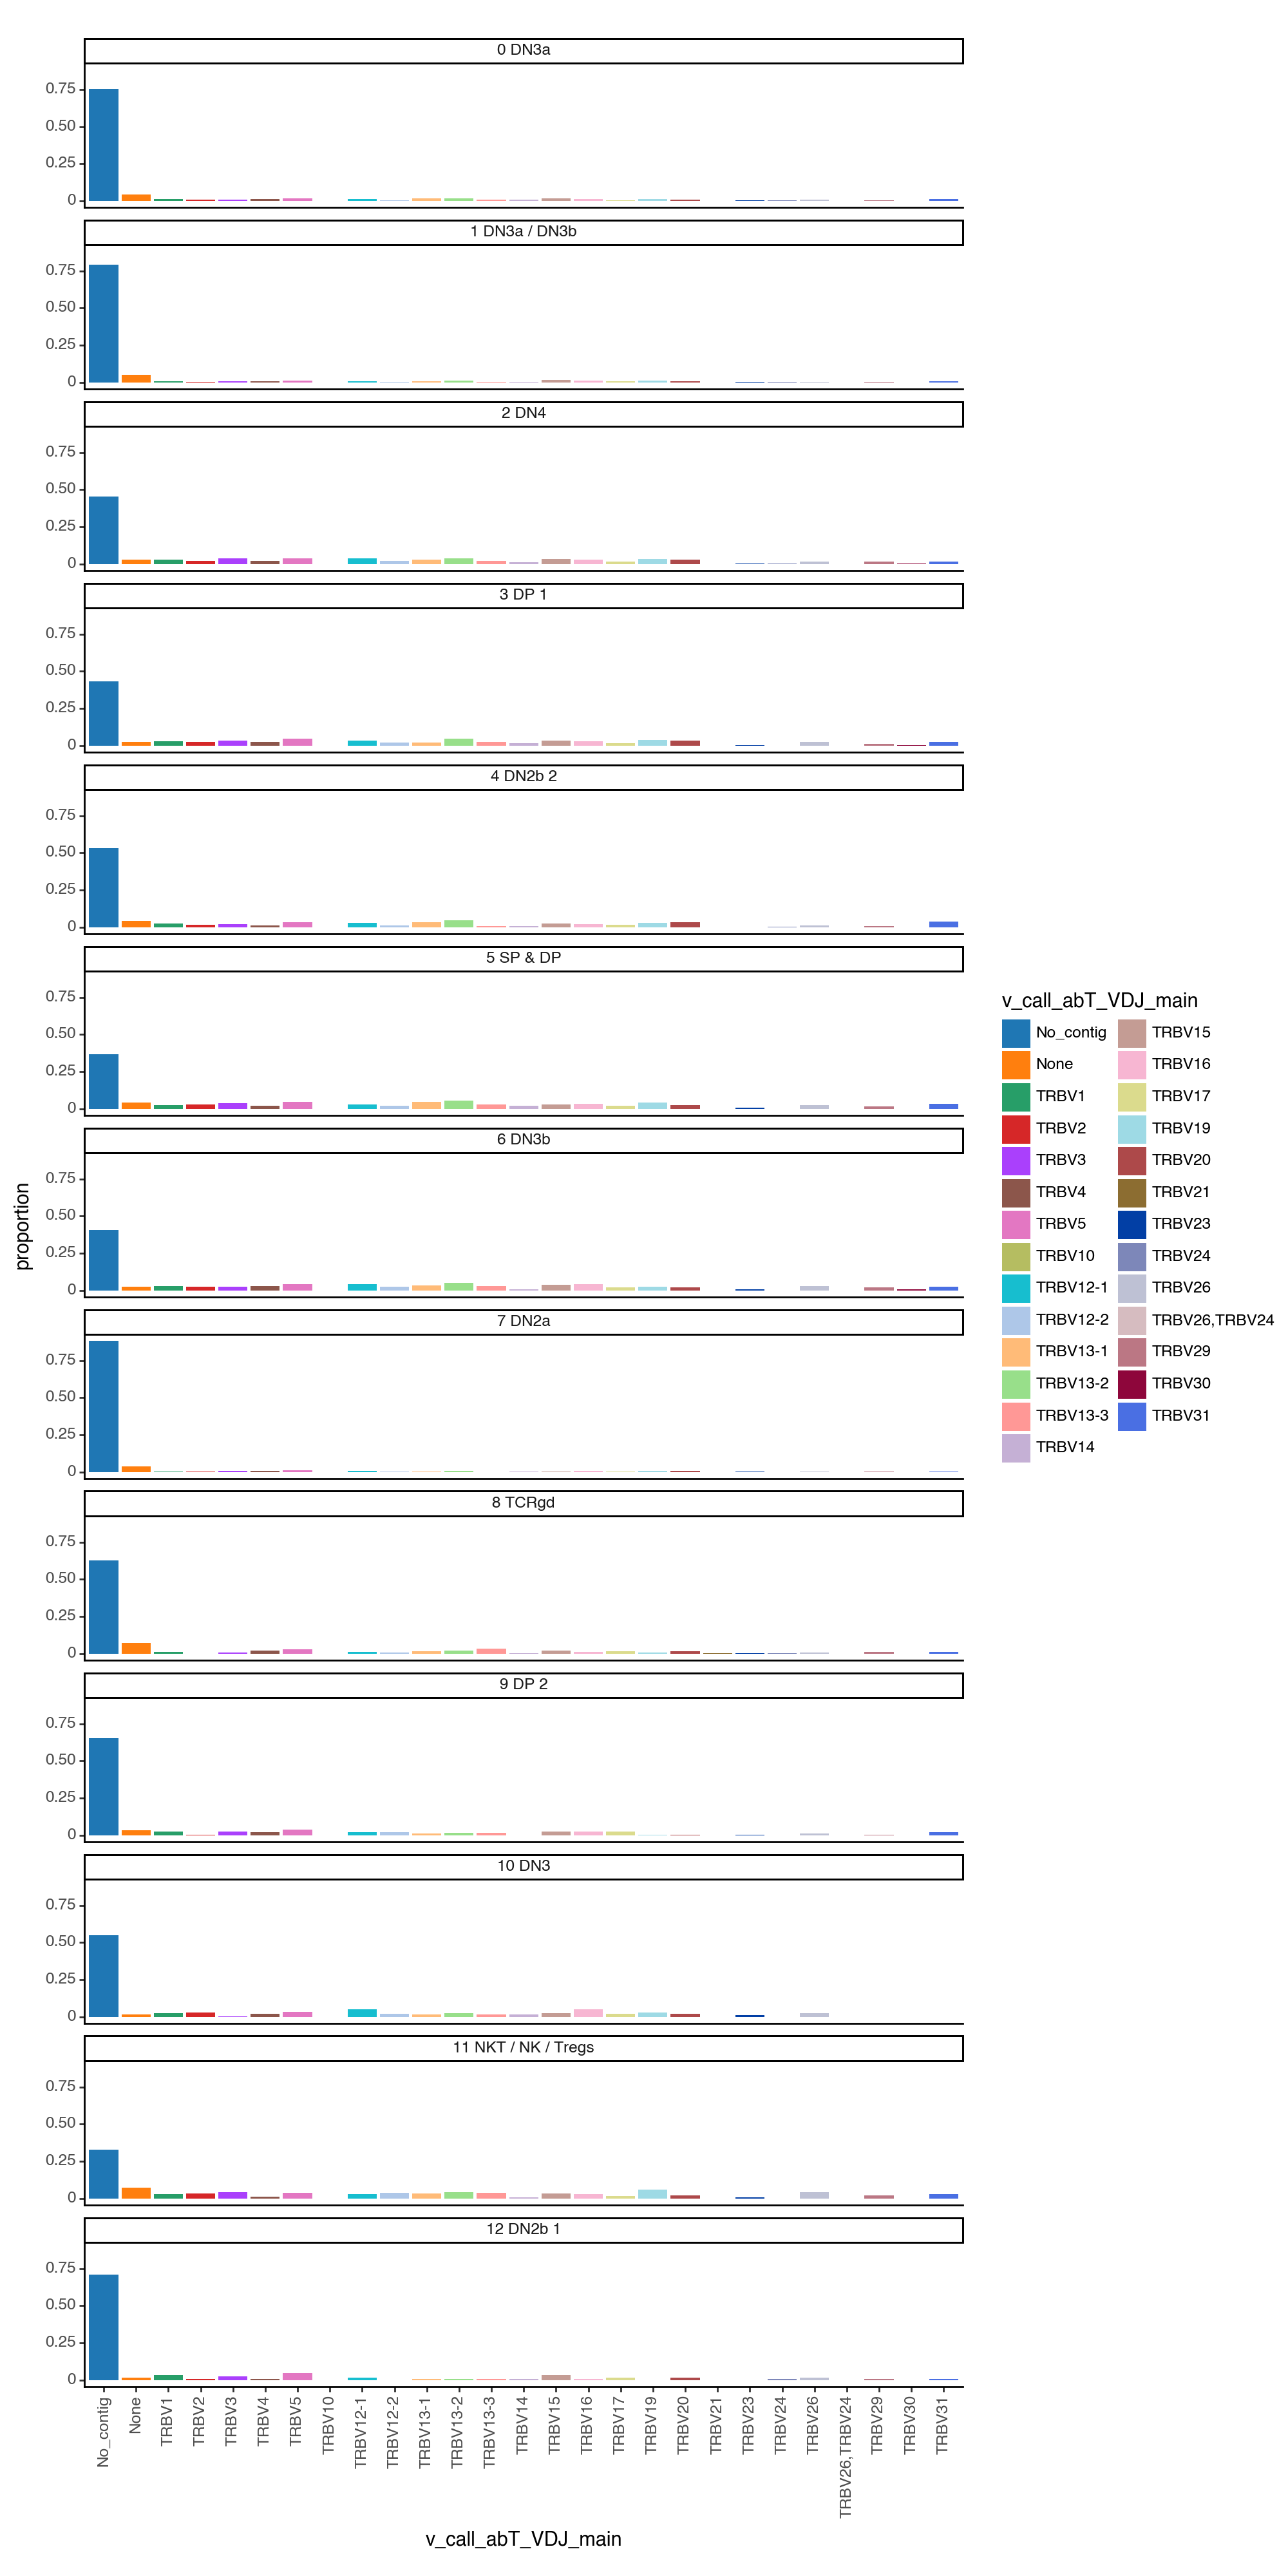

<Figure Size: (1000 x 2000)>

In [20]:
options.figure_size = (10, 20)
(
    ggplot(
        working_df,
        aes(x="v_call_abT_VDJ_main", y="proportion", fill="v_call_abT_VDJ_main"),
    )
    + geom_bar(stat="identity")
    + facet_wrap("~leiden", ncol=1)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90))
)

### I think we filter out those with no-contigs!

#### V gene Beta Chain

In [21]:
adata_contig = adata[adata.obs['has_contig'] == 'True']

In [22]:
adata_contig.obs['has_contig'].value_counts()

True    6348
Name: has_contig, dtype: int64

In [23]:
working_df = pd.DataFrame(adata_contig.obs.groupby("leiden")["v_call_abT_VDJ_main"].value_counts())
working_df

v_call_abT_VDJ_main
leiden    v_call_abT_VDJ_main                     
0 DN3a    None                                 125
          TRBV15                                53
          TRBV13-1                              51
          TRBV5                                 45
          TRBV13-2                              45
...                                            ...
12 DN2b 1 TRBV23                                 0
          TRBV10                                 0
          TRBV26,TRBV24                          0
          TRBV30                                 0
          No_contig                              0

[351 rows x 1 columns]

In [24]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

leiden v_call_abT_VDJ_main  counts
0       0 DN3a                None     125
1       0 DN3a              TRBV15      53
2       0 DN3a            TRBV13-1      51
3       0 DN3a               TRBV5      45
4       0 DN3a            TRBV13-2      45
..         ...                 ...     ...
346  12 DN2b 1              TRBV23       0
347  12 DN2b 1              TRBV10       0
348  12 DN2b 1       TRBV26,TRBV24       0
349  12 DN2b 1              TRBV30       0
350  12 DN2b 1           No_contig       0

[351 rows x 3 columns]

In [25]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.leiden.unique():
    tmp = working_df[working_df["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'0 DN3a': 750,
 '1 DN3a / DN3b': 571,
 '2 DN4': 1501,
 '3 DP 1': 1543,
 '4 DN2b 2': 493,
 '5 SP & DP': 606,
 '6 DN3b': 409,
 '7 DN2a': 66,
 '8 TCRgd': 86,
 '9 DP 2': 73,
 '10 DN3': 90,
 '11 NKT / NK / Tregs': 123,
 '12 DN2b 1': 37}

In [26]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [27]:
working_df

leiden v_call_abT_VDJ_main  counts  proportion
0       0 DN3a                None     125    0.166667
1       0 DN3a              TRBV15      53    0.070667
2       0 DN3a            TRBV13-1      51    0.068000
3       0 DN3a               TRBV5      45    0.060000
4       0 DN3a            TRBV13-2      45    0.060000
..         ...                 ...     ...         ...
346  12 DN2b 1              TRBV23       0    0.000000
347  12 DN2b 1              TRBV10       0    0.000000
348  12 DN2b 1       TRBV26,TRBV24       0    0.000000
349  12 DN2b 1              TRBV30       0    0.000000
350  12 DN2b 1           No_contig       0    0.000000

[351 rows x 4 columns]

In [29]:
## Reordering
working_df["leiden"] = working_df[
    "leiden"
].cat.reorder_categories(
    [
        "7 DN2a",
        "12 DN2b 1",
        "4 DN2b 2",
        "10 DN3",
        "0 DN3a",
        "1 DN3a / DN3b",
        "6 DN3b",
        "2 DN4",
        "3 DP 1",
        "9 DP 2",
        "5 SP & DP",
        "8 TCRgd",
        "11 NKT / NK / Tregs",
    ]
)

In [31]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [30]:
from scanpy.plotting.palettes import default_20, default_28
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 + default_28
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#023fa5',
 '#7d87b9',
 '#bec1d4',
 '#d6bcc0',
 '#bb7784',
 '#8e063b',
 '#4a6fe3',
 '#8595e1',
 '#b5bbe3',
 '#e6afb9',
 '#e07b91',
 '#d33f6a',
 '#11c638',
 '#8dd593',
 '#c6dec7',
 '#ead3c6',
 '#f0b98d',
 '#ef9708',
 '#0fcfc0',
 '#9cded6',
 '#d5eae7',
 '#f3e1eb',
 '#f6c4e1',
 '#f79cd4',
 '#7f7f7f',
 '#c7c7c7',
 '#1CE6FF',
 '#336600']

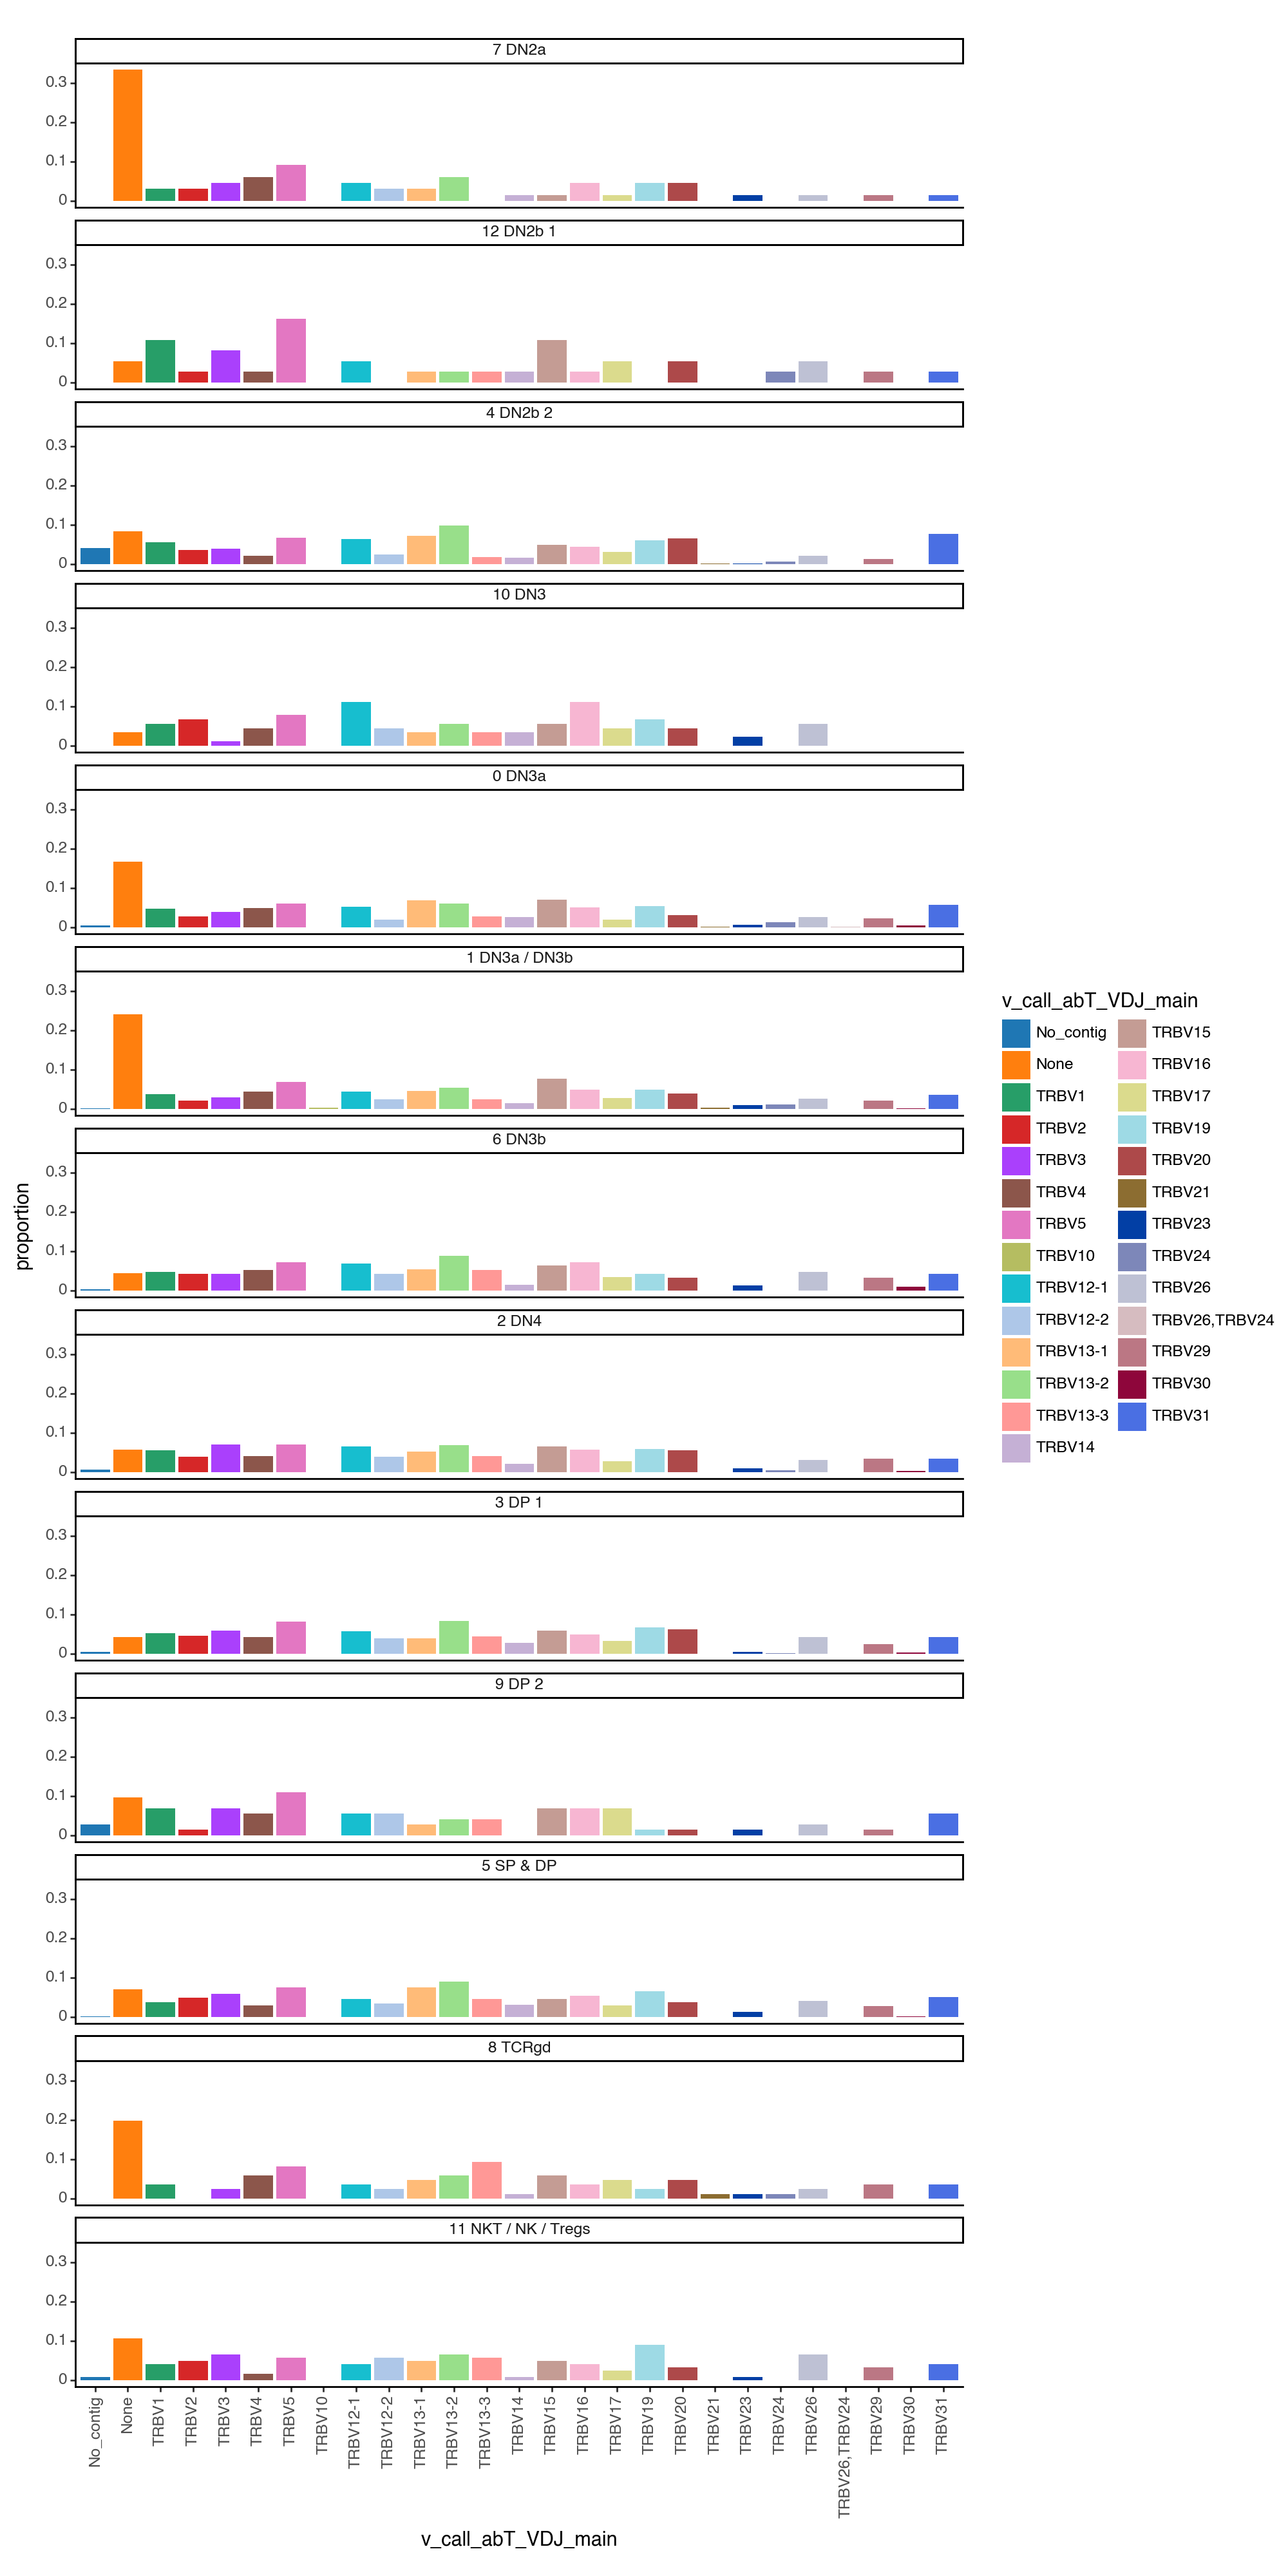

<Figure Size: (1000 x 2000)>

In [32]:
options.figure_size = (10, 20)
(
    ggplot(
        working_df,
        aes(x="v_call_abT_VDJ_main", y="proportion", fill="v_call_abT_VDJ_main"),
    )
    + geom_bar(stat="identity")
    + facet_wrap("~leiden", ncol=1)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90))
)

#### J gene Beta Chain

In [33]:
adata_contig = adata[adata.obs['has_contig'] == 'True']

In [34]:
adata_contig.obs['has_contig'].value_counts()

True    6348
Name: has_contig, dtype: int64

In [35]:
working_df = pd.DataFrame(adata_contig.obs.groupby("leiden")["j_call_abT_VDJ_main"].value_counts())
working_df

j_call_abT_VDJ_main
leiden    j_call_abT_VDJ_main                     
0 DN3a    TRBJ2-7                              111
          TRBJ2-1                               98
          TRBJ2-5                               89
          TRBJ2-6                               86
          TRBJ2-4                               68
...                                            ...
12 DN2b 1 None                                   0
          TRBJ2-2,TRBJ1-5                        0
          TRBJ2-4,TRBJ2-3                        0
          TRBJ2-4,TRBJ2-5                        0
          No_contig                              0

[247 rows x 1 columns]

In [36]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

leiden j_call_abT_VDJ_main  counts
0       0 DN3a             TRBJ2-7     111
1       0 DN3a             TRBJ2-1      98
2       0 DN3a             TRBJ2-5      89
3       0 DN3a             TRBJ2-6      86
4       0 DN3a             TRBJ2-4      68
..         ...                 ...     ...
242  12 DN2b 1                None       0
243  12 DN2b 1     TRBJ2-2,TRBJ1-5       0
244  12 DN2b 1     TRBJ2-4,TRBJ2-3       0
245  12 DN2b 1     TRBJ2-4,TRBJ2-5       0
246  12 DN2b 1           No_contig       0

[247 rows x 3 columns]

In [37]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.leiden.unique():
    tmp = working_df[working_df["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'0 DN3a': 750,
 '1 DN3a / DN3b': 571,
 '2 DN4': 1501,
 '3 DP 1': 1543,
 '4 DN2b 2': 493,
 '5 SP & DP': 606,
 '6 DN3b': 409,
 '7 DN2a': 66,
 '8 TCRgd': 86,
 '9 DP 2': 73,
 '10 DN3': 90,
 '11 NKT / NK / Tregs': 123,
 '12 DN2b 1': 37}

In [38]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [39]:
working_df

leiden j_call_abT_VDJ_main  counts  proportion
0       0 DN3a             TRBJ2-7     111    0.148000
1       0 DN3a             TRBJ2-1      98    0.130667
2       0 DN3a             TRBJ2-5      89    0.118667
3       0 DN3a             TRBJ2-6      86    0.114667
4       0 DN3a             TRBJ2-4      68    0.090667
..         ...                 ...     ...         ...
242  12 DN2b 1                None       0    0.000000
243  12 DN2b 1     TRBJ2-2,TRBJ1-5       0    0.000000
244  12 DN2b 1     TRBJ2-4,TRBJ2-3       0    0.000000
245  12 DN2b 1     TRBJ2-4,TRBJ2-5       0    0.000000
246  12 DN2b 1           No_contig       0    0.000000

[247 rows x 4 columns]

In [40]:
## Reordering
working_df["leiden"] = working_df[
    "leiden"
].cat.reorder_categories(
    [
        "7 DN2a",
        "12 DN2b 1",
        "4 DN2b 2",
        "10 DN3",
        "0 DN3a",
        "1 DN3a / DN3b",
        "6 DN3b",
        "2 DN4",
        "3 DP 1",
        "9 DP 2",
        "5 SP & DP",
        "8 TCRgd",
        "11 NKT / NK / Tregs",
    ]
)

In [41]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [42]:
from scanpy.plotting.palettes import default_20, default_28
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 + default_28
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#023fa5',
 '#7d87b9',
 '#bec1d4',
 '#d6bcc0',
 '#bb7784',
 '#8e063b',
 '#4a6fe3',
 '#8595e1',
 '#b5bbe3',
 '#e6afb9',
 '#e07b91',
 '#d33f6a',
 '#11c638',
 '#8dd593',
 '#c6dec7',
 '#ead3c6',
 '#f0b98d',
 '#ef9708',
 '#0fcfc0',
 '#9cded6',
 '#d5eae7',
 '#f3e1eb',
 '#f6c4e1',
 '#f79cd4',
 '#7f7f7f',
 '#c7c7c7',
 '#1CE6FF',
 '#336600']

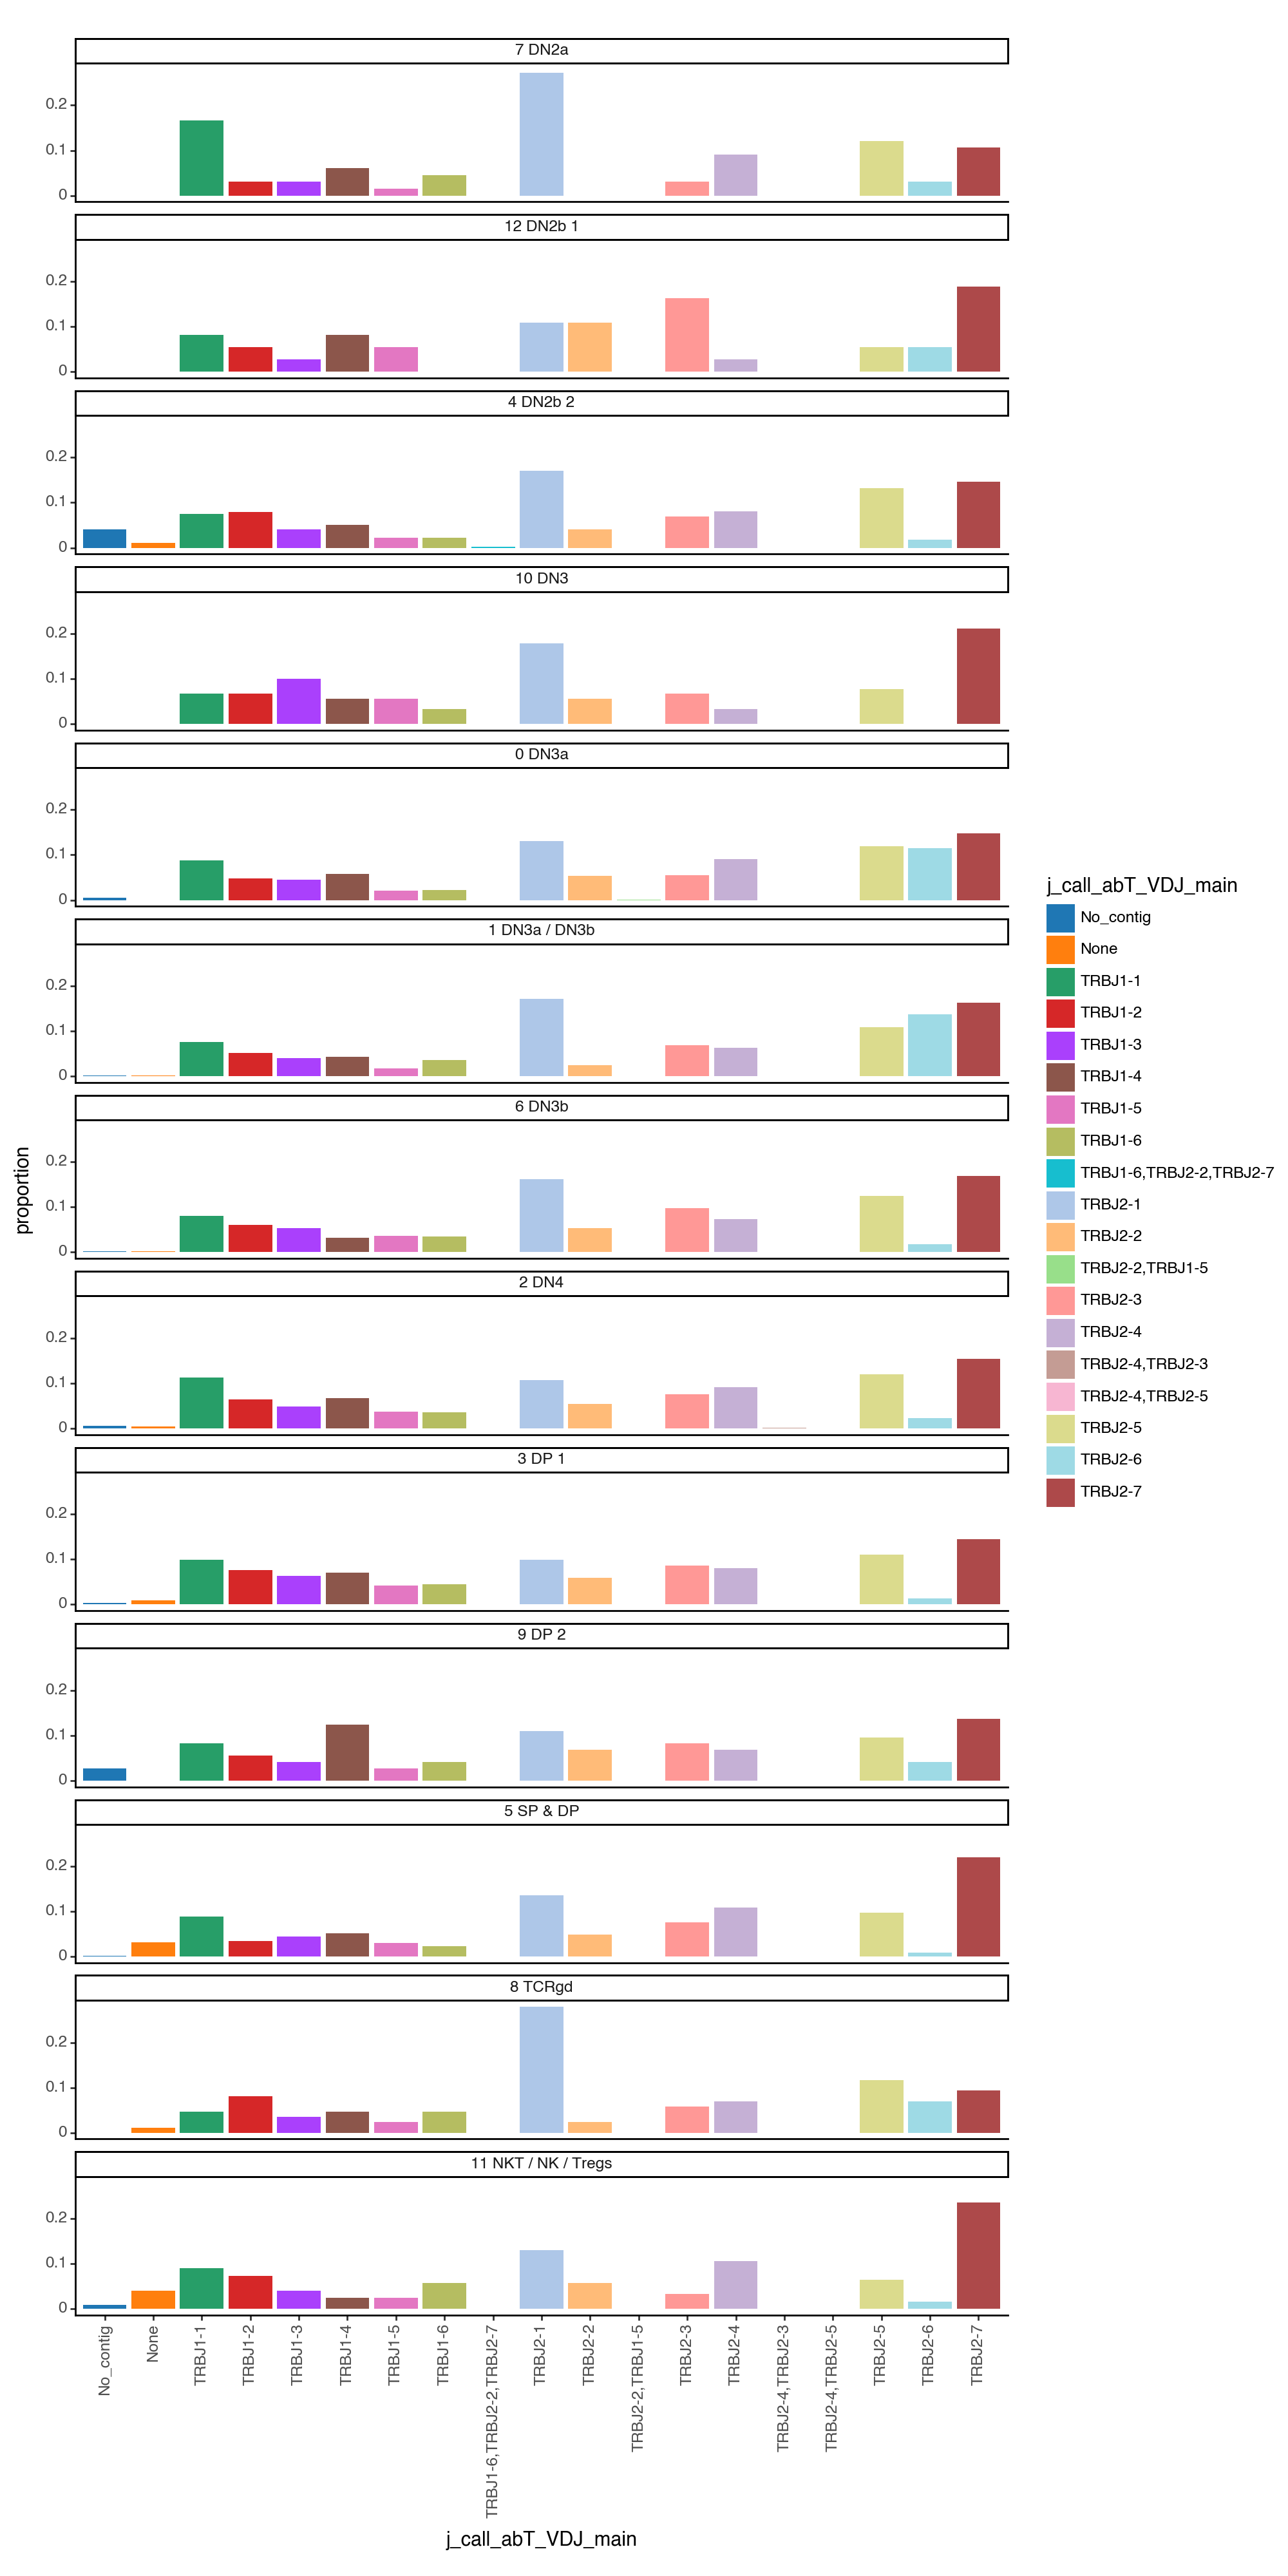

<Figure Size: (1000 x 2000)>

In [43]:
options.figure_size = (10, 20)
(
    ggplot(
        working_df,
        aes(x="j_call_abT_VDJ_main", y="proportion", fill="j_call_abT_VDJ_main"),
    )
    + geom_bar(stat="identity")
    + facet_wrap("~leiden", ncol=1)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90))
)

#### V gene Alpha Chain

In [44]:
adata_contig = adata[adata.obs['has_contig'] == 'True']

In [45]:
adata_contig.obs['has_contig'].value_counts()

True    6348
Name: has_contig, dtype: int64

In [46]:
working_df = pd.DataFrame(adata_contig.obs.groupby("leiden")["v_call_abT_VJ_main"].value_counts())
working_df

v_call_abT_VJ_main
leiden    v_call_abT_VJ_main                               
0 DN3a    None                                          726
          No_contig                                       4
          TRAV6N-7,TRAV6D-7                               2
          TRAV14D-3/DV8,TRAV14N-3                         1
          TRAV10                                          1
...                                                     ...
12 DN2b 1 TRAV7-2                                         0
          TRAV7-1                                         0
          TRAV6N-7,TRAV6D-7,TRAV6-7/DV9                   0
          TRAV6N-7,TRAV6D-7                               0
          TRAV21/DV12                                     0

[1391 rows x 1 columns]

In [47]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

leiden             v_call_abT_VJ_main  counts
0        0 DN3a                           None     726
1        0 DN3a                      No_contig       4
2        0 DN3a              TRAV6N-7,TRAV6D-7       2
3        0 DN3a        TRAV14D-3/DV8,TRAV14N-3       1
4        0 DN3a                         TRAV10       1
...         ...                            ...     ...
1386  12 DN2b 1                        TRAV7-2       0
1387  12 DN2b 1                        TRAV7-1       0
1388  12 DN2b 1  TRAV6N-7,TRAV6D-7,TRAV6-7/DV9       0
1389  12 DN2b 1              TRAV6N-7,TRAV6D-7       0
1390  12 DN2b 1                    TRAV21/DV12       0

[1391 rows x 3 columns]

In [48]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.leiden.unique():
    tmp = working_df[working_df["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'0 DN3a': 750,
 '1 DN3a / DN3b': 571,
 '2 DN4': 1501,
 '3 DP 1': 1543,
 '4 DN2b 2': 493,
 '5 SP & DP': 606,
 '6 DN3b': 409,
 '7 DN2a': 66,
 '8 TCRgd': 86,
 '9 DP 2': 73,
 '10 DN3': 90,
 '11 NKT / NK / Tregs': 123,
 '12 DN2b 1': 37}

In [49]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [50]:
working_df

leiden             v_call_abT_VJ_main  counts  proportion
0        0 DN3a                           None     726    0.968000
1        0 DN3a                      No_contig       4    0.005333
2        0 DN3a              TRAV6N-7,TRAV6D-7       2    0.002667
3        0 DN3a        TRAV14D-3/DV8,TRAV14N-3       1    0.001333
4        0 DN3a                         TRAV10       1    0.001333
...         ...                            ...     ...         ...
1386  12 DN2b 1                        TRAV7-2       0    0.000000
1387  12 DN2b 1                        TRAV7-1       0    0.000000
1388  12 DN2b 1  TRAV6N-7,TRAV6D-7,TRAV6-7/DV9       0    0.000000
1389  12 DN2b 1              TRAV6N-7,TRAV6D-7       0    0.000000
1390  12 DN2b 1                    TRAV21/DV12       0    0.000000

[1391 rows x 4 columns]

In [51]:
## Reordering
working_df["leiden"] = working_df[
    "leiden"
].cat.reorder_categories(
    [
        "7 DN2a",
        "12 DN2b 1",
        "4 DN2b 2",
        "10 DN3",
        "0 DN3a",
        "1 DN3a / DN3b",
        "6 DN3b",
        "2 DN4",
        "3 DP 1",
        "9 DP 2",
        "5 SP & DP",
        "8 TCRgd",
        "11 NKT / NK / Tregs",
    ]
)

In [52]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [53]:
from scanpy.plotting.palettes import default_20, default_28
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 + default_28
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#023fa5',
 '#7d87b9',
 '#bec1d4',
 '#d6bcc0',
 '#bb7784',
 '#8e063b',
 '#4a6fe3',
 '#8595e1',
 '#b5bbe3',
 '#e6afb9',
 '#e07b91',
 '#d33f6a',
 '#11c638',
 '#8dd593',
 '#c6dec7',
 '#ead3c6',
 '#f0b98d',
 '#ef9708',
 '#0fcfc0',
 '#9cded6',
 '#d5eae7',
 '#f3e1eb',
 '#f6c4e1',
 '#f79cd4',
 '#7f7f7f',
 '#c7c7c7',
 '#1CE6FF',
 '#336600']

In [54]:
adata_contig

View of AnnData object with n_obs × n_vars = 6348 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'has_contig', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j

/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/scales/scale_manual.py:45: PlotnineWarning: The palette of scale_fill_manual can return a maximum of 48 values. 107 were requested from it.
/Users/uqssoon/anaconda3/envs/Jaz2023_env/lib/python3.11/site-packages/plotnine/scales/scale_manual.py:45: PlotnineWarning: The palette of scale_fill_manual can return a maximum of 48 values. 107 were requested from it.


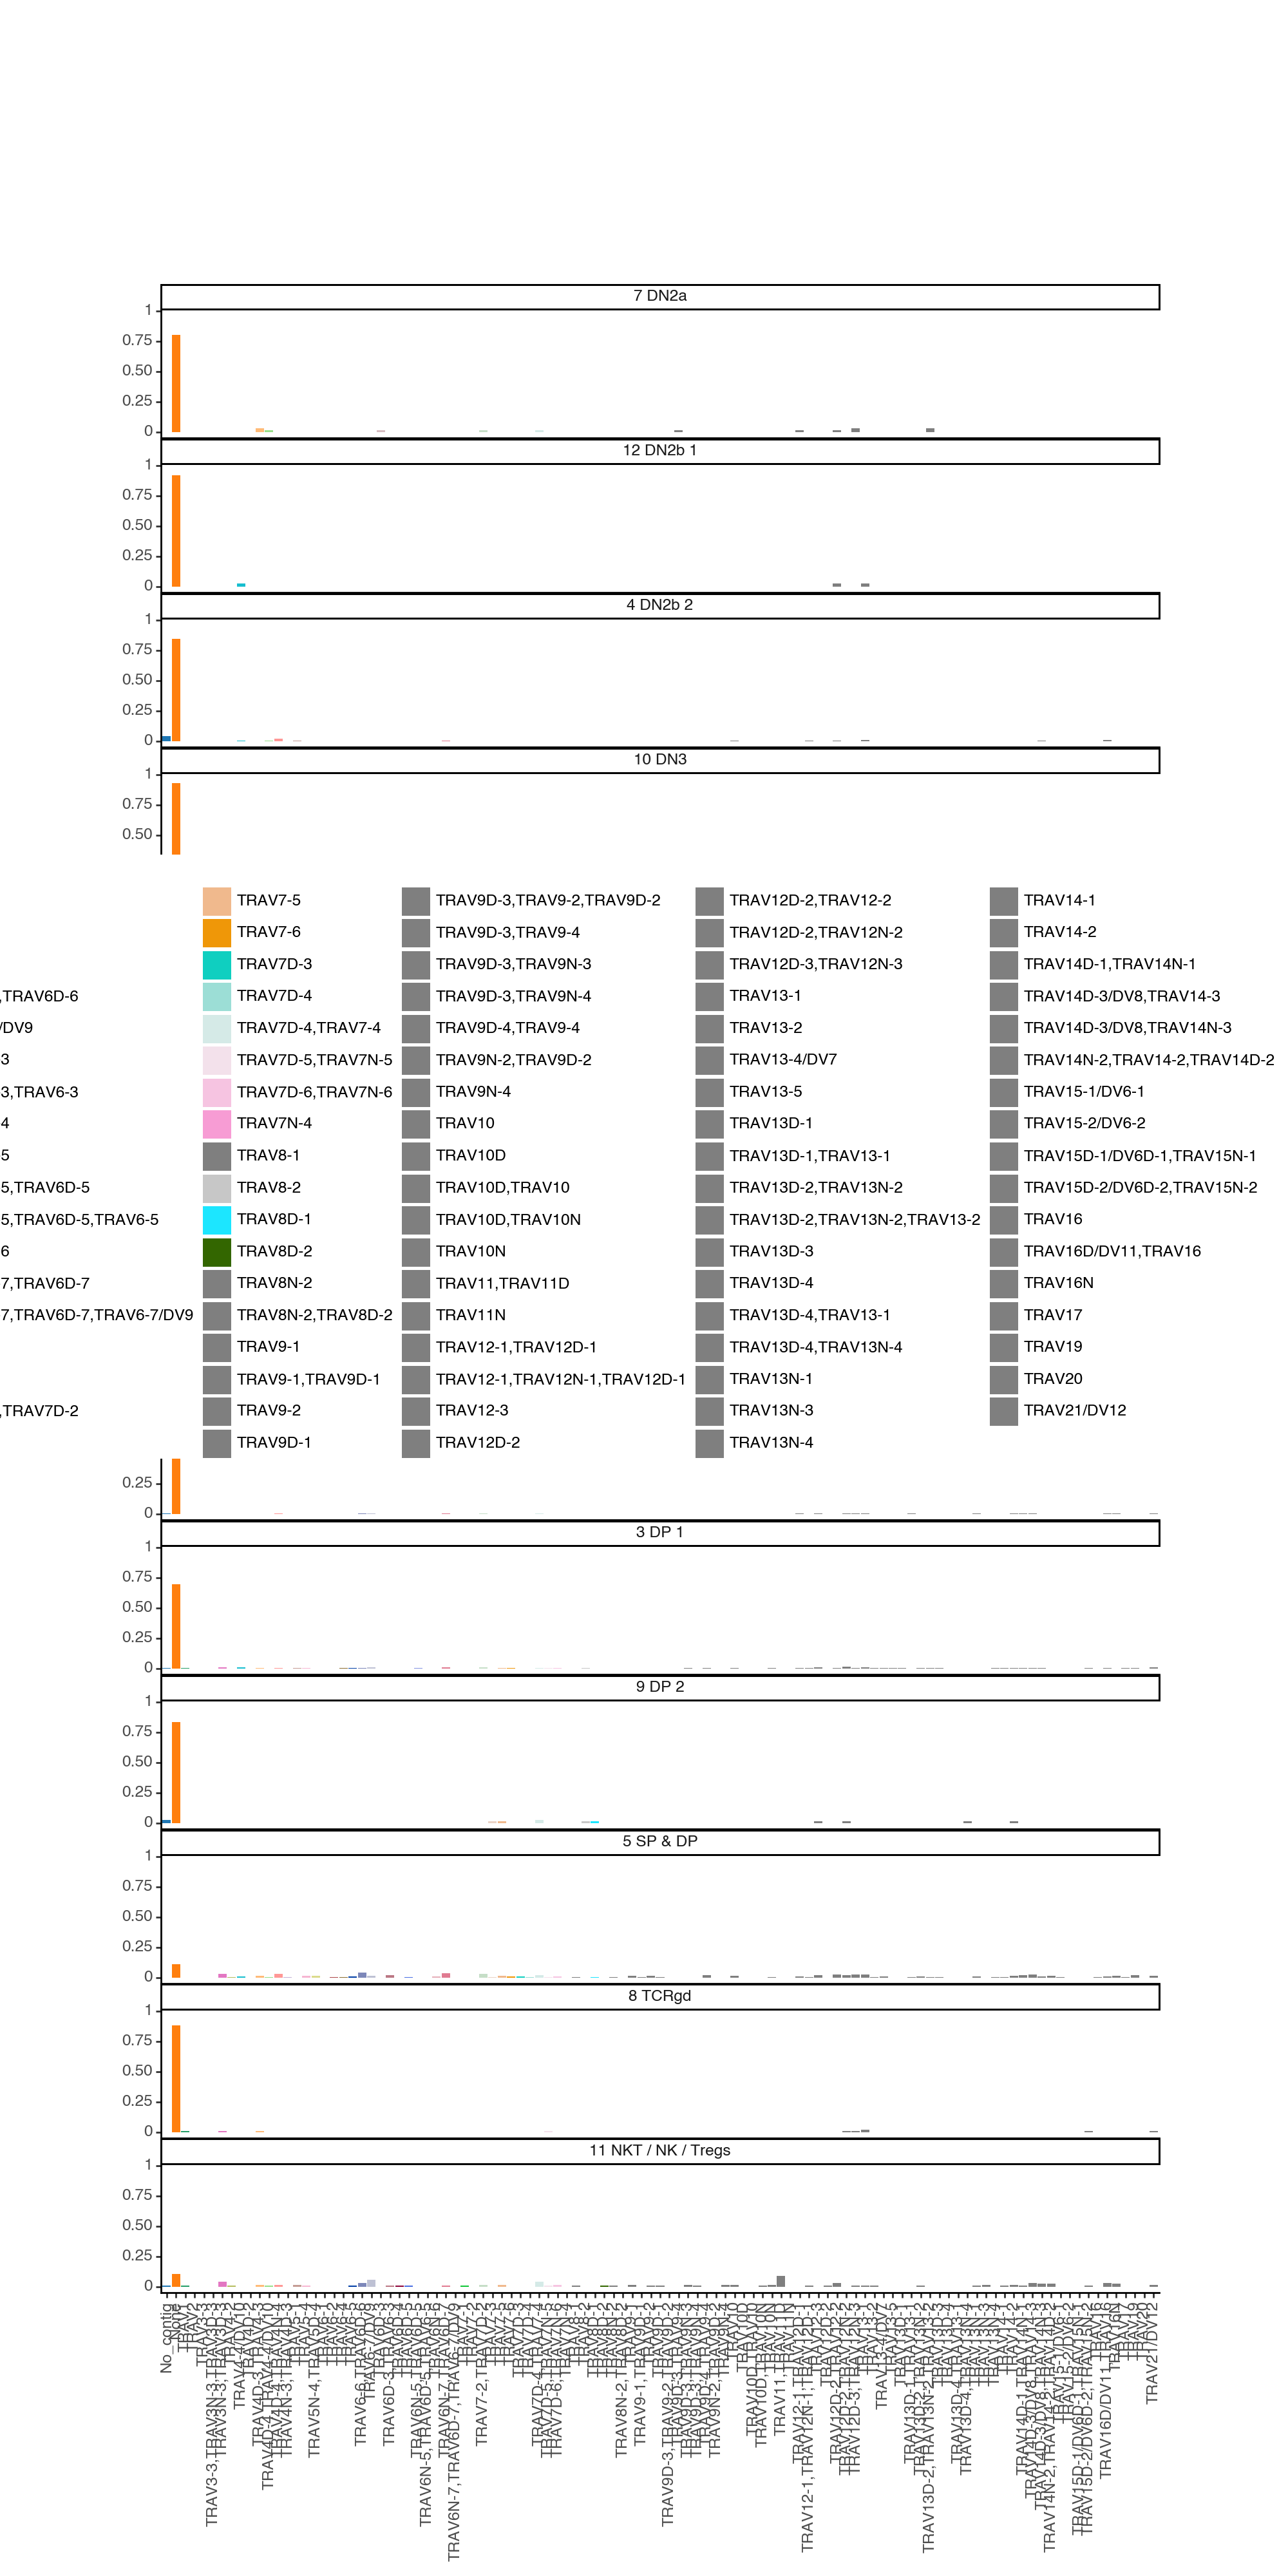

<Figure Size: (1000 x 2000)>

In [55]:
options.figure_size = (10, 20)
(
    ggplot(
        working_df,
        aes(x="v_call_abT_VJ_main", y="proportion", fill="v_call_abT_VJ_main"),
    )
    + geom_bar(stat="identity")
    + facet_wrap("~leiden", ncol=1)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90))
)

#### V gene Alpha Chain (Filtering out None!)

In [56]:
### A lot of nonr in v_call_VJ_main - subset
#adata_contig = adata[adata.obs['has_contig'] == 'True']
adata_filtered = adata_contig[adata_contig.obs["v_call_abT_VJ_main"] != "None"]

In [57]:
working_df = pd.DataFrame(adata_filtered.obs.groupby("leiden")["v_call_abT_VJ_main"].value_counts())
working_df

v_call_abT_VJ_main
leiden    v_call_abT_VJ_main                               
0 DN3a    No_contig                                       4
          TRAV6N-7,TRAV6D-7                               2
          TRAV9N-4                                        1
          TRAV15-2/DV6-2                                  1
          TRAV13D-1                                       1
...                                                     ...
12 DN2b 1 TRAV7-2,TRAV7D-2                                0
          TRAV7-2                                         0
          TRAV7-1                                         0
          TRAV6N-7,TRAV6D-7,TRAV6-7/DV9                   0
          TRAV21/DV12                                     0

[1378 rows x 1 columns]

In [58]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

leiden             v_call_abT_VJ_main  counts
0        0 DN3a                      No_contig       4
1        0 DN3a              TRAV6N-7,TRAV6D-7       2
2        0 DN3a                       TRAV9N-4       1
3        0 DN3a                 TRAV15-2/DV6-2       1
4        0 DN3a                      TRAV13D-1       1
...         ...                            ...     ...
1373  12 DN2b 1               TRAV7-2,TRAV7D-2       0
1374  12 DN2b 1                        TRAV7-2       0
1375  12 DN2b 1                        TRAV7-1       0
1376  12 DN2b 1  TRAV6N-7,TRAV6D-7,TRAV6-7/DV9       0
1377  12 DN2b 1                    TRAV21/DV12       0

[1378 rows x 3 columns]

In [59]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.leiden.unique():
    tmp = working_df[working_df["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'0 DN3a': 24,
 '1 DN3a / DN3b': 29,
 '2 DN4': 199,
 '3 DP 1': 466,
 '4 DN2b 2': 76,
 '5 SP & DP': 537,
 '6 DN3b': 16,
 '7 DN2a': 13,
 '8 TCRgd': 10,
 '9 DP 2': 12,
 '10 DN3': 6,
 '11 NKT / NK / Tregs': 110,
 '12 DN2b 1': 3}

In [60]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [61]:
working_df

leiden             v_call_abT_VJ_main  counts  proportion
0        0 DN3a                      No_contig       4    0.166667
1        0 DN3a              TRAV6N-7,TRAV6D-7       2    0.083333
2        0 DN3a                       TRAV9N-4       1    0.041667
3        0 DN3a                 TRAV15-2/DV6-2       1    0.041667
4        0 DN3a                      TRAV13D-1       1    0.041667
...         ...                            ...     ...         ...
1373  12 DN2b 1               TRAV7-2,TRAV7D-2       0    0.000000
1374  12 DN2b 1                        TRAV7-2       0    0.000000
1375  12 DN2b 1                        TRAV7-1       0    0.000000
1376  12 DN2b 1  TRAV6N-7,TRAV6D-7,TRAV6-7/DV9       0    0.000000
1377  12 DN2b 1                    TRAV21/DV12       0    0.000000

[1378 rows x 4 columns]

In [62]:
## Reordering
working_df["leiden"] = working_df[
    "leiden"
].cat.reorder_categories(
    [
        "7 DN2a",
        "12 DN2b 1",
        "4 DN2b 2",
        "10 DN3",
        "0 DN3a",
        "1 DN3a / DN3b",
        "6 DN3b",
        "2 DN4",
        "3 DP 1",
        "9 DP 2",
        "5 SP & DP",
        "8 TCRgd",
        "11 NKT / NK / Tregs",
    ]
)

In [63]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [64]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

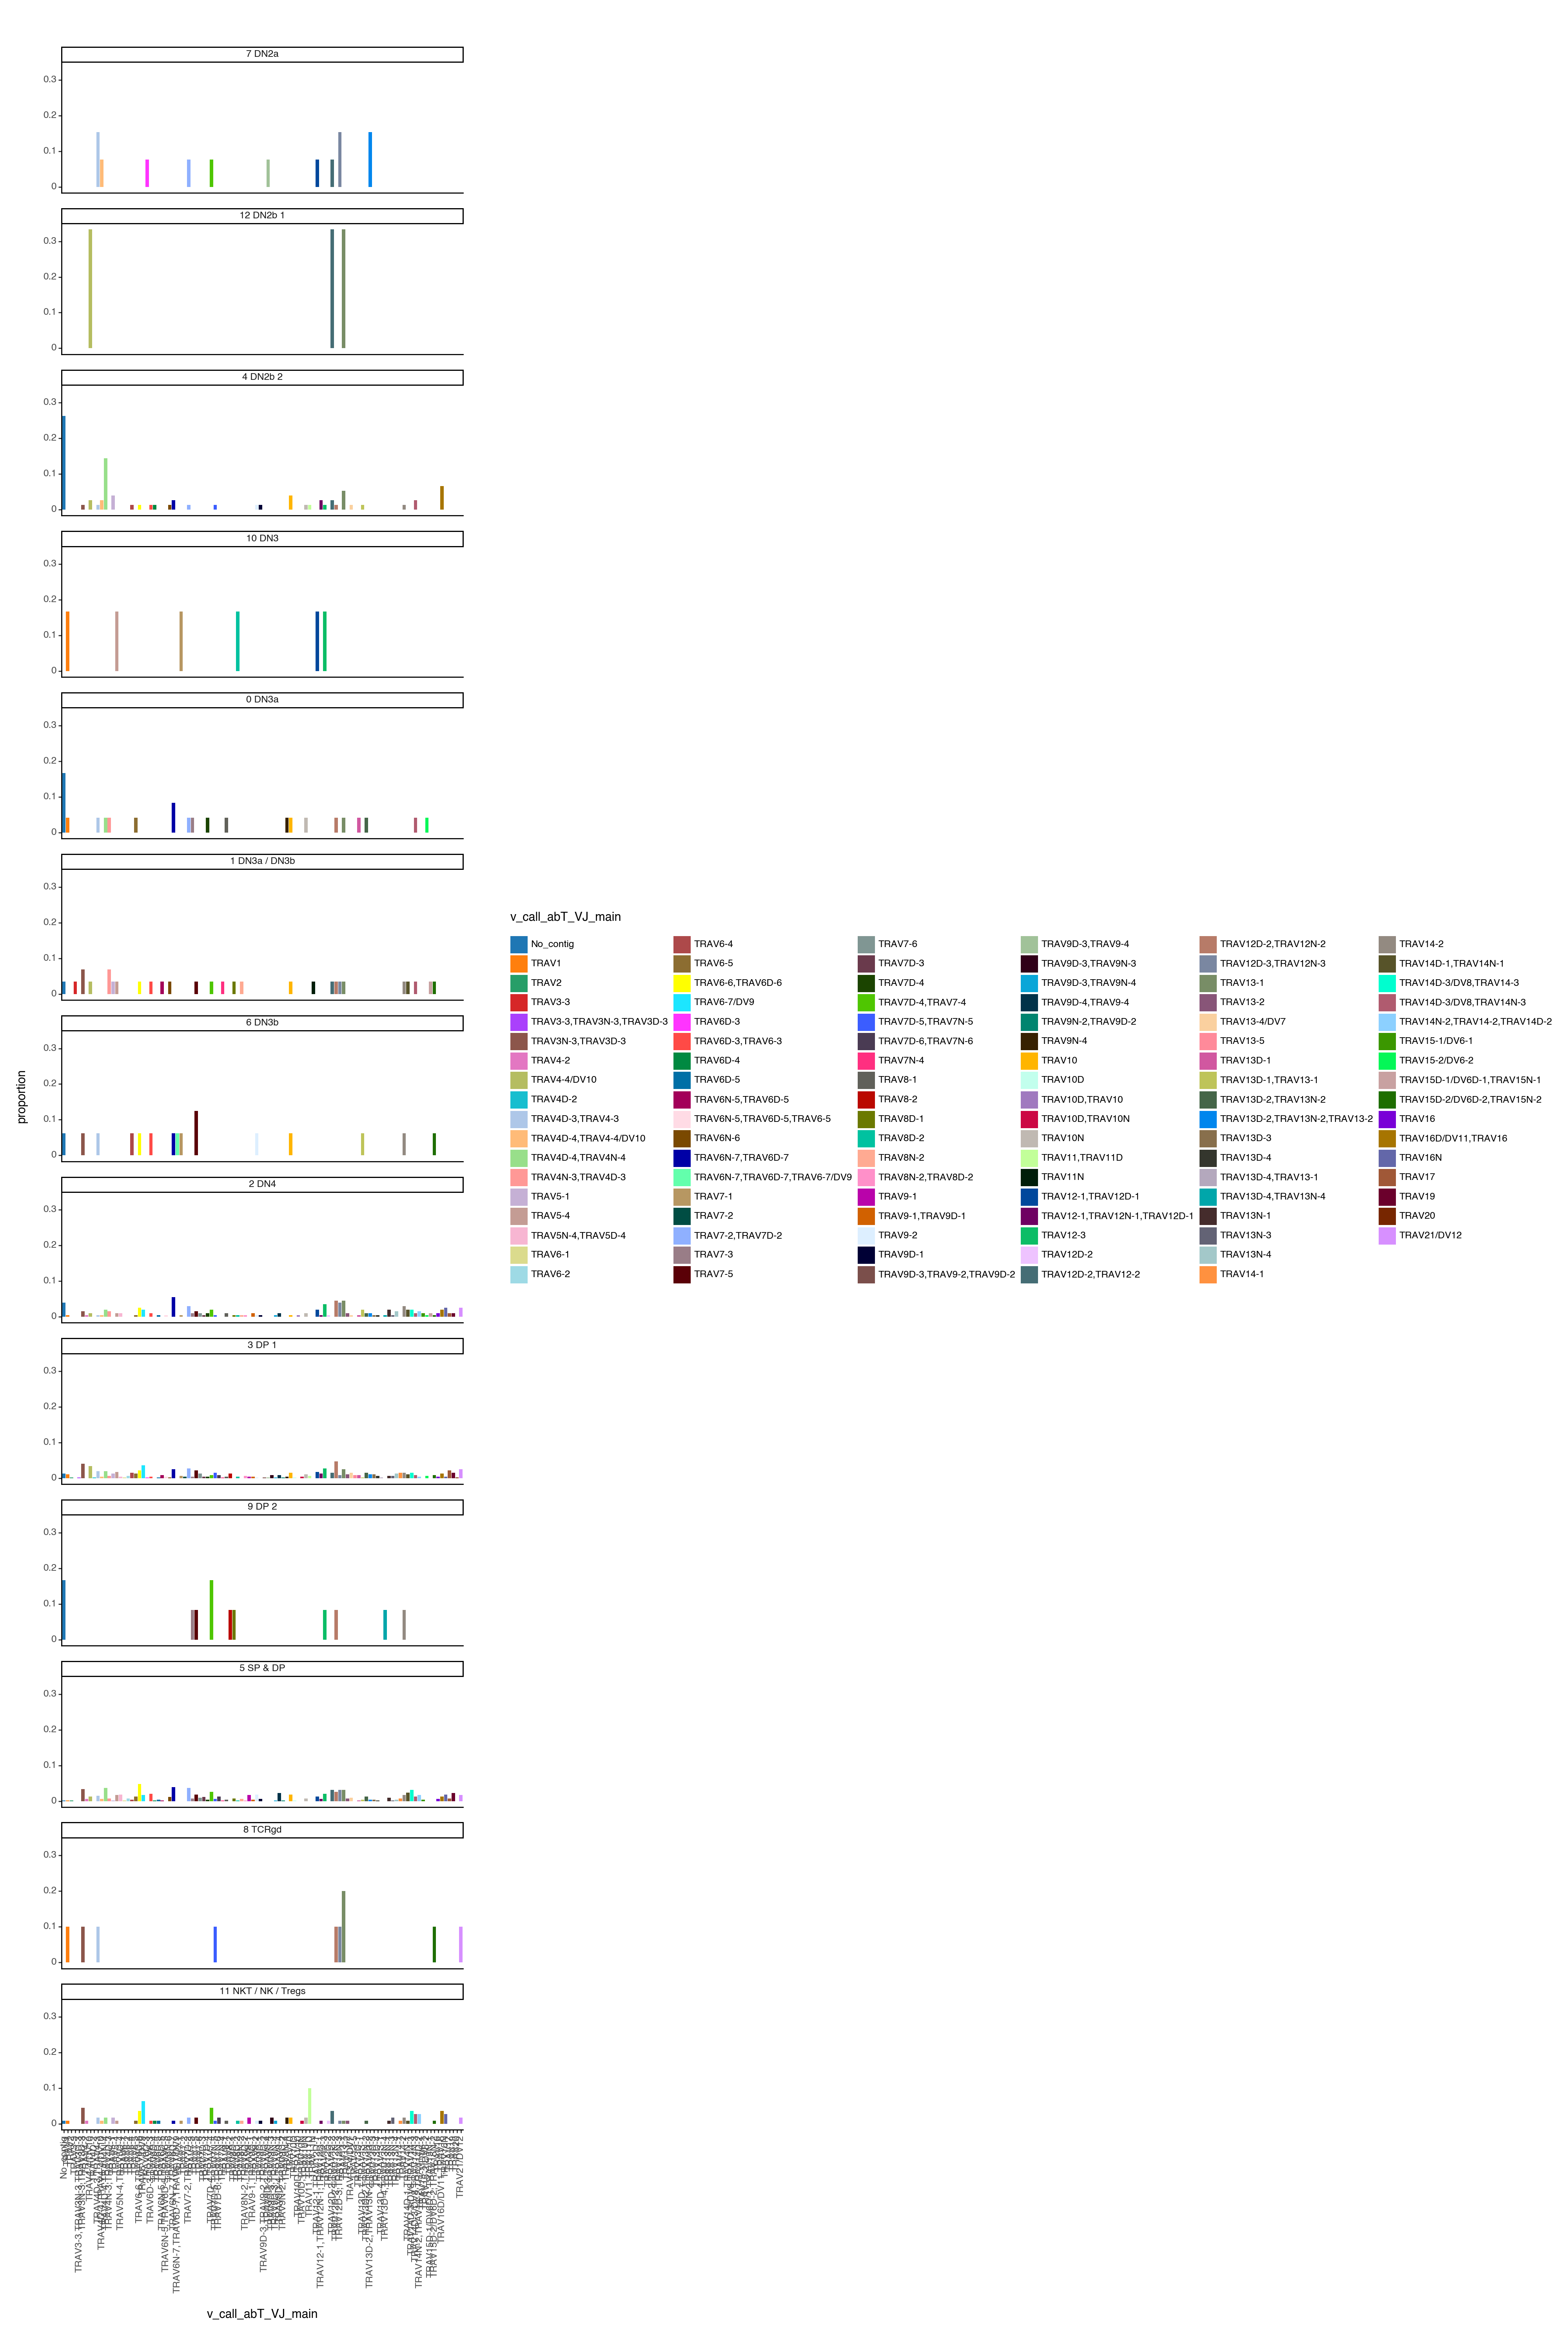

<Figure Size: (2000 x 3000)>

In [65]:
options.figure_size = (20, 30)
(
    ggplot(
        working_df,
        aes(x="v_call_abT_VJ_main", y="proportion", fill="v_call_abT_VJ_main"),
    )
    + geom_bar(stat="identity")
    + facet_wrap("~leiden", ncol=1)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90))
)

#### J gene Beta Chain (filtered out None)

In [66]:
### A lot of nonr in v_call_VJ_main - subset
#adata_contig = adata[adata.obs['has_contig'] == 'True']
adata_filtered = adata_contig[adata_contig.obs["j_call_abT_VJ_main"] != "None"]

In [67]:
working_df = pd.DataFrame(adata_filtered.obs.groupby("leiden")["j_call_abT_VJ_main"].value_counts())
working_df

j_call_abT_VJ_main
leiden    j_call_abT_VJ_main                    
0 DN3a    No_contig                            4
          TRAJ12                               3
          TRAJ17                               2
          TRAJ40                               2
          TRAJ58                               1
...                                          ...
12 DN2b 1 TRAJ27                               0
          TRAJ28                               0
          TRAJ30                               0
          TRAJ31                               0
          TRDJ1                                0

[650 rows x 1 columns]

In [68]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

leiden j_call_abT_VJ_main  counts
0       0 DN3a          No_contig       4
1       0 DN3a             TRAJ12       3
2       0 DN3a             TRAJ17       2
3       0 DN3a             TRAJ40       2
4       0 DN3a             TRAJ58       1
..         ...                ...     ...
645  12 DN2b 1             TRAJ27       0
646  12 DN2b 1             TRAJ28       0
647  12 DN2b 1             TRAJ30       0
648  12 DN2b 1             TRAJ31       0
649  12 DN2b 1              TRDJ1       0

[650 rows x 3 columns]

In [69]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.leiden.unique():
    tmp = working_df[working_df["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'0 DN3a': 25,
 '1 DN3a / DN3b': 30,
 '2 DN4': 215,
 '3 DP 1': 482,
 '4 DN2b 2': 83,
 '5 SP & DP': 540,
 '6 DN3b': 16,
 '7 DN2a': 13,
 '8 TCRgd': 13,
 '9 DP 2': 12,
 '10 DN3': 7,
 '11 NKT / NK / Tregs': 111,
 '12 DN2b 1': 3}

In [70]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [71]:
working_df

leiden j_call_abT_VJ_main  counts  proportion
0       0 DN3a          No_contig       4        0.16
1       0 DN3a             TRAJ12       3        0.12
2       0 DN3a             TRAJ17       2        0.08
3       0 DN3a             TRAJ40       2        0.08
4       0 DN3a             TRAJ58       1        0.04
..         ...                ...     ...         ...
645  12 DN2b 1             TRAJ27       0        0.00
646  12 DN2b 1             TRAJ28       0        0.00
647  12 DN2b 1             TRAJ30       0        0.00
648  12 DN2b 1             TRAJ31       0        0.00
649  12 DN2b 1              TRDJ1       0        0.00

[650 rows x 4 columns]

In [72]:
## Reordering
working_df["leiden"] = working_df[
    "leiden"
].cat.reorder_categories(
    [
        "7 DN2a",
        "12 DN2b 1",
        "4 DN2b 2",
        "10 DN3",
        "0 DN3a",
        "1 DN3a / DN3b",
        "6 DN3b",
        "2 DN4",
        "3 DP 1",
        "9 DP 2",
        "5 SP & DP",
        "8 TCRgd",
        "11 NKT / NK / Tregs",
    ]
)

In [73]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [74]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

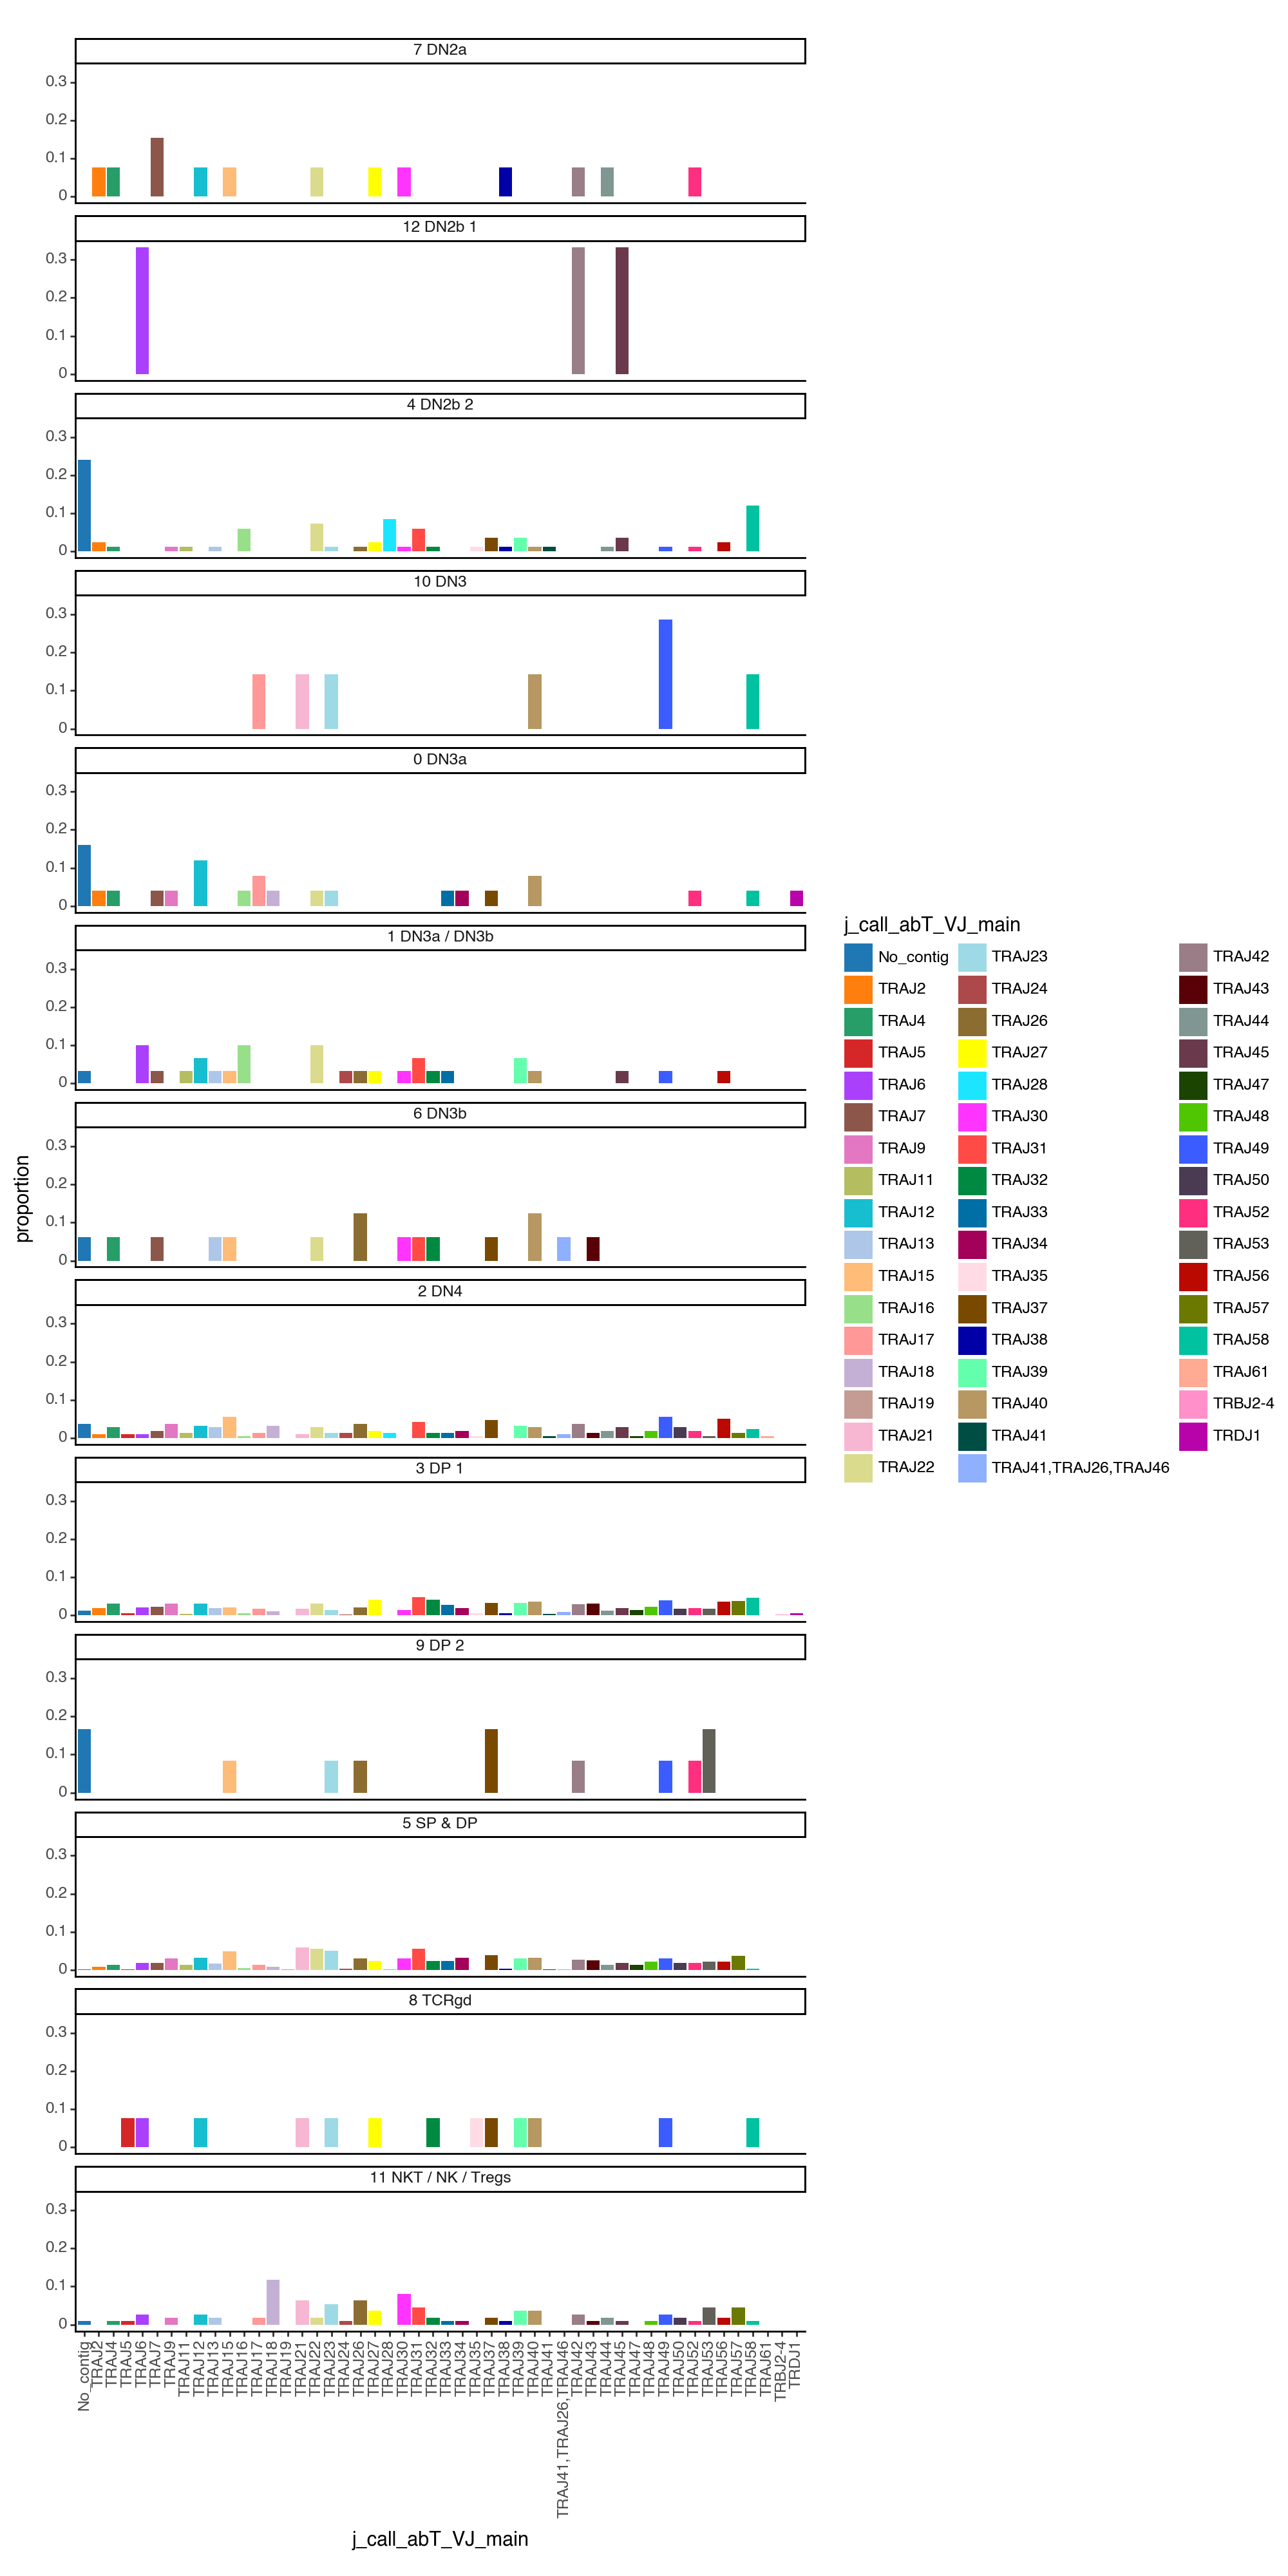

<Figure Size: (1000 x 2000)>

In [76]:
options.figure_size = (10, 20)
(
    ggplot(
        working_df,
        aes(x="j_call_abT_VJ_main", y="proportion", fill="j_call_abT_VJ_main"),
    )
    + geom_bar(stat="identity")
    + facet_wrap("~leiden", ncol=1)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90))
)

In [96]:
### A lot of nonr in v_call_VJ_main - subset
#adata_contig = adata[adata.obs['has_contig'] == 'True']
adata_filtered = adata_contig[adata_contig.obs["v_call_VDJ_main"] != "None"]

In [97]:
working_df = pd.DataFrame(adata_filtered.obs.groupby("leiden")["v_call_VDJ_main"].value_counts())
working_df

v_call_VDJ_main
leiden    v_call_VDJ_main                 
0 DN3a    TRBV15                        53
          TRBV13-1                      51
          TRBV5                         45
          TRBV13-2                      45
          TRBV31                        43
...                                    ...
12 DN2b 1 TRBV21                         0
          TRBV19                         0
          TRBV12-2                       0
          TRBV10                         0
          TRDV1                          0

[351 rows x 1 columns]

In [98]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

leiden v_call_VDJ_main  counts
0       0 DN3a          TRBV15      53
1       0 DN3a        TRBV13-1      51
2       0 DN3a           TRBV5      45
3       0 DN3a        TRBV13-2      45
4       0 DN3a          TRBV31      43
..         ...             ...     ...
346  12 DN2b 1          TRBV21       0
347  12 DN2b 1          TRBV19       0
348  12 DN2b 1        TRBV12-2       0
349  12 DN2b 1          TRBV10       0
350  12 DN2b 1           TRDV1       0

[351 rows x 3 columns]

In [99]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.leiden.unique():
    tmp = working_df[working_df["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'0 DN3a': 625,
 '1 DN3a / DN3b': 434,
 '2 DN4': 1416,
 '3 DP 1': 1477,
 '4 DN2b 2': 452,
 '5 SP & DP': 565,
 '6 DN3b': 391,
 '7 DN2a': 44,
 '8 TCRgd': 69,
 '9 DP 2': 66,
 '10 DN3': 87,
 '11 NKT / NK / Tregs': 110,
 '12 DN2b 1': 35}

In [100]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [101]:
working_df

leiden v_call_VDJ_main  counts  proportion
0       0 DN3a          TRBV15      53      0.0848
1       0 DN3a        TRBV13-1      51      0.0816
2       0 DN3a           TRBV5      45      0.0720
3       0 DN3a        TRBV13-2      45      0.0720
4       0 DN3a          TRBV31      43      0.0688
..         ...             ...     ...         ...
346  12 DN2b 1          TRBV21       0      0.0000
347  12 DN2b 1          TRBV19       0      0.0000
348  12 DN2b 1        TRBV12-2       0      0.0000
349  12 DN2b 1          TRBV10       0      0.0000
350  12 DN2b 1           TRDV1       0      0.0000

[351 rows x 4 columns]

In [102]:
## Reordering
working_df["leiden"] = working_df[
    "leiden"
].cat.reorder_categories(
    [
        "7 DN2a",
        "12 DN2b 1",
        "4 DN2b 2",
        "10 DN3",
        "0 DN3a",
        "1 DN3a / DN3b",
        "6 DN3b",
        "2 DN4",
        "3 DP 1",
        "9 DP 2",
        "5 SP & DP",
        "8 TCRgd",
        "11 NKT / NK / Tregs",
    ]
)

In [103]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [104]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

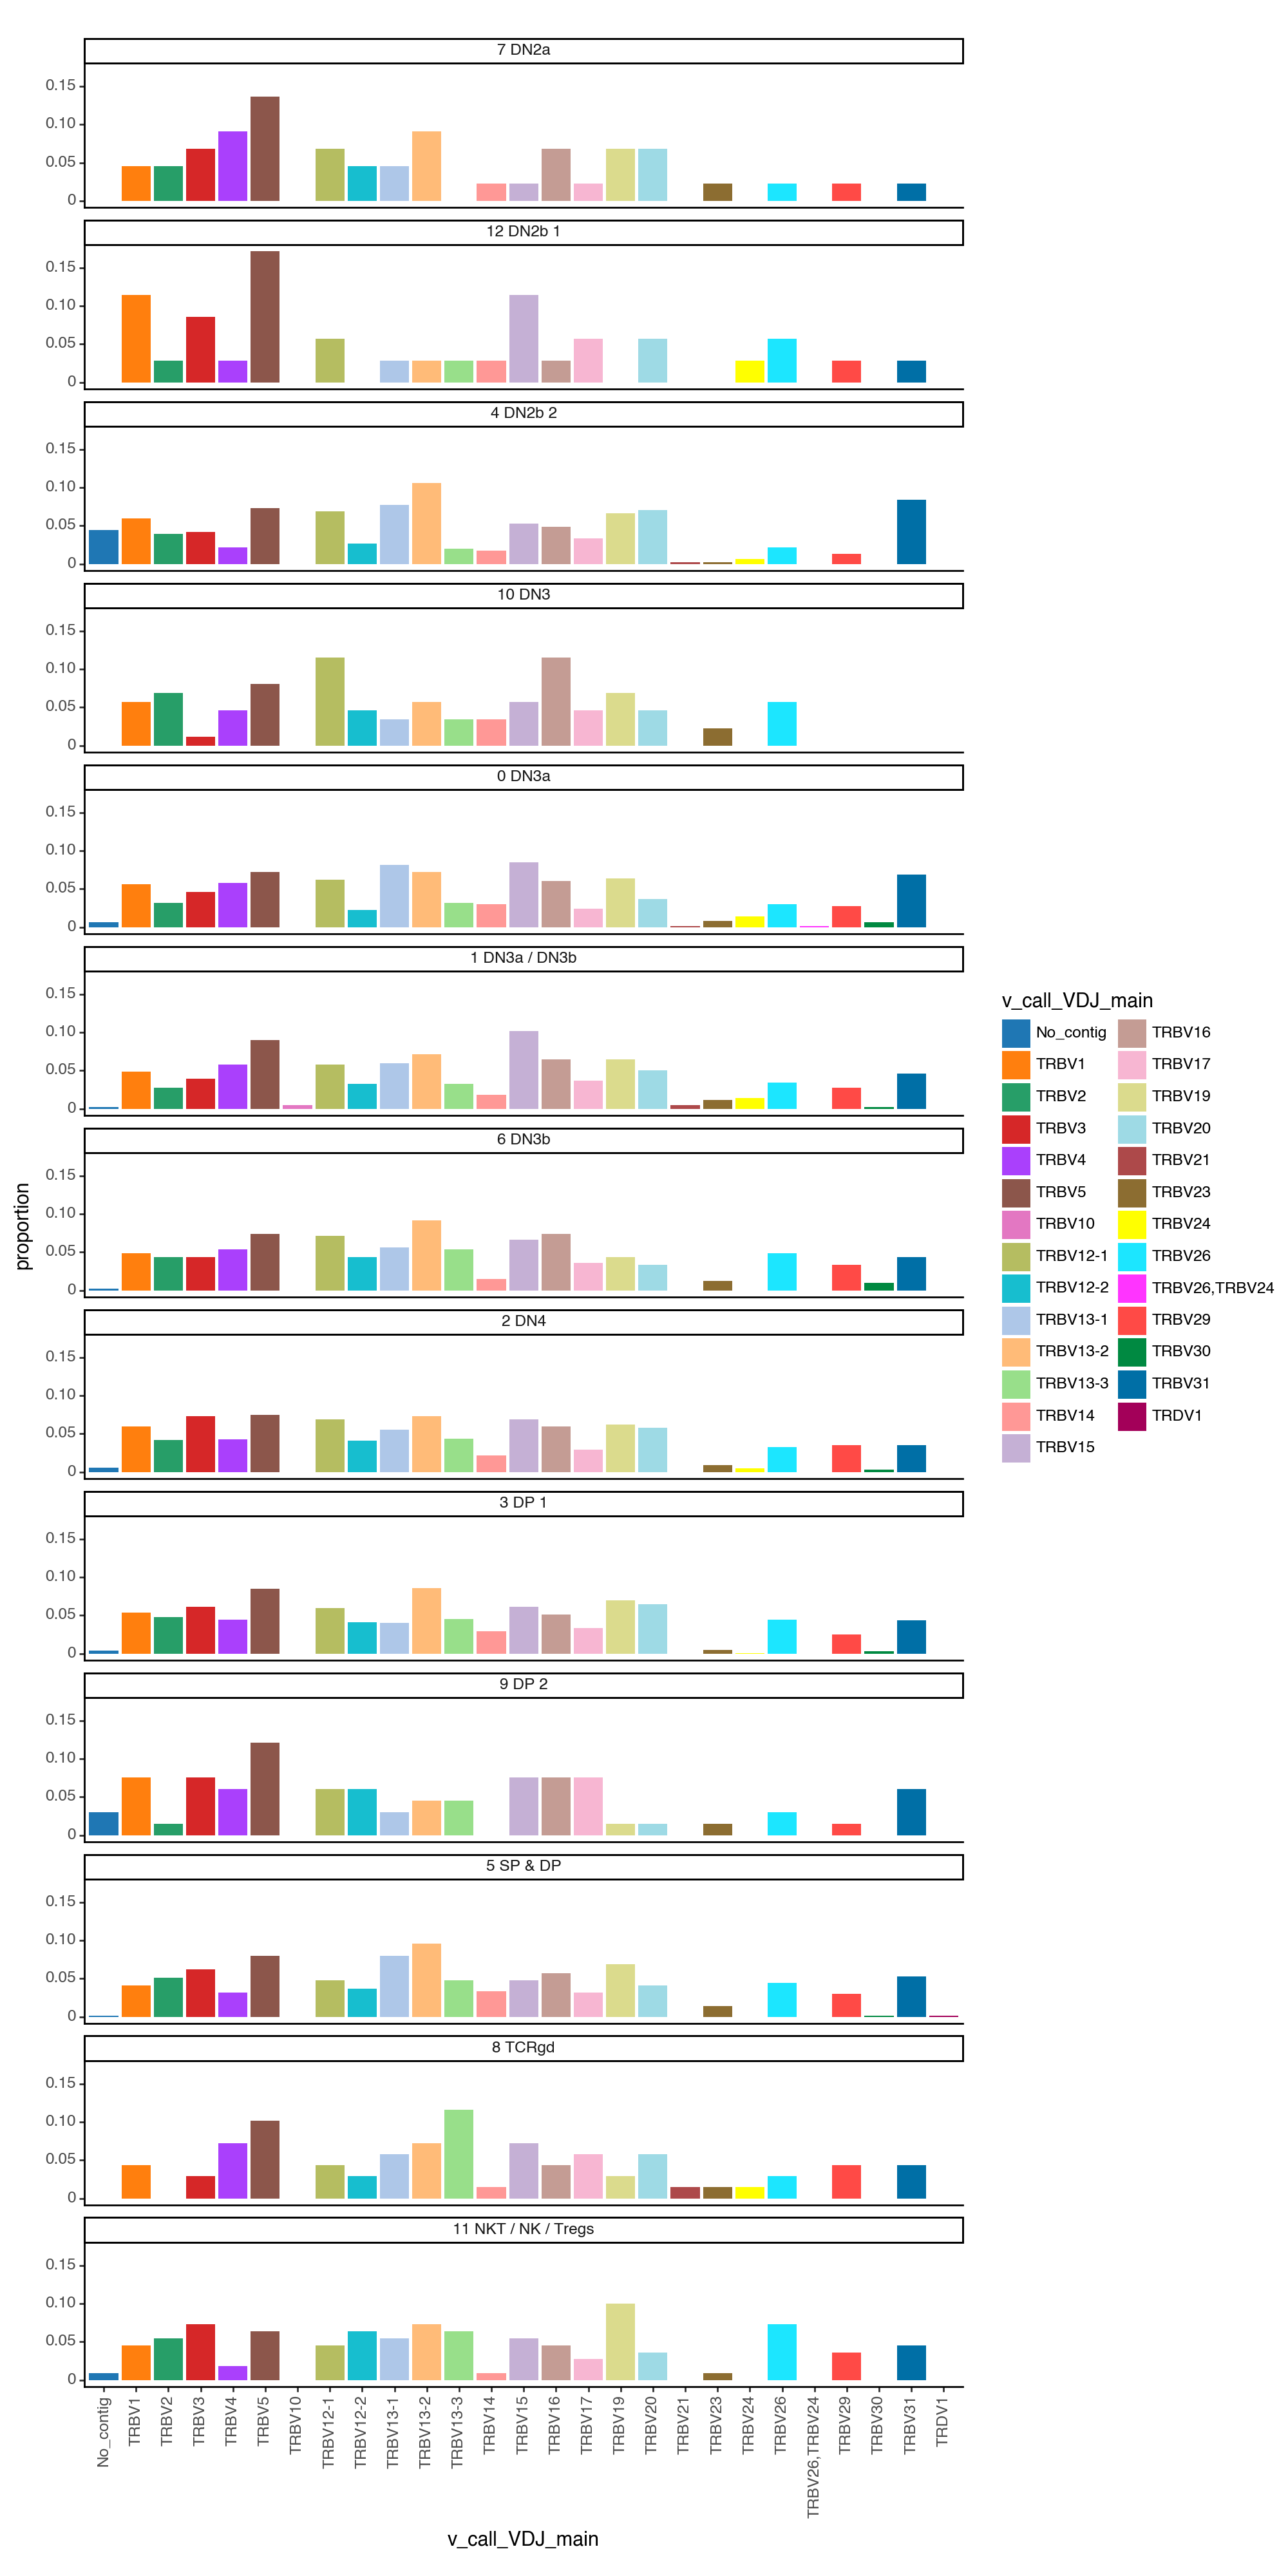

<Figure Size: (1000 x 2000)>

In [105]:
options.figure_size = (10, 20)
(
    ggplot(
        working_df,
        aes(x="v_call_VDJ_main", y="proportion", fill="v_call_VDJ_main"),
    )
    + geom_bar(stat="identity")
    + facet_wrap("~leiden", ncol=1)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90))
)

# they want to know how is it different between control and KO - but KO has all no contigs!

In [75]:
### they want to know how is it different between control and KO - but KO has all no contigs!

In [76]:
adata_contig.obs["Sample"].value_counts()

Control    6348
Name: Sample, dtype: int64

In [154]:
# subset to KO only
adata_KO = adata_contig[adata_contig.obs["Sample"] == "Krt76-/-"]

In [155]:
adata_KO.obs['has_contig'].value_counts()

Series([], Name: has_contig, dtype: int64)

## What if i use the whole object - filter out no_contig and None only for the VDJ columns??? - Also cleaning up!

In [117]:
adata_filtered = adata[adata.obs["v_call_abT_VDJ_main"] != "None"]
adata_filtered = adata_filtered[adata_filtered.obs["v_call_abT_VDJ_main"] != "No_contig"]

In [118]:
adata_filtered

View of AnnData object with n_obs × n_vars = 5726 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'has_contig', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j

In [119]:
working_df = pd.DataFrame(adata_filtered.obs.groupby("leiden")["v_call_abT_VDJ_main"].value_counts())
working_df

v_call_abT_VDJ_main
leiden              v_call_abT_VDJ_main                     
7 DN2a              TRBV5                                  6
                    TRBV4                                  4
                    TRBV13-2                               4
                    TRBV19                                 3
                    TRBV3                                  3
...                                                      ...
11 NKT / NK / Tregs TRBV10                                 0
                    TRBV21                                 0
                    TRBV24                                 0
                    TRBV26,TRBV24                          0
                    TRBV30                                 0

[325 rows x 1 columns]

In [120]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

leiden v_call_abT_VDJ_main  counts
0                 7 DN2a               TRBV5       6
1                 7 DN2a               TRBV4       4
2                 7 DN2a            TRBV13-2       4
3                 7 DN2a              TRBV19       3
4                 7 DN2a               TRBV3       3
..                   ...                 ...     ...
320  11 NKT / NK / Tregs              TRBV10       0
321  11 NKT / NK / Tregs              TRBV21       0
322  11 NKT / NK / Tregs              TRBV24       0
323  11 NKT / NK / Tregs       TRBV26,TRBV24       0
324  11 NKT / NK / Tregs              TRBV30       0

[325 rows x 3 columns]

In [121]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.leiden.unique():
    tmp = working_df[working_df["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'7 DN2a': 44,
 '12 DN2b 1': 35,
 '4 DN2b 2': 432,
 '10 DN3': 87,
 '0 DN3a': 621,
 '1 DN3a / DN3b': 433,
 '6 DN3b': 390,
 '2 DN4': 1408,
 '3 DP 1': 1471,
 '9 DP 2': 64,
 '5 SP & DP': 563,
 '8 TCRgd': 69,
 '11 NKT / NK / Tregs': 109}

In [122]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [123]:
working_df

leiden v_call_abT_VDJ_main  counts  proportion
0                 7 DN2a               TRBV5       6    0.136364
1                 7 DN2a               TRBV4       4    0.090909
2                 7 DN2a            TRBV13-2       4    0.090909
3                 7 DN2a              TRBV19       3    0.068182
4                 7 DN2a               TRBV3       3    0.068182
..                   ...                 ...     ...         ...
320  11 NKT / NK / Tregs              TRBV10       0    0.000000
321  11 NKT / NK / Tregs              TRBV21       0    0.000000
322  11 NKT / NK / Tregs              TRBV24       0    0.000000
323  11 NKT / NK / Tregs       TRBV26,TRBV24       0    0.000000
324  11 NKT / NK / Tregs              TRBV30       0    0.000000

[325 rows x 4 columns]

In [124]:
## Reordering
working_df["leiden"] = working_df[
    "leiden"
].cat.reorder_categories(
    [
        "7 DN2a",
        "12 DN2b 1",
        "4 DN2b 2",
        "10 DN3",
        "0 DN3a",
        "1 DN3a / DN3b",
        "6 DN3b",
        "2 DN4",
        "3 DP 1",
        "9 DP 2",
        "5 SP & DP",
        "8 TCRgd",
        "11 NKT / NK / Tregs",
    ]
)

In [125]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [126]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

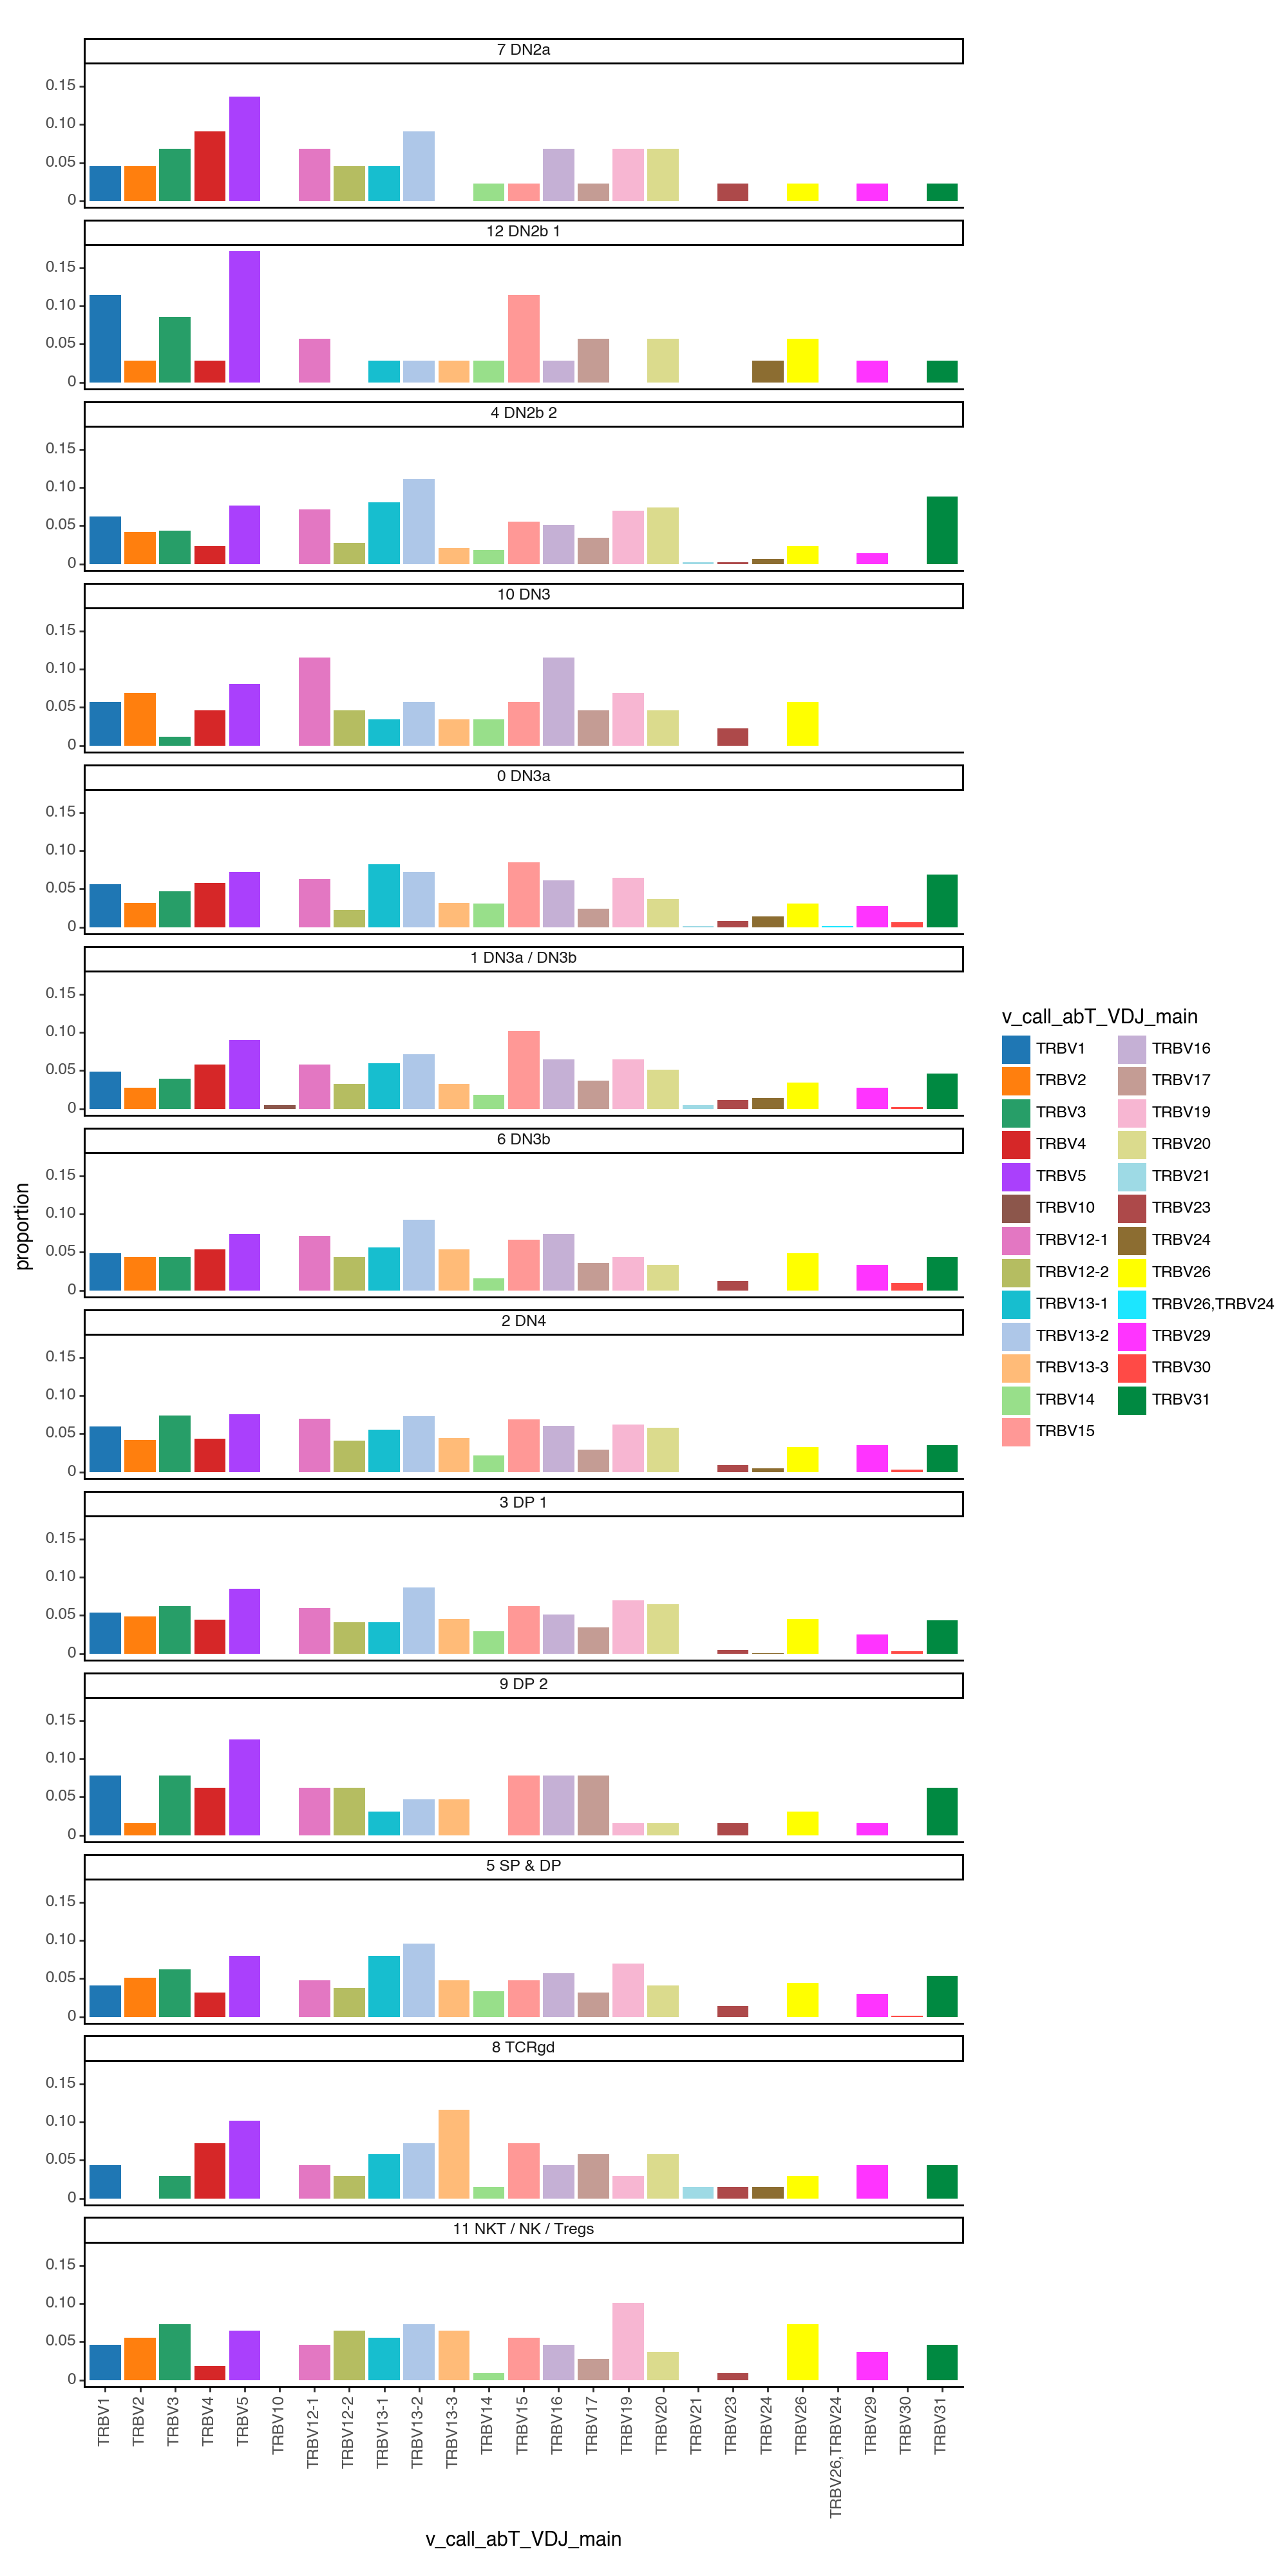

<Figure Size: (1000 x 2000)>

In [128]:
options.figure_size = (10, 20)
(
    ggplot(
        working_df,
        aes(x="v_call_abT_VDJ_main", y="proportion", fill="v_call_abT_VDJ_main"),
    )
    + geom_bar(stat="identity")
    + facet_wrap("~leiden", ncol=1)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90))
)

#### J gene Beta chain

In [131]:
adata_filtered = adata[adata.obs["j_call_abT_VDJ_main"] != "None"]
adata_filtered = adata_filtered[adata_filtered.obs["j_call_abT_VDJ_main"] != "No_contig"]

In [132]:
adata_filtered

View of AnnData object with n_obs × n_vars = 6252 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'has_contig', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j

In [133]:
working_df = pd.DataFrame(adata_filtered.obs.groupby("leiden")["j_call_abT_VDJ_main"].value_counts())
working_df

j_call_abT_VDJ_main
leiden              j_call_abT_VDJ_main                         
7 DN2a              TRBJ2-1                                   18
                    TRBJ1-1                                   11
                    TRBJ2-5                                    8
                    TRBJ2-7                                    7
                    TRBJ2-4                                    6
...                                                          ...
11 NKT / NK / Tregs TRBJ2-6                                    2
                    TRBJ1-6,TRBJ2-2,TRBJ2-7                    0
                    TRBJ2-2,TRBJ1-5                            0
                    TRBJ2-4,TRBJ2-3                            0
                    TRBJ2-4,TRBJ2-5                            0

[221 rows x 1 columns]

In [134]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

leiden      j_call_abT_VDJ_main  counts
0                 7 DN2a                  TRBJ2-1      18
1                 7 DN2a                  TRBJ1-1      11
2                 7 DN2a                  TRBJ2-5       8
3                 7 DN2a                  TRBJ2-7       7
4                 7 DN2a                  TRBJ2-4       6
..                   ...                      ...     ...
216  11 NKT / NK / Tregs                  TRBJ2-6       2
217  11 NKT / NK / Tregs  TRBJ1-6,TRBJ2-2,TRBJ2-7       0
218  11 NKT / NK / Tregs          TRBJ2-2,TRBJ1-5       0
219  11 NKT / NK / Tregs          TRBJ2-4,TRBJ2-3       0
220  11 NKT / NK / Tregs          TRBJ2-4,TRBJ2-5       0

[221 rows x 3 columns]

In [135]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.leiden.unique():
    tmp = working_df[working_df["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'7 DN2a': 66,
 '12 DN2b 1': 37,
 '4 DN2b 2': 468,
 '10 DN3': 90,
 '0 DN3a': 746,
 '1 DN3a / DN3b': 569,
 '6 DN3b': 407,
 '2 DN4': 1486,
 '3 DP 1': 1524,
 '9 DP 2': 71,
 '5 SP & DP': 586,
 '8 TCRgd': 85,
 '11 NKT / NK / Tregs': 117}

In [136]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [137]:
working_df

leiden      j_call_abT_VDJ_main  counts  proportion
0                 7 DN2a                  TRBJ2-1      18    0.272727
1                 7 DN2a                  TRBJ1-1      11    0.166667
2                 7 DN2a                  TRBJ2-5       8    0.121212
3                 7 DN2a                  TRBJ2-7       7    0.106061
4                 7 DN2a                  TRBJ2-4       6    0.090909
..                   ...                      ...     ...         ...
216  11 NKT / NK / Tregs                  TRBJ2-6       2    0.017094
217  11 NKT / NK / Tregs  TRBJ1-6,TRBJ2-2,TRBJ2-7       0    0.000000
218  11 NKT / NK / Tregs          TRBJ2-2,TRBJ1-5       0    0.000000
219  11 NKT / NK / Tregs          TRBJ2-4,TRBJ2-3       0    0.000000
220  11 NKT / NK / Tregs          TRBJ2-4,TRBJ2-5       0    0.000000

[221 rows x 4 columns]

In [138]:
## Reordering
working_df["leiden"] = working_df[
    "leiden"
].cat.reorder_categories(
    [
        "7 DN2a",
        "12 DN2b 1",
        "4 DN2b 2",
        "10 DN3",
        "0 DN3a",
        "1 DN3a / DN3b",
        "6 DN3b",
        "2 DN4",
        "3 DP 1",
        "9 DP 2",
        "5 SP & DP",
        "8 TCRgd",
        "11 NKT / NK / Tregs",
    ]
)

In [139]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [140]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

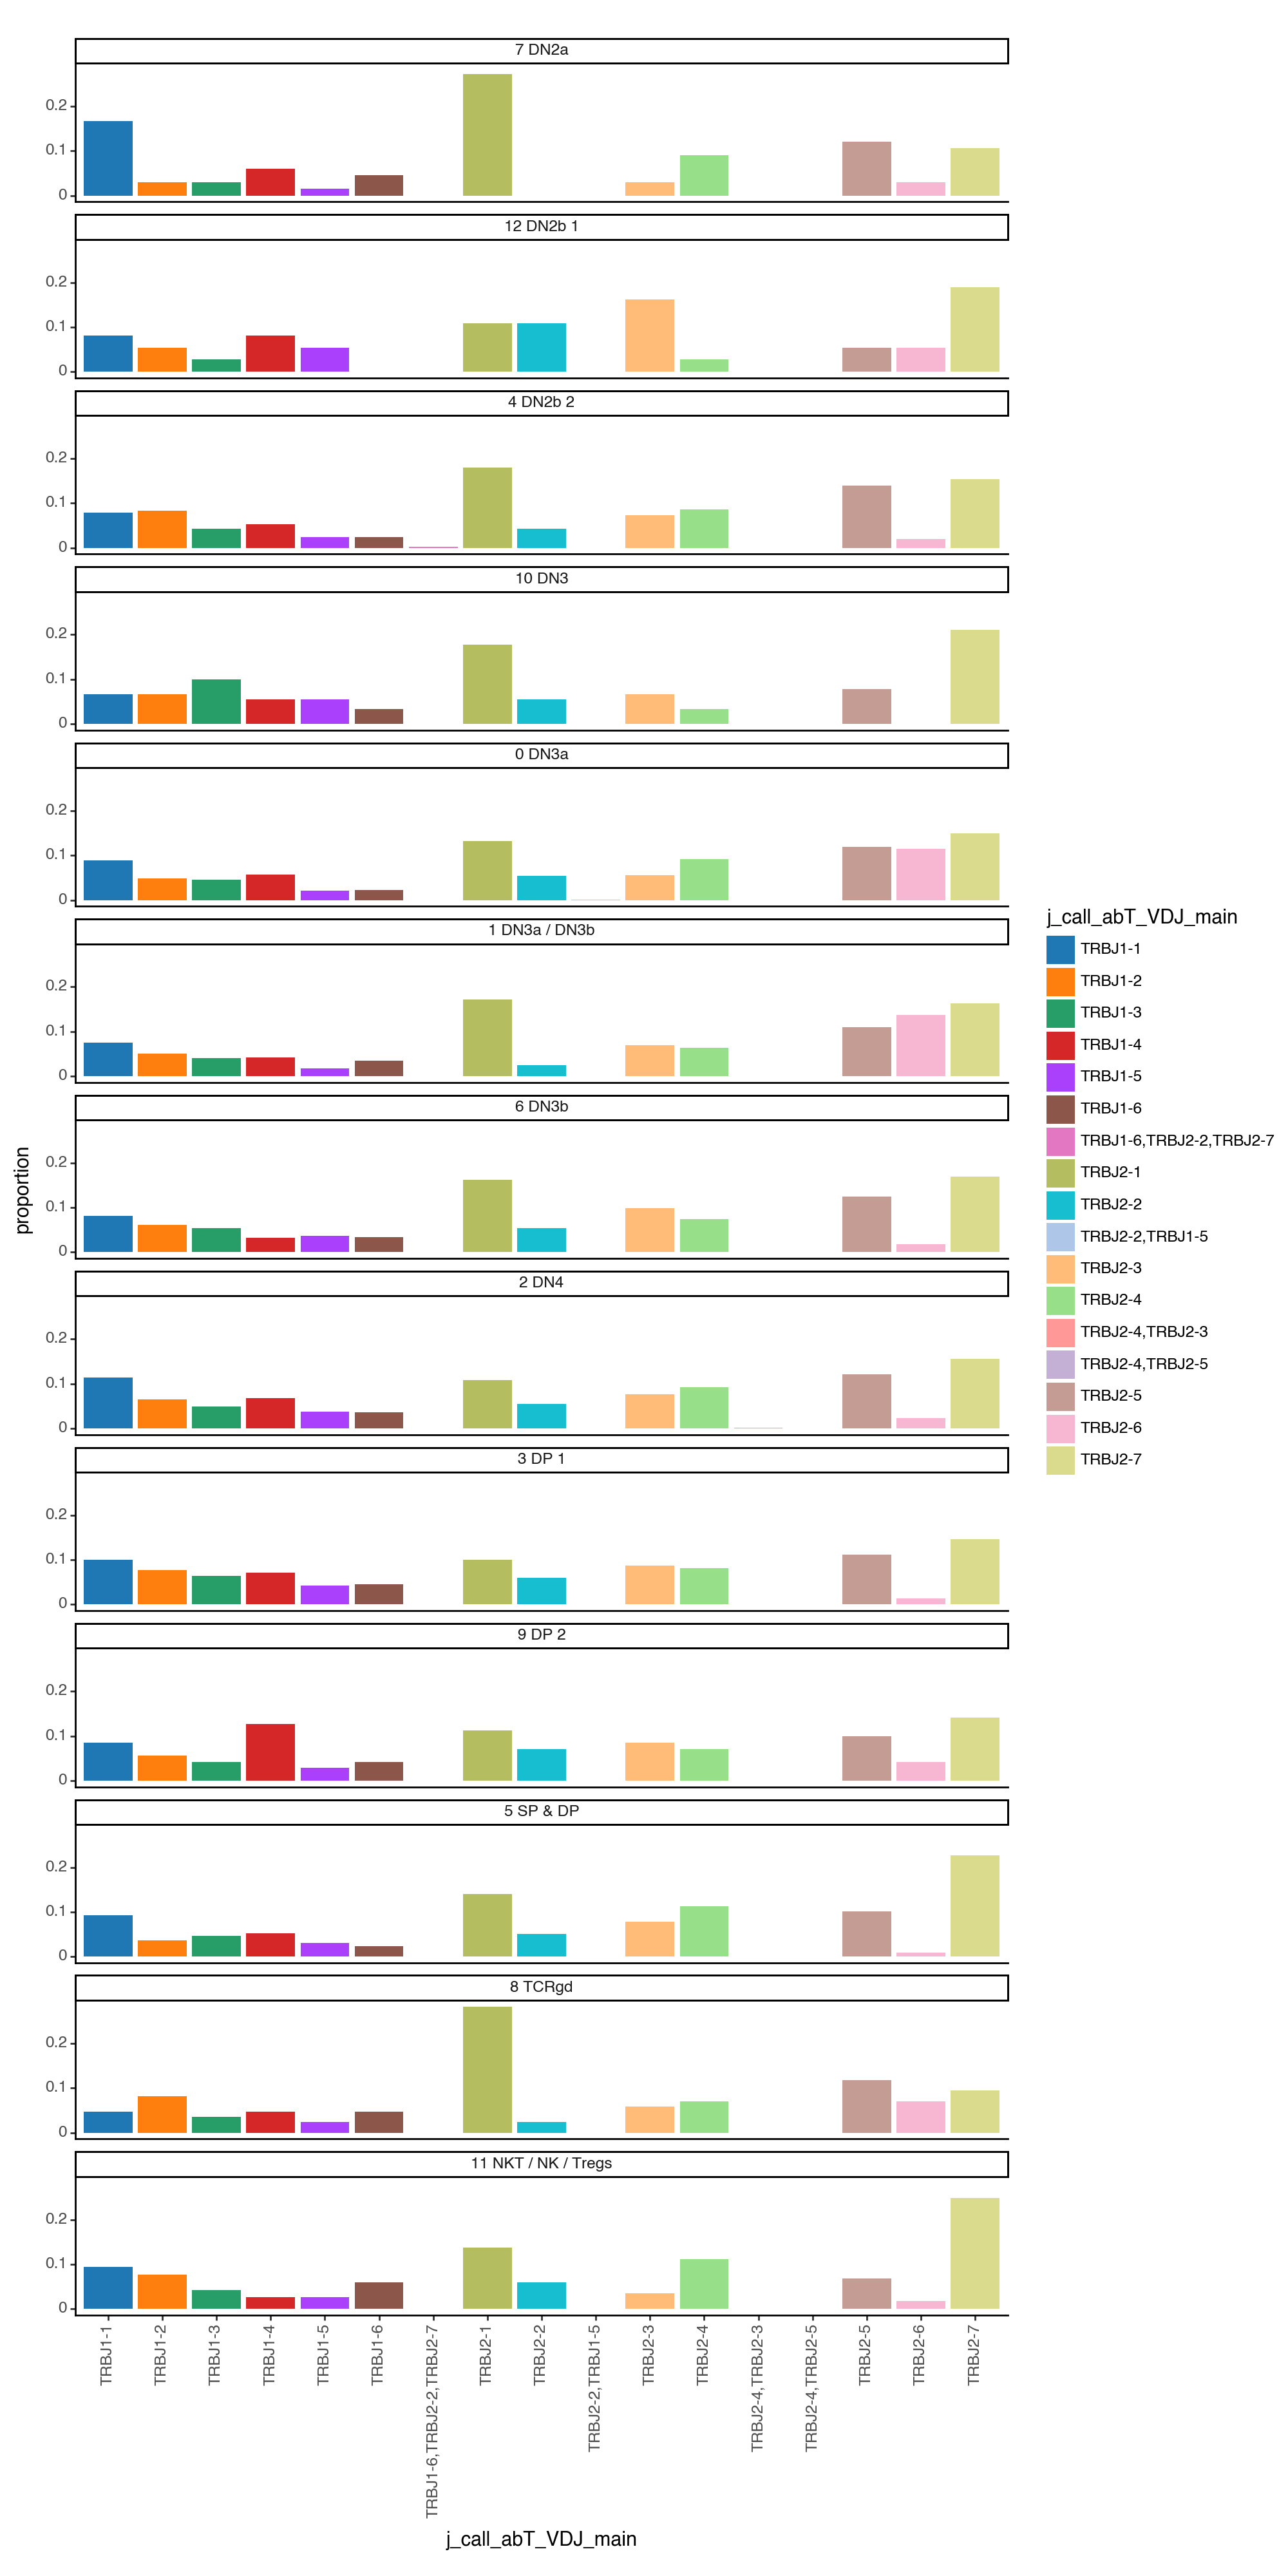

<Figure Size: (1000 x 2000)>

In [141]:
options.figure_size = (10, 20)
(
    ggplot(
        working_df,
        aes(x="j_call_abT_VDJ_main", y="proportion", fill="j_call_abT_VDJ_main"),
    )
    + geom_bar(stat="identity")
    + facet_wrap("~leiden", ncol=1)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90))
)

#### V gene Alpha Chain

In [142]:
adata_filtered = adata[adata.obs["v_call_abT_VJ_main"] != "None"]
adata_filtered = adata_filtered[adata_filtered.obs["v_call_abT_VJ_main"] != "No_contig"]

In [143]:
adata_filtered

View of AnnData object with n_obs × n_vars = 1457 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'has_contig', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j

In [144]:
working_df = pd.DataFrame(adata_filtered.obs.groupby("leiden")["v_call_abT_VJ_main"].value_counts())
working_df

v_call_abT_VJ_main
leiden              v_call_abT_VJ_main                              
7 DN2a              TRAV13D-2,TRAV13N-2,TRAV13-2                   2
                    TRAV4D-3,TRAV4-3                               2
                    TRAV12D-3,TRAV12N-3                            2
                    TRAV12D-2,TRAV12-2                             1
                    TRAV9D-3,TRAV9-4                               1
...                                                              ...
11 NKT / NK / Tregs TRAV12-3                                       0
                    TRAV12D-2,TRAV12N-2                            0
                    TRAV6D-3                                       0
                    TRAV8D-1                                       0
                    TRAV9D-3,TRAV9-2,TRAV9D-2                      0

[1365 rows x 1 columns]

In [145]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

leiden            v_call_abT_VJ_main  counts
0                  7 DN2a  TRAV13D-2,TRAV13N-2,TRAV13-2       2
1                  7 DN2a              TRAV4D-3,TRAV4-3       2
2                  7 DN2a           TRAV12D-3,TRAV12N-3       2
3                  7 DN2a            TRAV12D-2,TRAV12-2       1
4                  7 DN2a              TRAV9D-3,TRAV9-4       1
...                   ...                           ...     ...
1360  11 NKT / NK / Tregs                      TRAV12-3       0
1361  11 NKT / NK / Tregs           TRAV12D-2,TRAV12N-2       0
1362  11 NKT / NK / Tregs                      TRAV6D-3       0
1363  11 NKT / NK / Tregs                      TRAV8D-1       0
1364  11 NKT / NK / Tregs     TRAV9D-3,TRAV9-2,TRAV9D-2       0

[1365 rows x 3 columns]

In [146]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.leiden.unique():
    tmp = working_df[working_df["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'7 DN2a': 13,
 '12 DN2b 1': 3,
 '4 DN2b 2': 56,
 '10 DN3': 6,
 '0 DN3a': 20,
 '1 DN3a / DN3b': 28,
 '6 DN3b': 15,
 '2 DN4': 191,
 '3 DP 1': 460,
 '9 DP 2': 10,
 '5 SP & DP': 536,
 '8 TCRgd': 10,
 '11 NKT / NK / Tregs': 109}

In [147]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [148]:
working_df

leiden            v_call_abT_VJ_main  counts  proportion
0                  7 DN2a  TRAV13D-2,TRAV13N-2,TRAV13-2       2    0.153846
1                  7 DN2a              TRAV4D-3,TRAV4-3       2    0.153846
2                  7 DN2a           TRAV12D-3,TRAV12N-3       2    0.153846
3                  7 DN2a            TRAV12D-2,TRAV12-2       1    0.076923
4                  7 DN2a              TRAV9D-3,TRAV9-4       1    0.076923
...                   ...                           ...     ...         ...
1360  11 NKT / NK / Tregs                      TRAV12-3       0    0.000000
1361  11 NKT / NK / Tregs           TRAV12D-2,TRAV12N-2       0    0.000000
1362  11 NKT / NK / Tregs                      TRAV6D-3       0    0.000000
1363  11 NKT / NK / Tregs                      TRAV8D-1       0    0.000000
1364  11 NKT / NK / Tregs     TRAV9D-3,TRAV9-2,TRAV9D-2       0    0.000000

[1365 rows x 4 columns]

In [149]:
## Reordering
working_df["leiden"] = working_df[
    "leiden"
].cat.reorder_categories(
    [
        "7 DN2a",
        "12 DN2b 1",
        "4 DN2b 2",
        "10 DN3",
        "0 DN3a",
        "1 DN3a / DN3b",
        "6 DN3b",
        "2 DN4",
        "3 DP 1",
        "9 DP 2",
        "5 SP & DP",
        "8 TCRgd",
        "11 NKT / NK / Tregs",
    ]
)

In [150]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [151]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

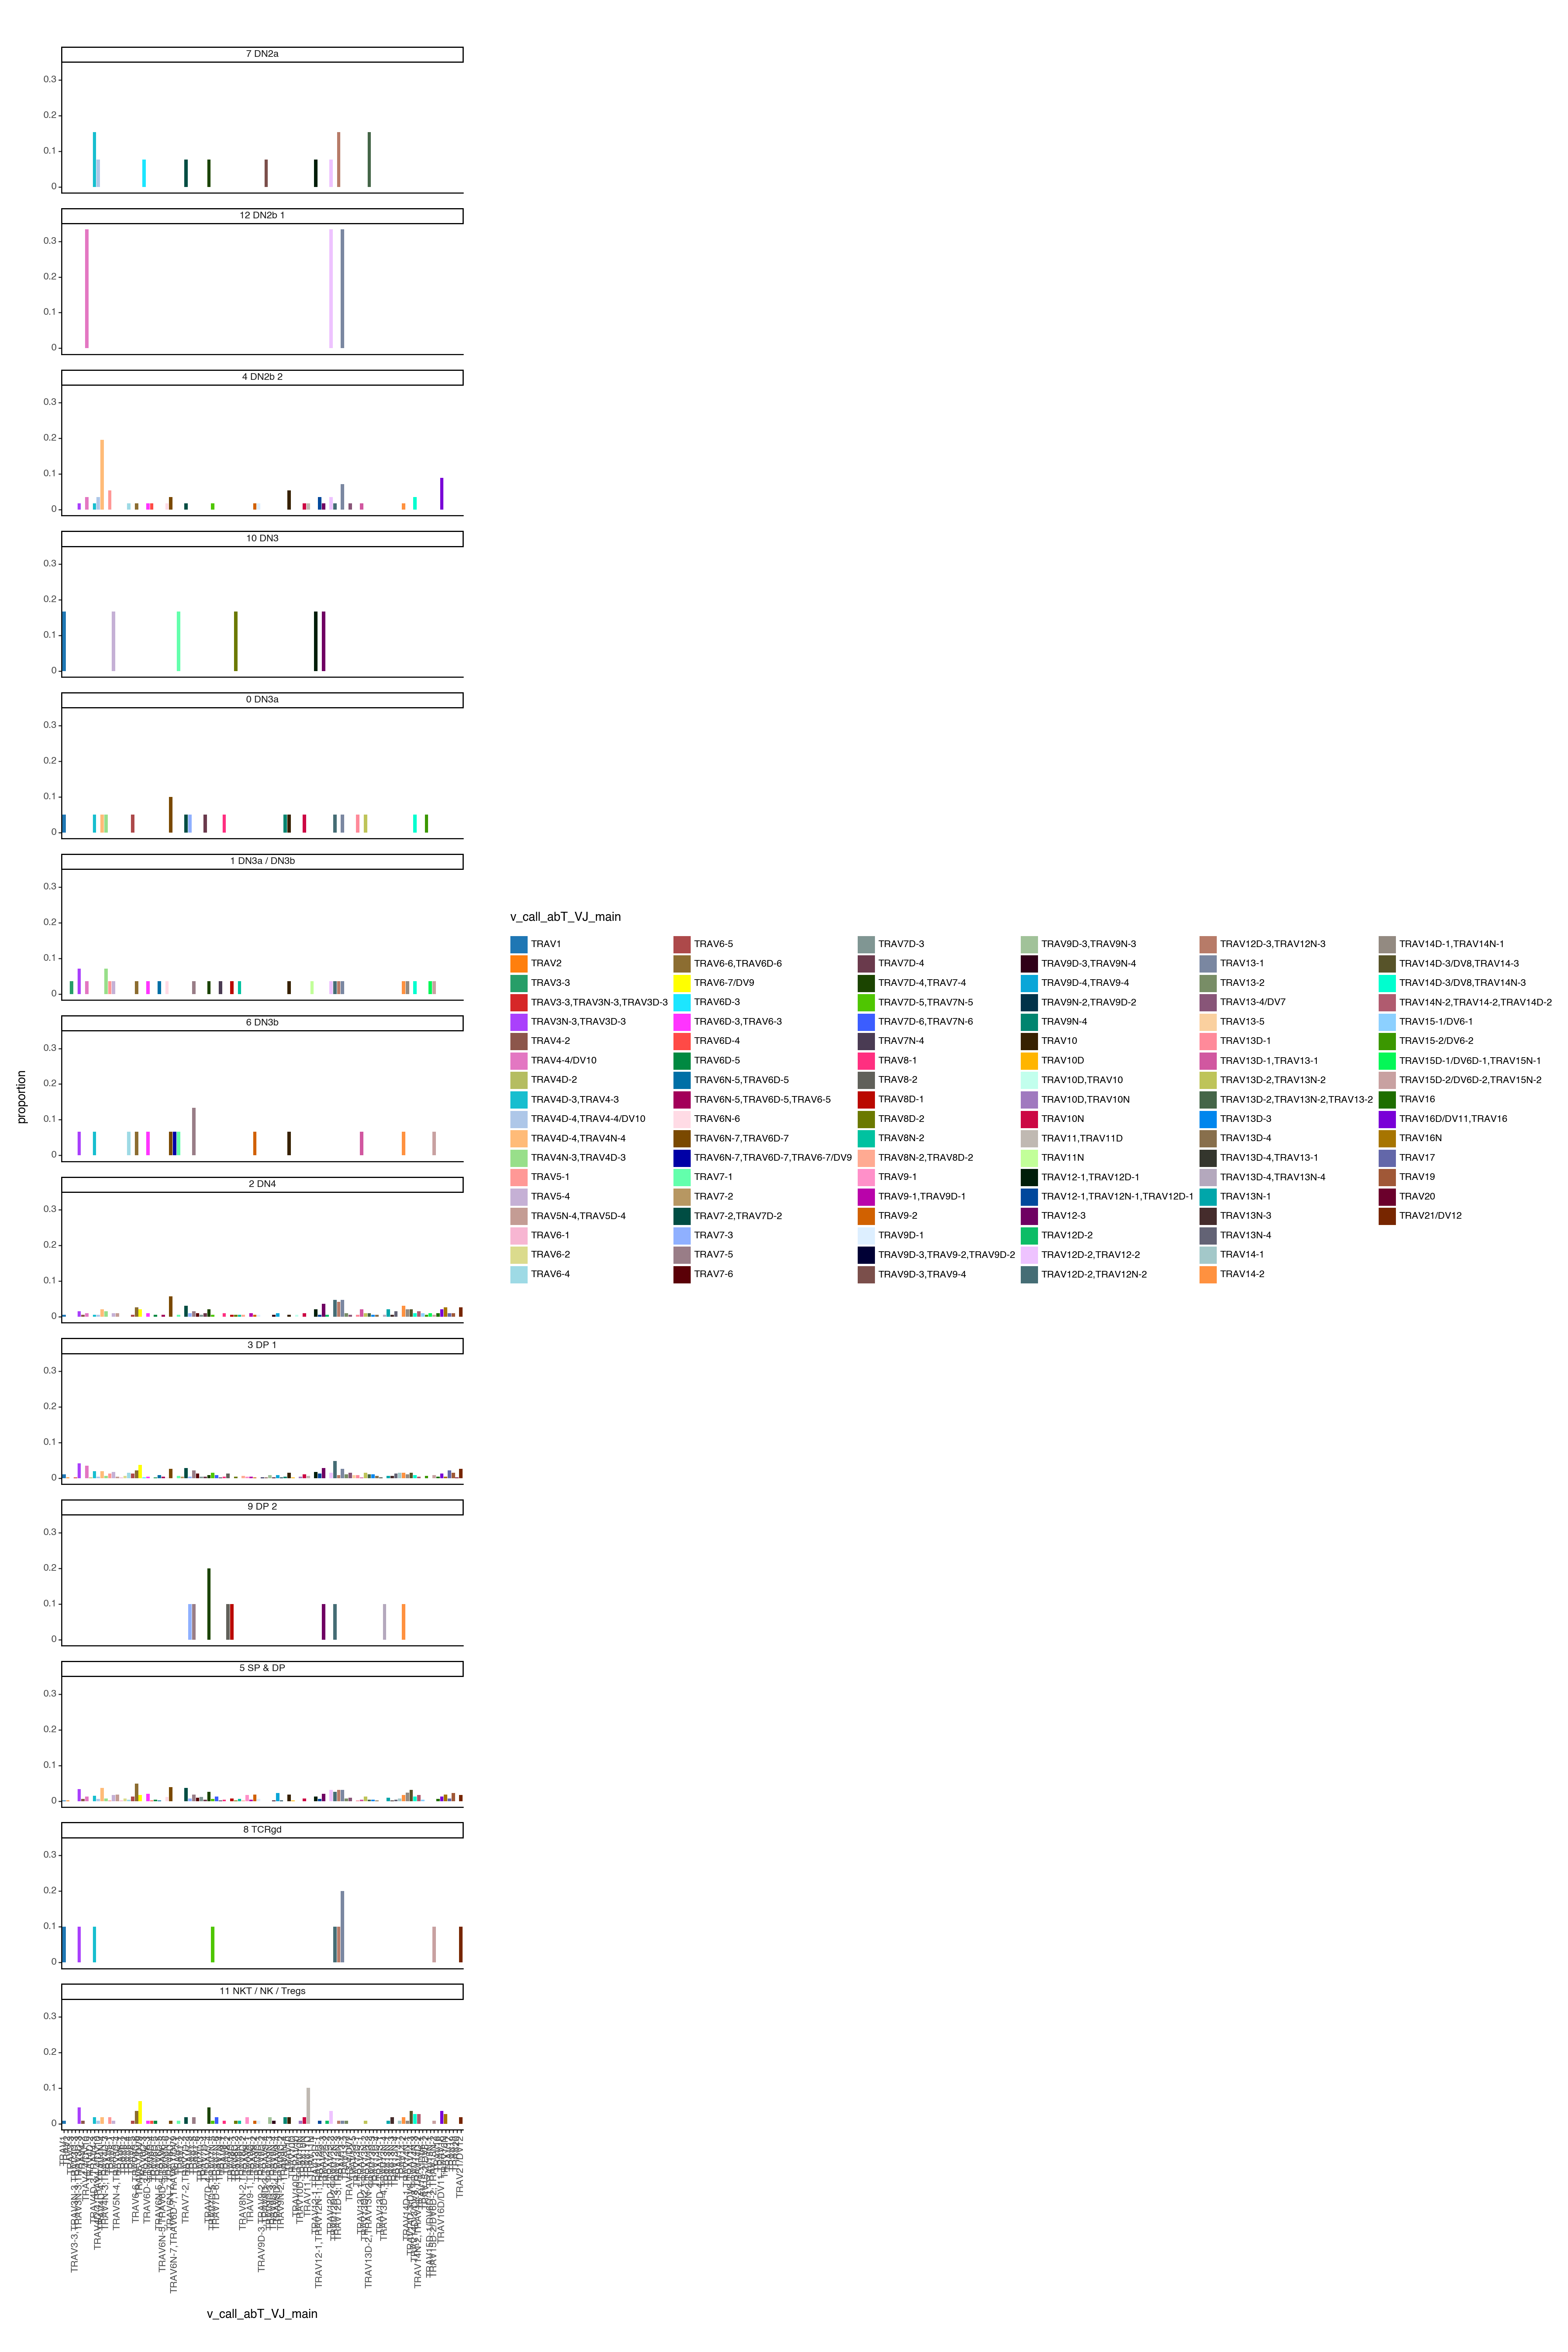

<Figure Size: (2000 x 3000)>

In [153]:
options.figure_size = (20, 30)
(
    ggplot(
        working_df,
        aes(x="v_call_abT_VJ_main", y="proportion", fill="v_call_abT_VJ_main"),
    )
    + geom_bar(stat="identity")
    + facet_wrap("~leiden", ncol=1)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90))
)

#### J gene alpha chain

In [154]:
adata_filtered = adata[adata.obs["j_call_abT_VJ_main"] != "None"]
adata_filtered = adata_filtered[adata_filtered.obs["j_call_abT_VJ_main"] != "No_contig"]

In [155]:
adata_filtered

View of AnnData object with n_obs × n_vars = 1506 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'has_contig', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j

In [156]:
working_df = pd.DataFrame(adata_filtered.obs.groupby("leiden")["j_call_abT_VJ_main"].value_counts())
working_df

j_call_abT_VJ_main
leiden              j_call_abT_VJ_main                    
7 DN2a              TRAJ7                                2
                    TRAJ2                                1
                    TRAJ15                               1
                    TRAJ22                               1
                    TRAJ38                               1
...                                                    ...
11 NKT / NK / Tregs TRAJ16                               0
                    TRAJ15                               0
                    TRAJ11                               0
                    TRAJ7                                0
                    TRDJ1                                0

[637 rows x 1 columns]

In [157]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

leiden j_call_abT_VJ_main  counts
0                 7 DN2a              TRAJ7       2
1                 7 DN2a              TRAJ2       1
2                 7 DN2a             TRAJ15       1
3                 7 DN2a             TRAJ22       1
4                 7 DN2a             TRAJ38       1
..                   ...                ...     ...
632  11 NKT / NK / Tregs             TRAJ16       0
633  11 NKT / NK / Tregs             TRAJ15       0
634  11 NKT / NK / Tregs             TRAJ11       0
635  11 NKT / NK / Tregs              TRAJ7       0
636  11 NKT / NK / Tregs              TRDJ1       0

[637 rows x 3 columns]

In [158]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.leiden.unique():
    tmp = working_df[working_df["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'7 DN2a': 13,
 '12 DN2b 1': 3,
 '4 DN2b 2': 63,
 '10 DN3': 7,
 '0 DN3a': 21,
 '1 DN3a / DN3b': 29,
 '6 DN3b': 15,
 '2 DN4': 207,
 '3 DP 1': 476,
 '9 DP 2': 10,
 '5 SP & DP': 539,
 '8 TCRgd': 13,
 '11 NKT / NK / Tregs': 110}

In [159]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [160]:
working_df

leiden j_call_abT_VJ_main  counts  proportion
0                 7 DN2a              TRAJ7       2    0.153846
1                 7 DN2a              TRAJ2       1    0.076923
2                 7 DN2a             TRAJ15       1    0.076923
3                 7 DN2a             TRAJ22       1    0.076923
4                 7 DN2a             TRAJ38       1    0.076923
..                   ...                ...     ...         ...
632  11 NKT / NK / Tregs             TRAJ16       0    0.000000
633  11 NKT / NK / Tregs             TRAJ15       0    0.000000
634  11 NKT / NK / Tregs             TRAJ11       0    0.000000
635  11 NKT / NK / Tregs              TRAJ7       0    0.000000
636  11 NKT / NK / Tregs              TRDJ1       0    0.000000

[637 rows x 4 columns]

In [161]:
## Reordering
working_df["leiden"] = working_df[
    "leiden"
].cat.reorder_categories(
    [
        "7 DN2a",
        "12 DN2b 1",
        "4 DN2b 2",
        "10 DN3",
        "0 DN3a",
        "1 DN3a / DN3b",
        "6 DN3b",
        "2 DN4",
        "3 DP 1",
        "9 DP 2",
        "5 SP & DP",
        "8 TCRgd",
        "11 NKT / NK / Tregs",
    ]
)

In [162]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [163]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

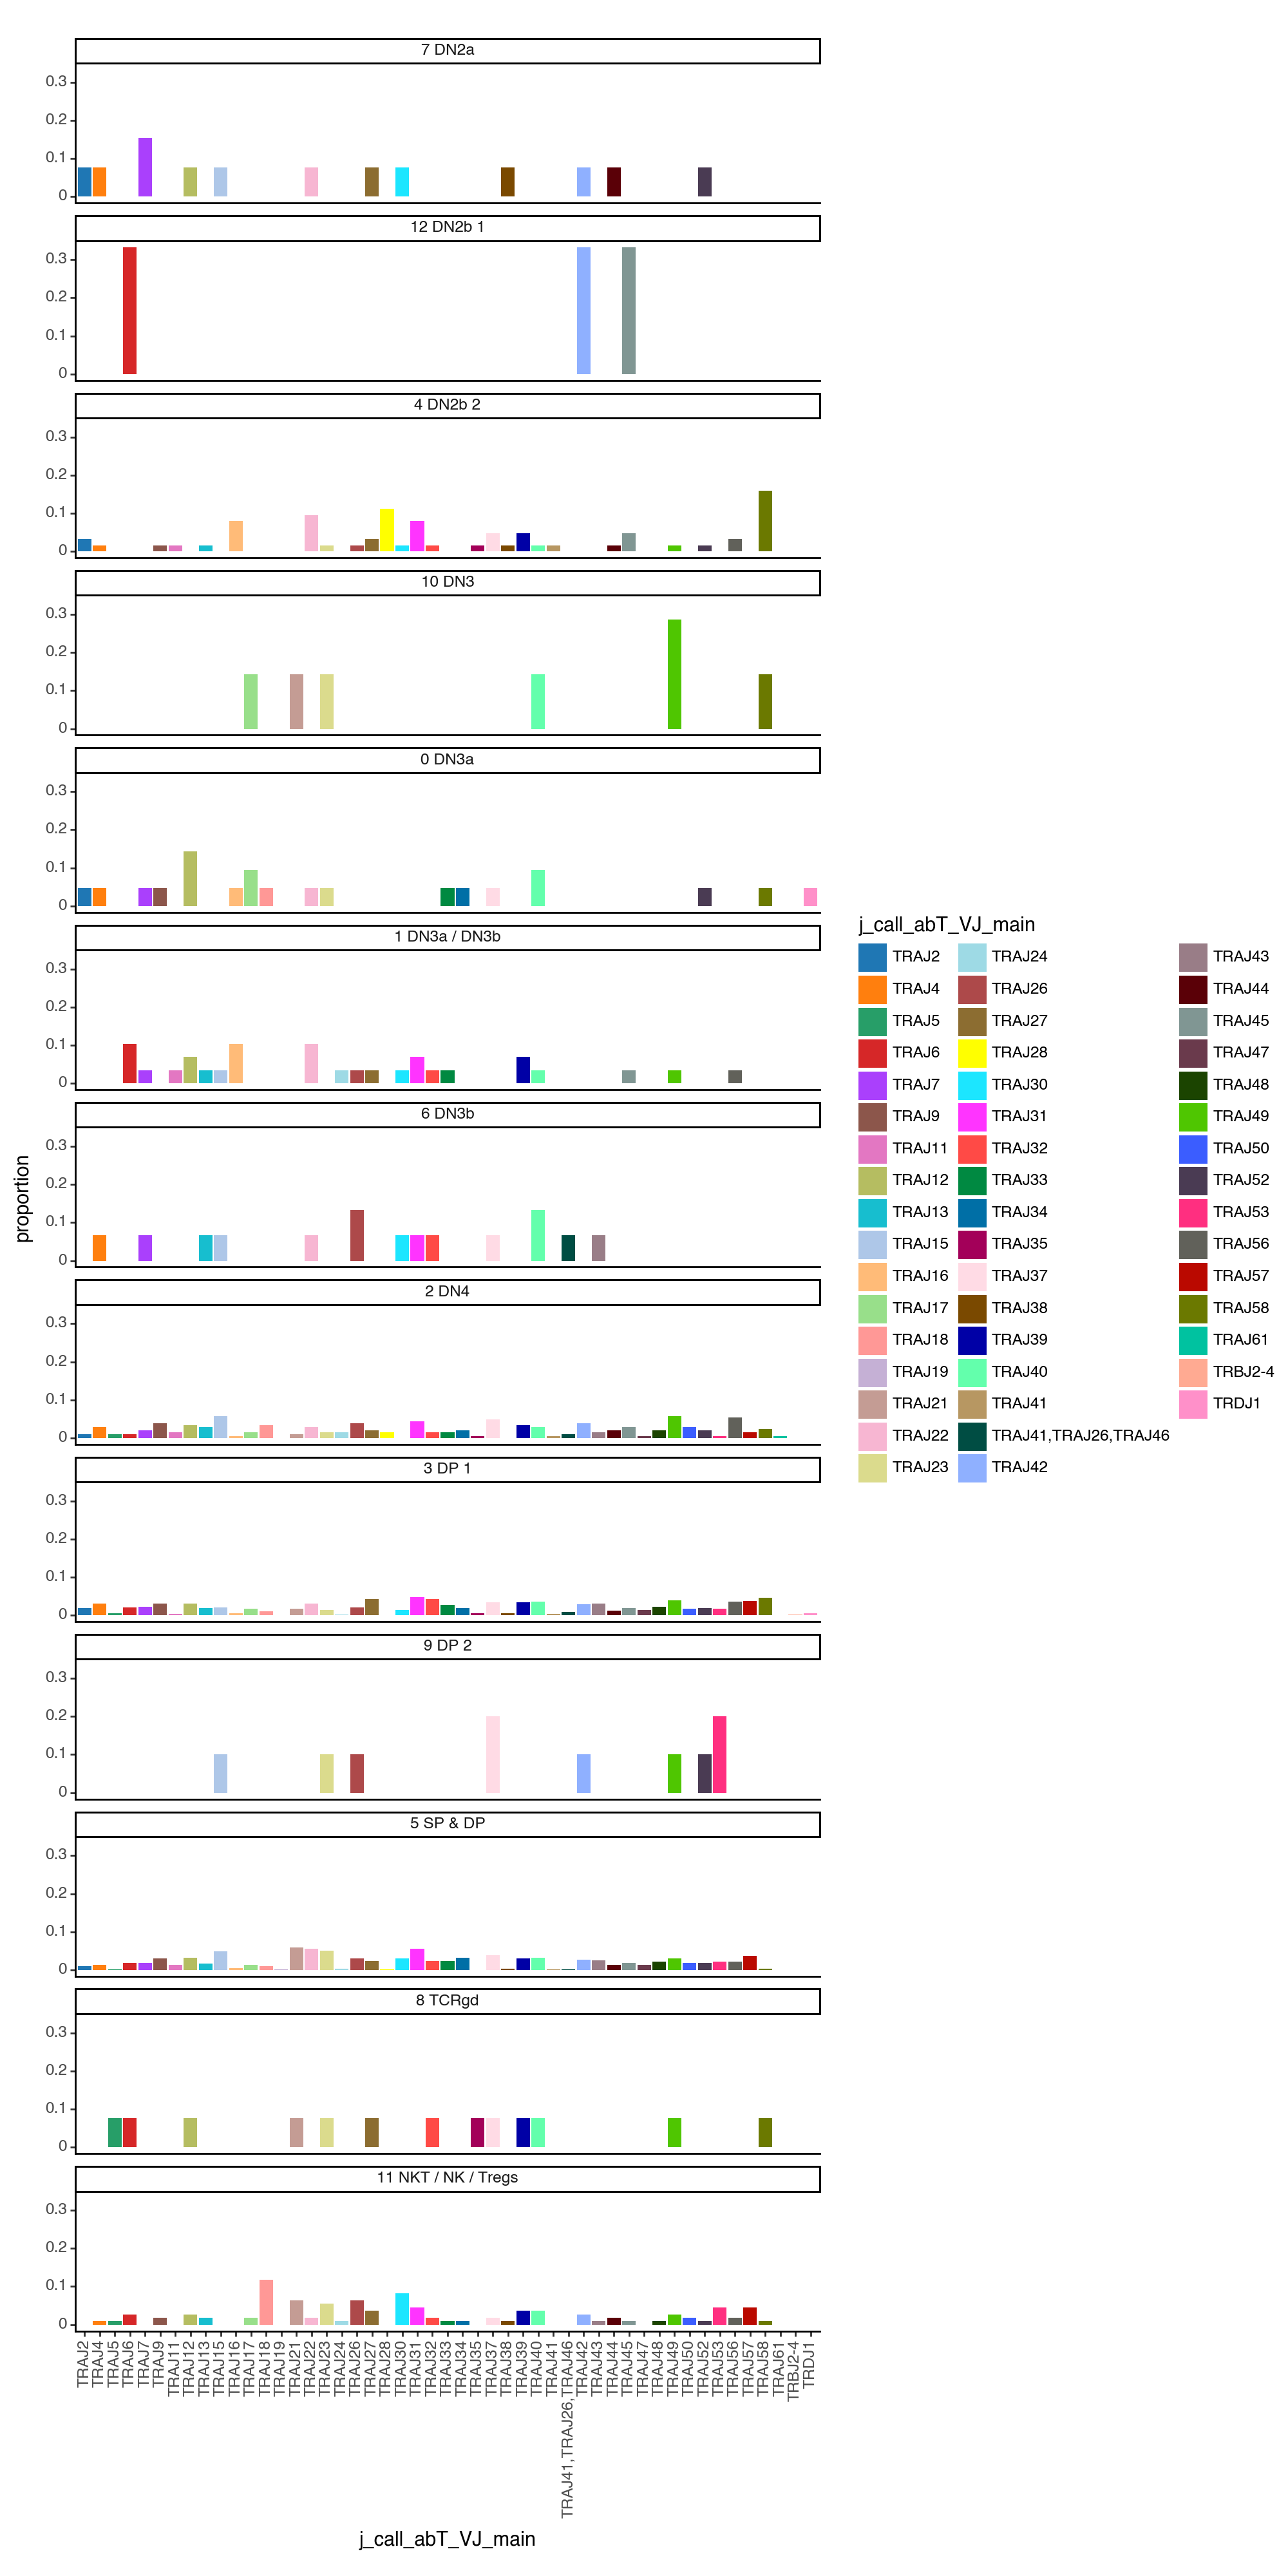

<Figure Size: (1000 x 2000)>

In [164]:
options.figure_size = (10, 20)
(
    ggplot(
        working_df,
        aes(x="j_call_abT_VJ_main", y="proportion", fill="j_call_abT_VJ_main"),
    )
    + geom_bar(stat="identity")
    + facet_wrap("~leiden", ncol=1)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90))
)

### CAN WE SUBSET TO JUST KO and re-plot??? 

In [165]:
adata_filtered = adata[adata.obs["v_call_abT_VDJ_main"] != "None"]
adata_filtered = adata_filtered[adata_filtered.obs["v_call_abT_VDJ_main"] != "No_contig"]

In [166]:
adata_filteredKO = adata_filtered[adata_filtered.obs["Sample"] == "Krt76-/-"]

In [167]:
working_df = pd.DataFrame(adata_filtered_KO.obs.groupby("leiden")["v_call_abT_VDJ_main"].value_counts())
working_df

NameError: name 'adata_filtered_KO' is not defined

Nope.... doesn't work!!! 

### Trying v_call_VDJ_main - no abT filter!

In [168]:
adata_filtered2 = adata[adata.obs["v_call_VDJ_main"] != "None"]
adata_filtered2 = adata_filtered2[adata_filtered2.obs["v_call_VDJ_main"] != "No_contig"]

In [169]:
adata_filtered2

View of AnnData object with n_obs × n_vars = 5727 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'has_contig', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j

In [170]:
working_df = pd.DataFrame(adata_filtered2.obs.groupby("leiden")["v_call_VDJ_main"].value_counts())
working_df

v_call_VDJ_main
leiden              v_call_VDJ_main                 
7 DN2a              TRBV5                          6
                    TRBV13-2                       4
                    TRBV4                          4
                    TRBV16                         3
                    TRBV3                          3
...                                              ...
11 NKT / NK / Tregs TRBV24                         0
                    TRBV10                         0
                    TRBV26,TRBV24                  0
                    TRBV30                         0
                    TRDV1                          0

[338 rows x 1 columns]

In [171]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

leiden v_call_VDJ_main  counts
0                 7 DN2a           TRBV5       6
1                 7 DN2a        TRBV13-2       4
2                 7 DN2a           TRBV4       4
3                 7 DN2a          TRBV16       3
4                 7 DN2a           TRBV3       3
..                   ...             ...     ...
333  11 NKT / NK / Tregs          TRBV24       0
334  11 NKT / NK / Tregs          TRBV10       0
335  11 NKT / NK / Tregs   TRBV26,TRBV24       0
336  11 NKT / NK / Tregs          TRBV30       0
337  11 NKT / NK / Tregs           TRDV1       0

[338 rows x 3 columns]

In [172]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.leiden.unique():
    tmp = working_df[working_df["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'7 DN2a': 44,
 '12 DN2b 1': 35,
 '4 DN2b 2': 432,
 '10 DN3': 87,
 '0 DN3a': 621,
 '1 DN3a / DN3b': 433,
 '6 DN3b': 390,
 '2 DN4': 1408,
 '3 DP 1': 1471,
 '9 DP 2': 64,
 '5 SP & DP': 564,
 '8 TCRgd': 69,
 '11 NKT / NK / Tregs': 109}

In [173]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [174]:
## Reordering
working_df["leiden"] = working_df[
    "leiden"
].cat.reorder_categories(
    [
        "7 DN2a",
        "12 DN2b 1",
        "4 DN2b 2",
        "10 DN3",
        "0 DN3a",
        "1 DN3a / DN3b",
        "6 DN3b",
        "2 DN4",
        "3 DP 1",
        "9 DP 2",
        "5 SP & DP",
        "8 TCRgd",
        "11 NKT / NK / Tregs",
    ]
)

In [175]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [176]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

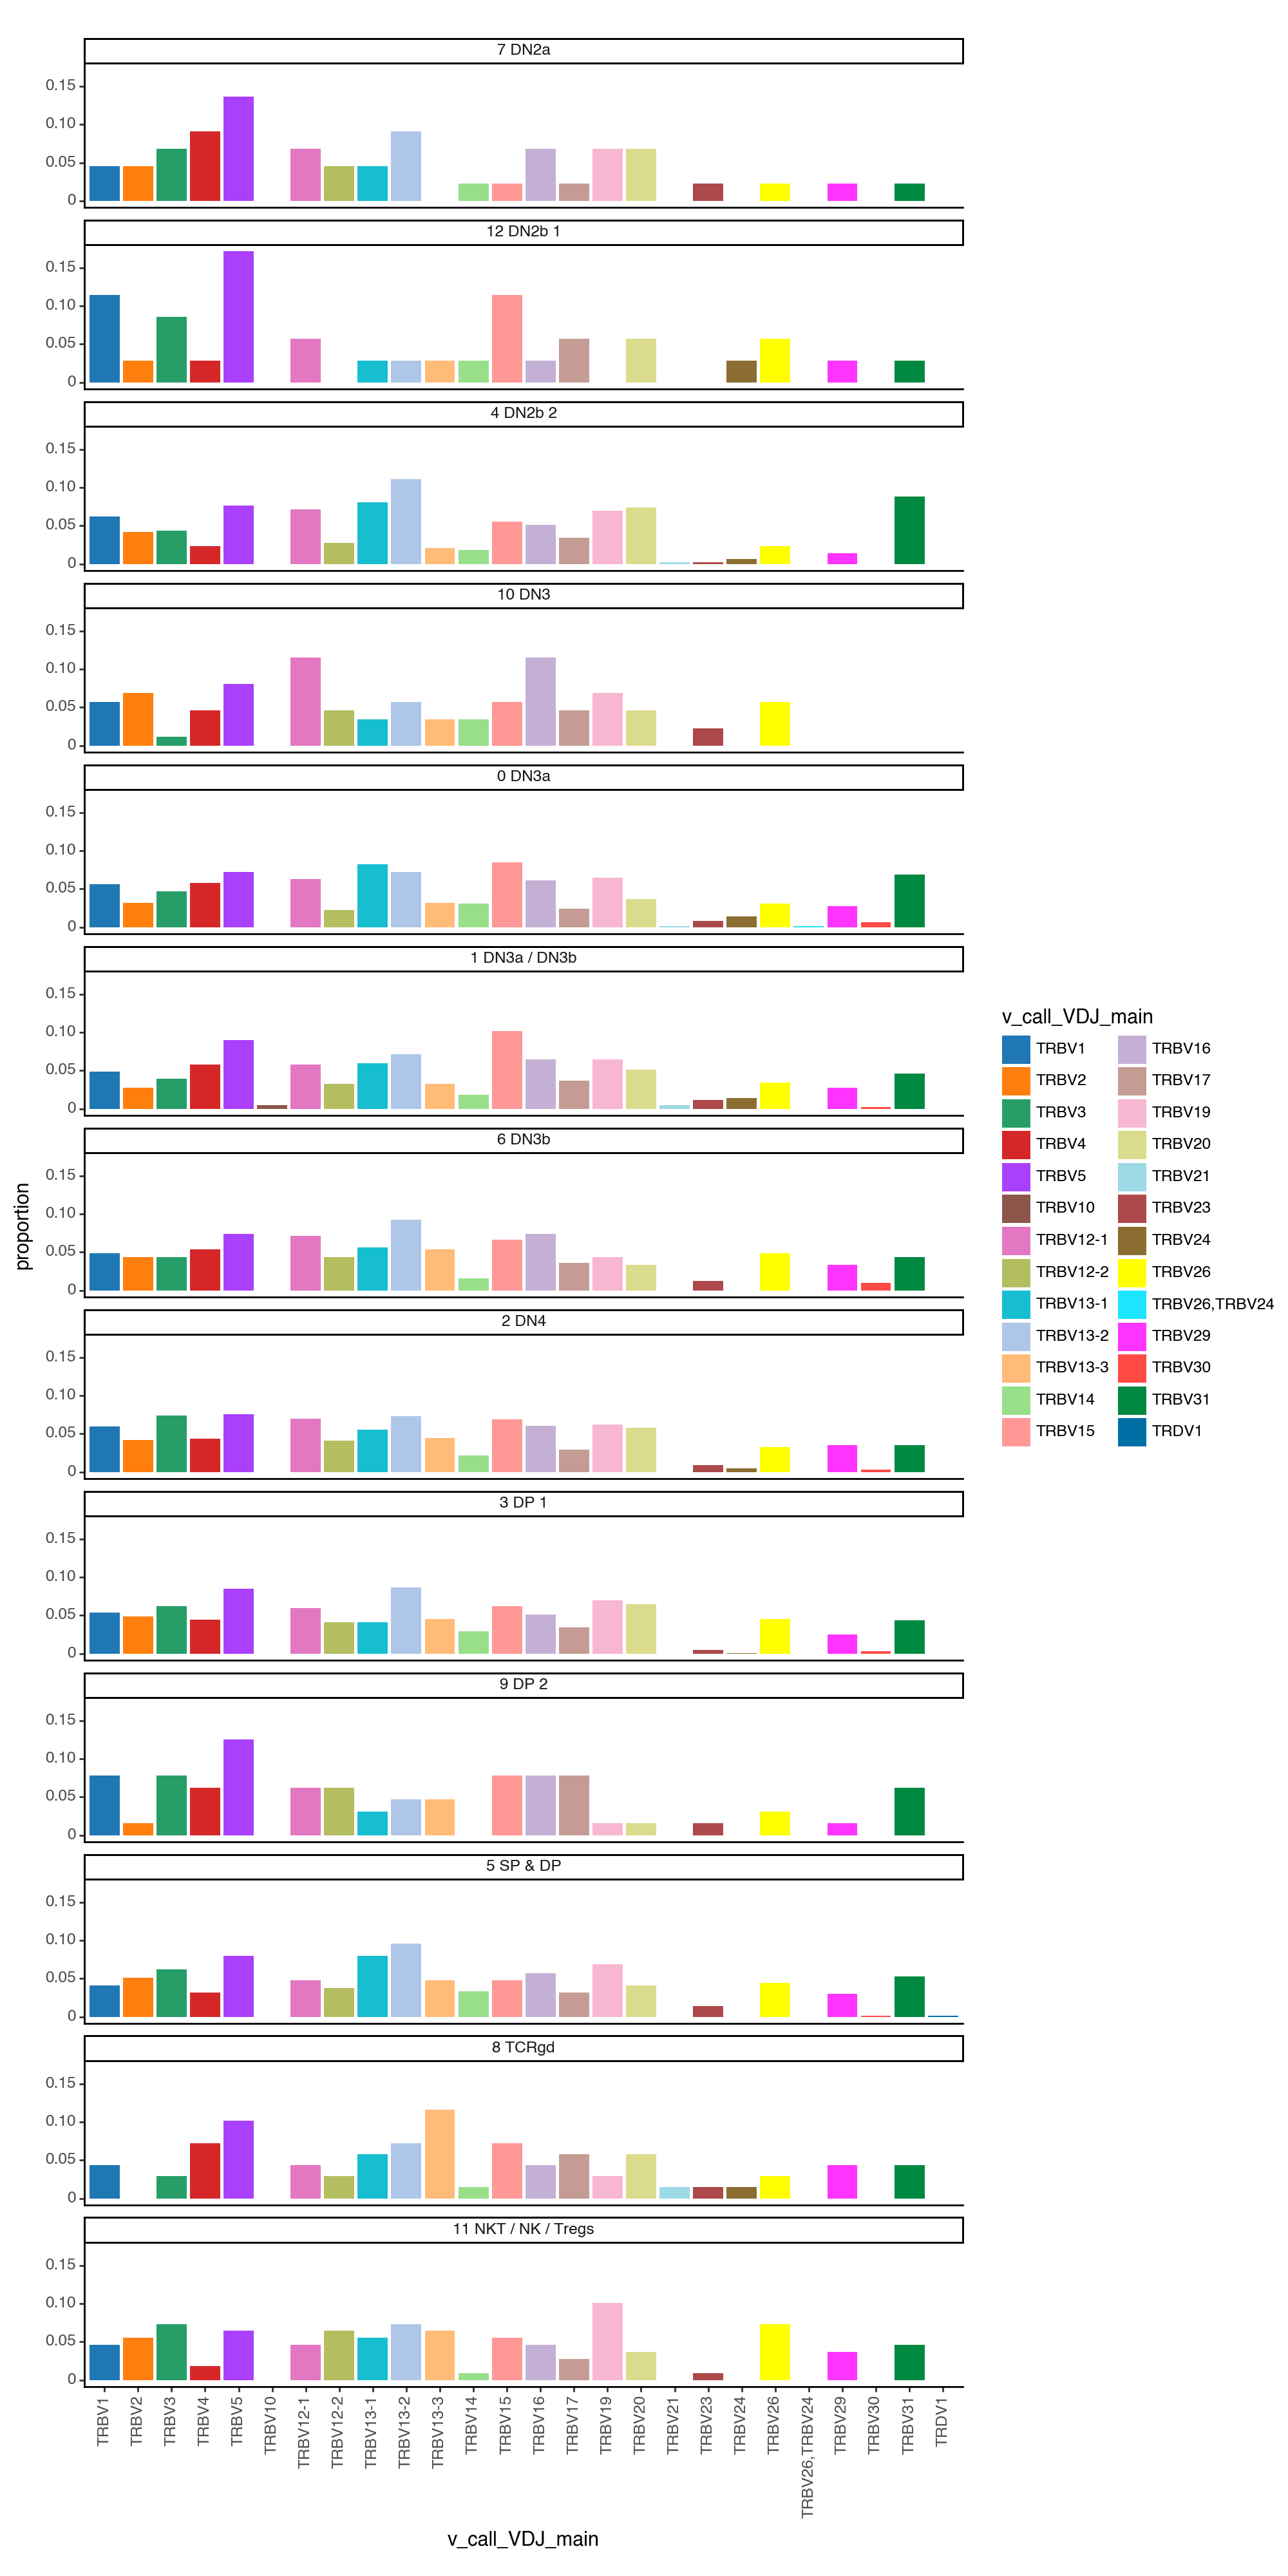

<Figure Size: (1000 x 2000)>

In [177]:
options.figure_size = (10, 20)
(
    ggplot(
        working_df,
        aes(x="v_call_VDJ_main", y="proportion", fill="v_call_VDJ_main"),
    )
    + geom_bar(stat="identity")
    + facet_wrap("~leiden", ncol=1)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90))
)

In [178]:
adata_filtered2 = adata[adata.obs["j_call_VJ_main"] != "None"]
adata_filtered2 = adata_filtered2[adata_filtered2.obs["j_call_VJ_main"] != "No_contig"]

In [179]:
adata_filtered2

View of AnnData object with n_obs × n_vars = 1506 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'has_contig', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j

In [180]:
working_df = pd.DataFrame(adata_filtered2.obs.groupby("leiden")["j_call_VJ_main"].value_counts())
working_df

j_call_VJ_main
leiden              j_call_VJ_main                
7 DN2a              TRAJ7                        2
                    TRAJ2                        1
                    TRAJ15                       1
                    TRAJ22                       1
                    TRAJ38                       1
...                                            ...
11 NKT / NK / Tregs TRAJ16                       0
                    TRAJ15                       0
                    TRAJ11                       0
                    TRAJ7                        0
                    TRDJ1                        0

[637 rows x 1 columns]

In [181]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

leiden j_call_VJ_main  counts
0                 7 DN2a          TRAJ7       2
1                 7 DN2a          TRAJ2       1
2                 7 DN2a         TRAJ15       1
3                 7 DN2a         TRAJ22       1
4                 7 DN2a         TRAJ38       1
..                   ...            ...     ...
632  11 NKT / NK / Tregs         TRAJ16       0
633  11 NKT / NK / Tregs         TRAJ15       0
634  11 NKT / NK / Tregs         TRAJ11       0
635  11 NKT / NK / Tregs          TRAJ7       0
636  11 NKT / NK / Tregs          TRDJ1       0

[637 rows x 3 columns]

In [182]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.leiden.unique():
    tmp = working_df[working_df["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'7 DN2a': 13,
 '12 DN2b 1': 3,
 '4 DN2b 2': 63,
 '10 DN3': 7,
 '0 DN3a': 21,
 '1 DN3a / DN3b': 29,
 '6 DN3b': 15,
 '2 DN4': 207,
 '3 DP 1': 476,
 '9 DP 2': 10,
 '5 SP & DP': 539,
 '8 TCRgd': 13,
 '11 NKT / NK / Tregs': 110}

In [183]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [184]:
## Reordering
working_df["leiden"] = working_df[
    "leiden"
].cat.reorder_categories(
    [
        "7 DN2a",
        "12 DN2b 1",
        "4 DN2b 2",
        "10 DN3",
        "0 DN3a",
        "1 DN3a / DN3b",
        "6 DN3b",
        "2 DN4",
        "3 DP 1",
        "9 DP 2",
        "5 SP & DP",
        "8 TCRgd",
        "11 NKT / NK / Tregs",
    ]
)

In [185]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [186]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

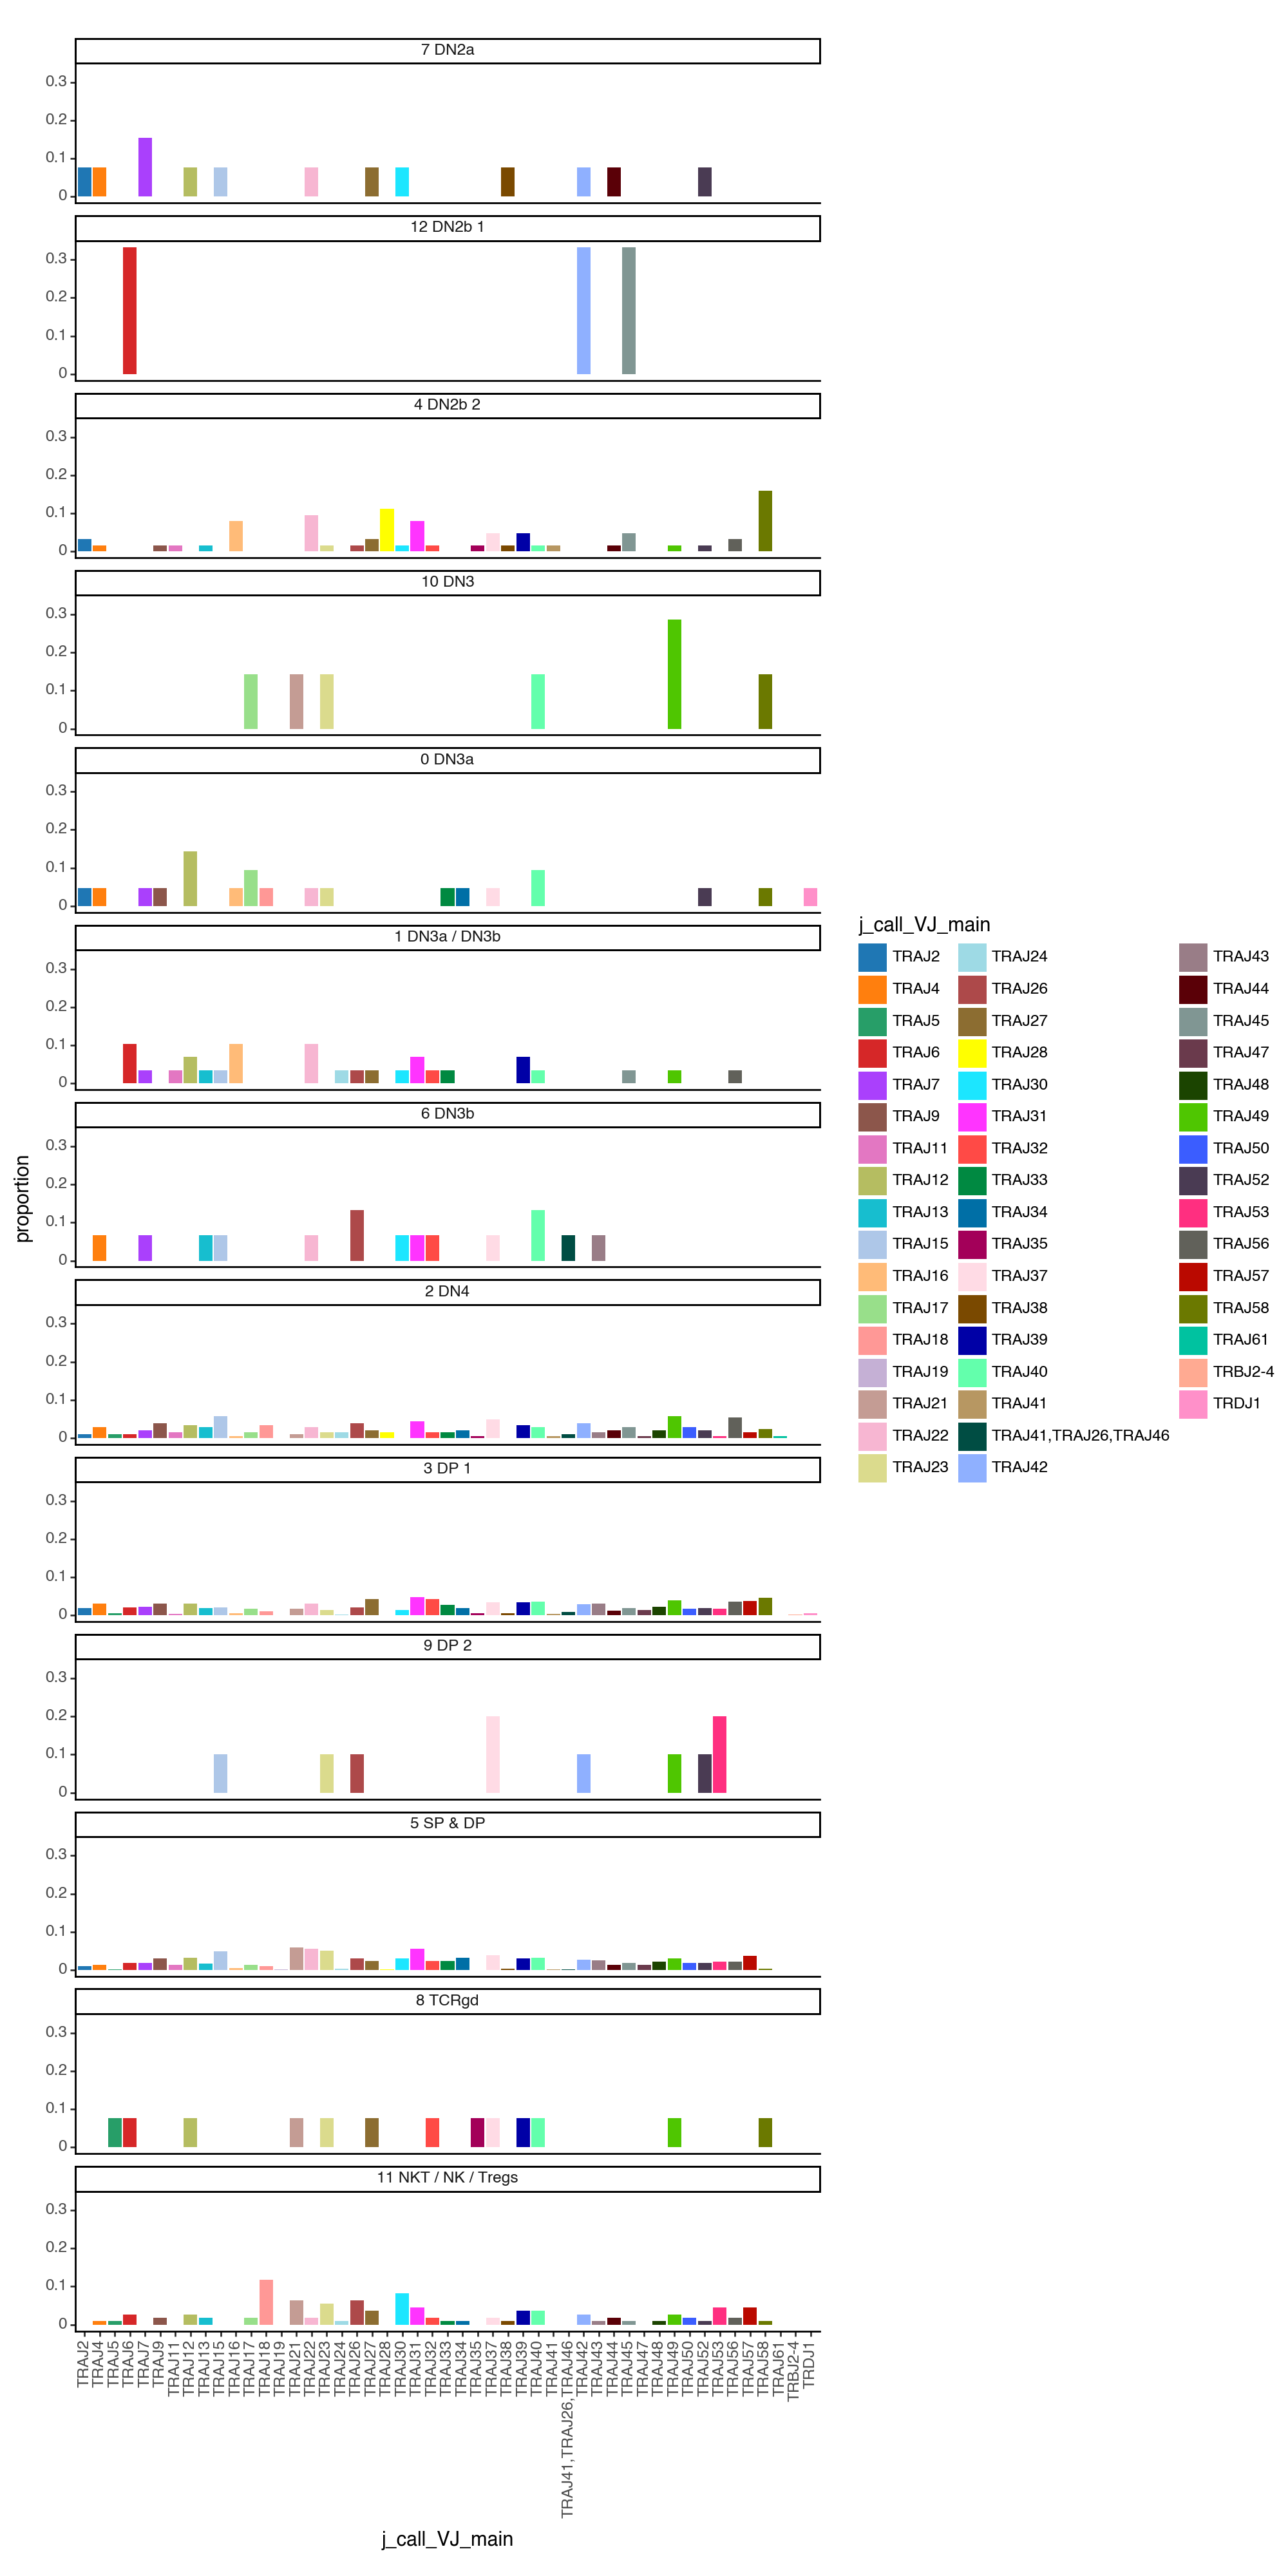

<Figure Size: (1000 x 2000)>

In [187]:
options.figure_size = (10, 20)
(
    ggplot(
        working_df,
        aes(x="j_call_VJ_main", y="proportion", fill="j_call_VJ_main"),
    )
    + geom_bar(stat="identity")
    + facet_wrap("~leiden", ncol=1)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90))
)

## Productive vs Non-productive??? 

In [111]:
adata_filtered = adata_contig[adata_contig.obs["productive_VJ"] != "None"]

/var/folders/x6/w5mj53710kqfd0s039gvbv880000gs/T/ipykernel_13025/3949010466.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


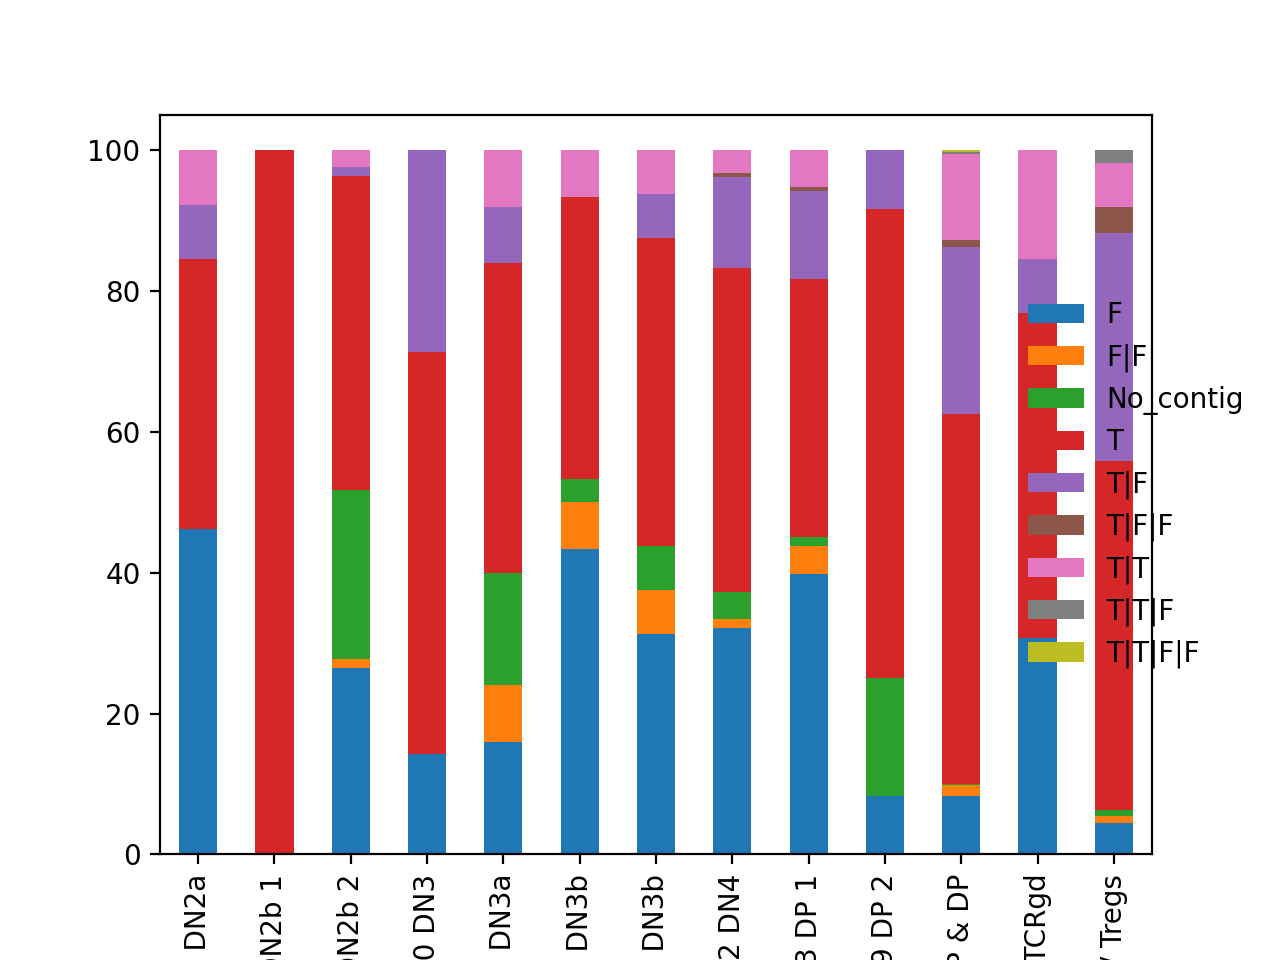

In [112]:
#adat_filtered - removed no_contig + none
adata_filtered.obs["leiden"] = adata_filtered.obs["leiden"].cat.reorder_categories(
    [
        "7 DN2a",
        "12 DN2b 1",
        "4 DN2b 2",
        "10 DN3",
        "0 DN3a",
        "1 DN3a / DN3b",
        "6 DN3b",
        "2 DN4",
        "3 DP 1",
        "9 DP 2",
        "5 SP & DP",
        "8 TCRgd",
        "11 NKT / NK / Tregs",
    ]
)


options.figure_size = (10, 20)

pd.crosstab(
    adata_filtered.obs["leiden"],
    adata_filtered.obs["productive_VJ"],
).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(0.85, 0.5), loc="center left", frameon=False)

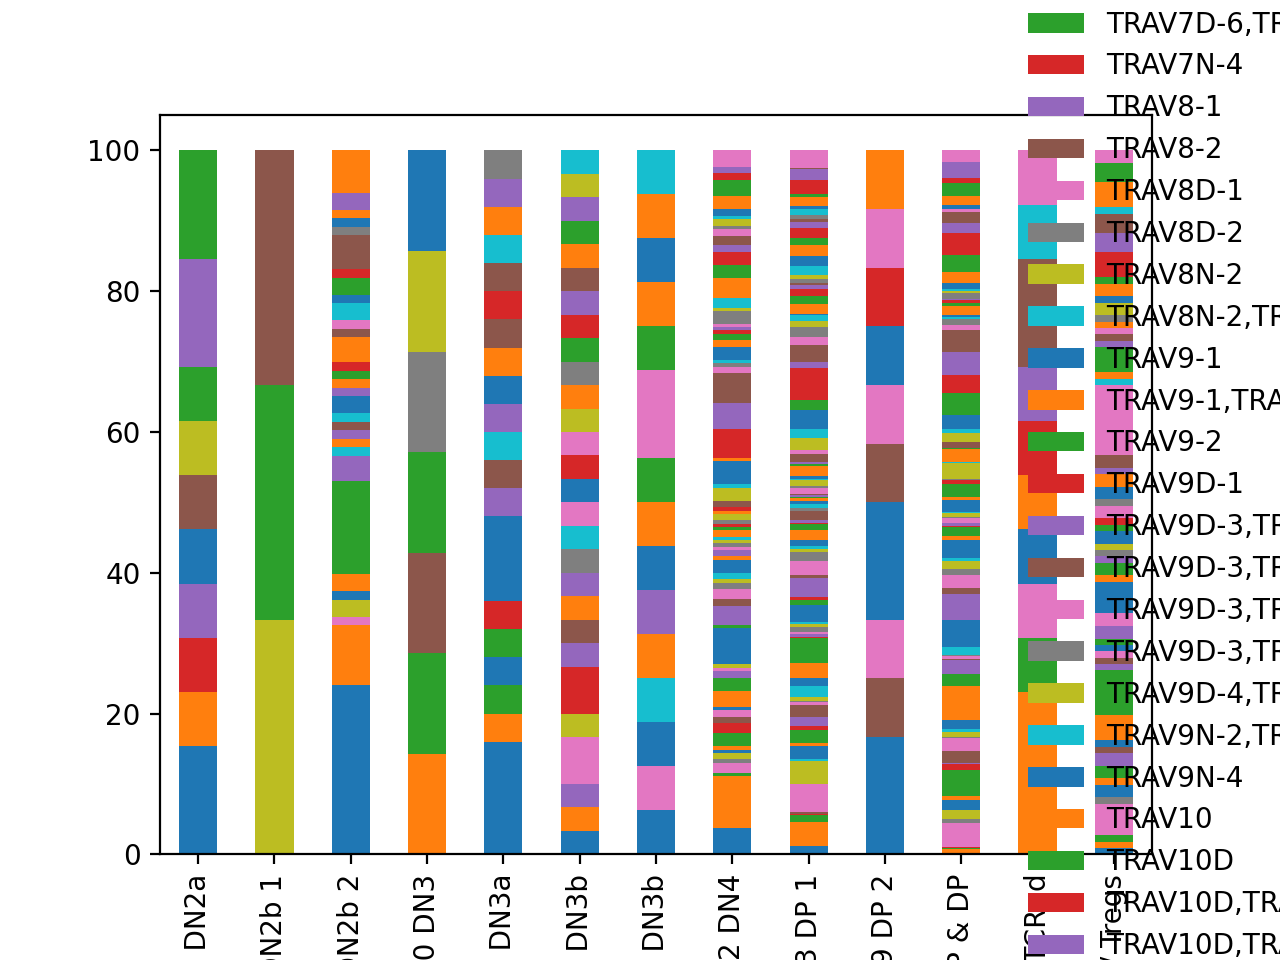

In [113]:
#adat_filtered - removed no_contig + none
adata_filtered.obs["leiden"] = adata_filtered.obs["leiden"].cat.reorder_categories(
    [
        "7 DN2a",
        "12 DN2b 1",
        "4 DN2b 2",
        "10 DN3",
        "0 DN3a",
        "1 DN3a / DN3b",
        "6 DN3b",
        "2 DN4",
        "3 DP 1",
        "9 DP 2",
        "5 SP & DP",
        "8 TCRgd",
        "11 NKT / NK / Tregs",
    ]
)


options.figure_size = (10, 20)

pd.crosstab(
    adata_filtered.obs["leiden"],
    adata_filtered.obs["v_call_VJ_main"],
).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(0.85, 0.5), loc="center left", frameon=False)

In [ ]:
adata_filtered = adata_contig[adata_contig.obs["productive_VDJ"] != "None"]

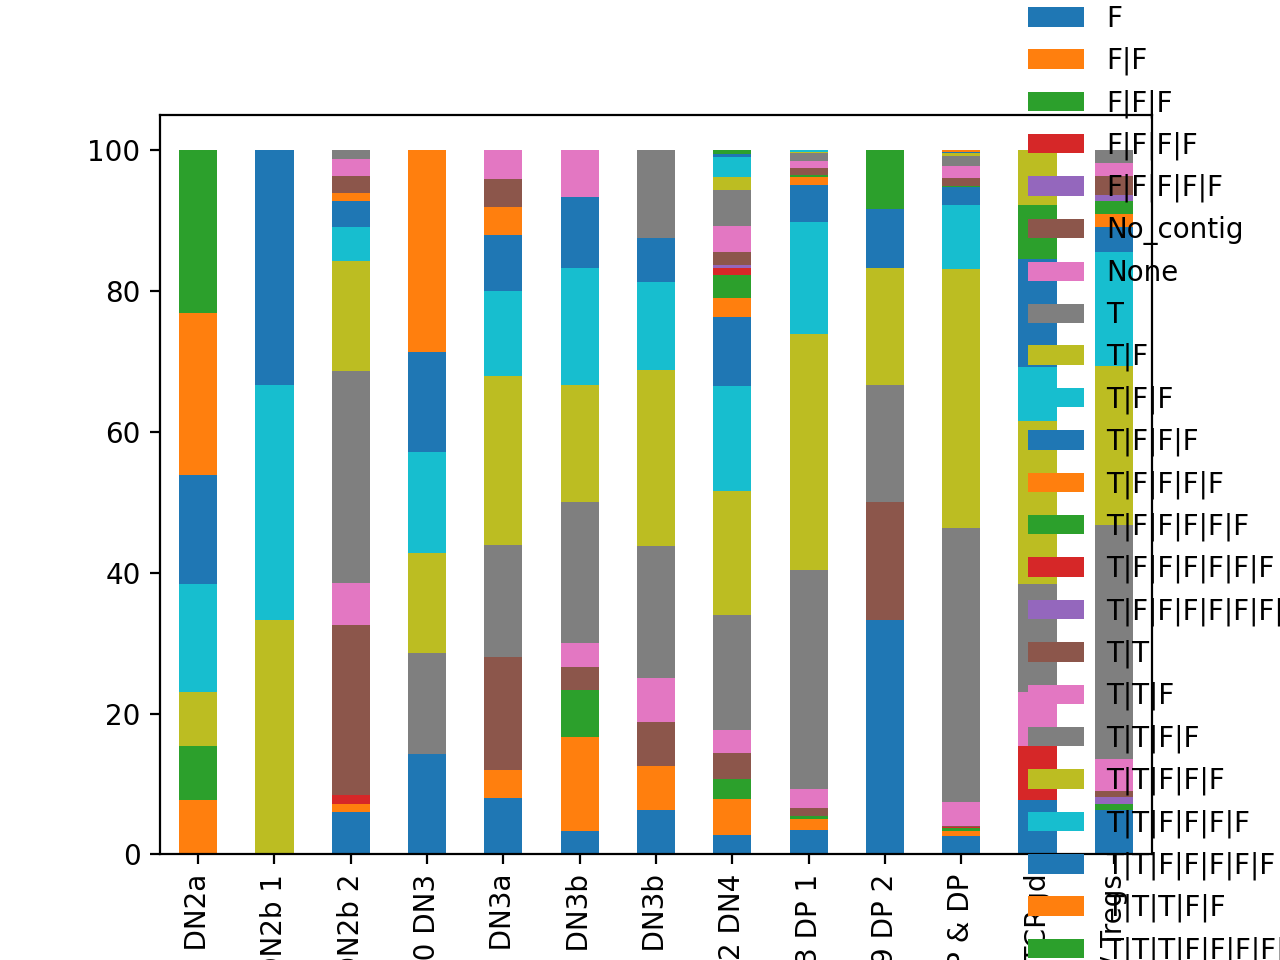

In [114]:
#adat_filtered - removed no_contig + none
adata_filtered.obs["leiden"] = adata_filtered.obs["leiden"].cat.reorder_categories(
    [
        "7 DN2a",
        "12 DN2b 1",
        "4 DN2b 2",
        "10 DN3",
        "0 DN3a",
        "1 DN3a / DN3b",
        "6 DN3b",
        "2 DN4",
        "3 DP 1",
        "9 DP 2",
        "5 SP & DP",
        "8 TCRgd",
        "11 NKT / NK / Tregs",
    ]
)


options.figure_size = (10, 20)

pd.crosstab(
    adata_filtered.obs["leiden"],
    adata_filtered.obs["productive_VDJ"],
).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(0.85, 0.5), loc="center left", frameon=False)

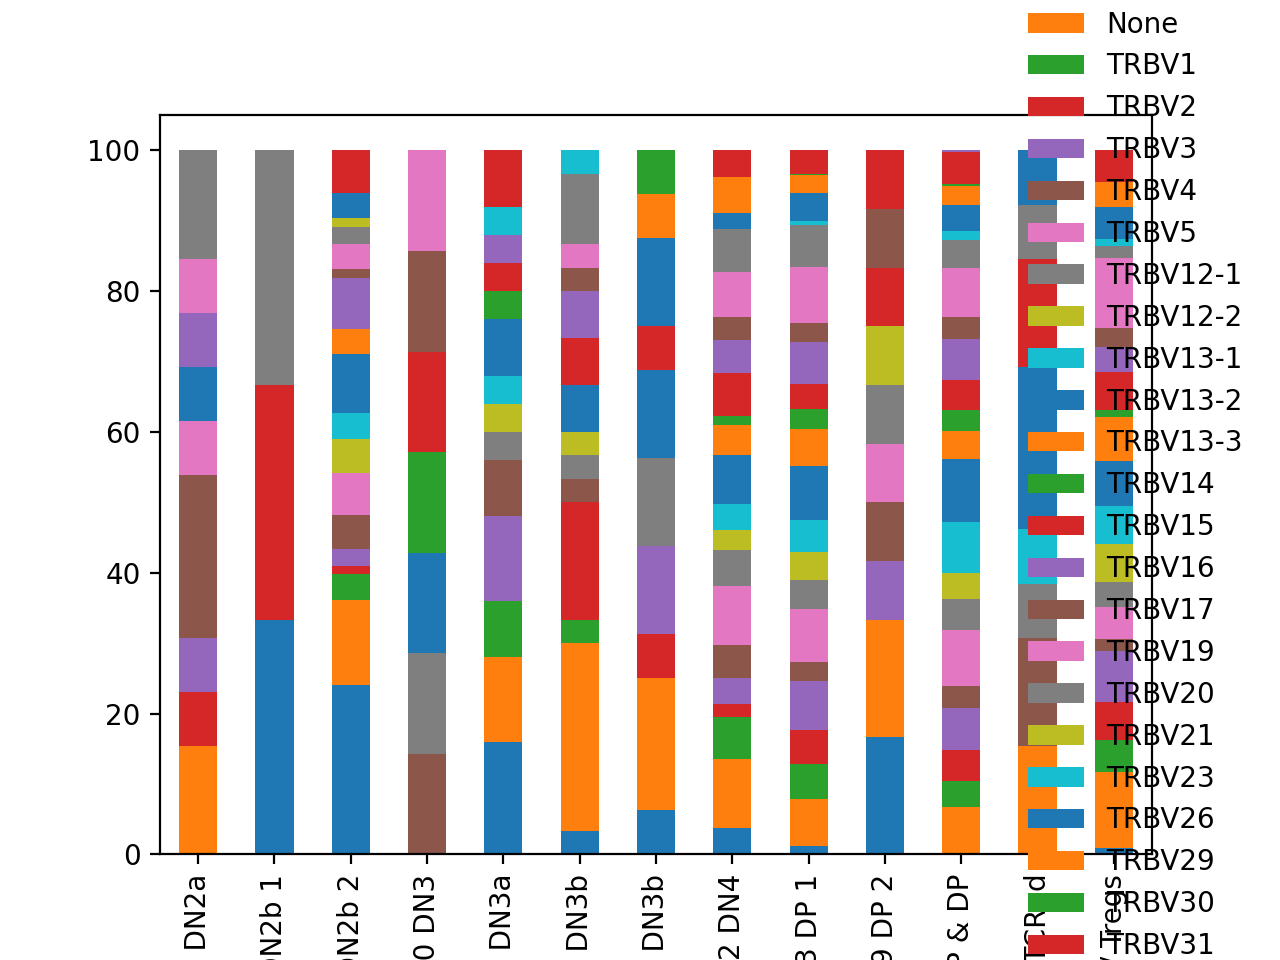

In [115]:
#adat_filtered - removed no_contig + none
adata_filtered.obs["leiden"] = adata_filtered.obs["leiden"].cat.reorder_categories(
    [
        "7 DN2a",
        "12 DN2b 1",
        "4 DN2b 2",
        "10 DN3",
        "0 DN3a",
        "1 DN3a / DN3b",
        "6 DN3b",
        "2 DN4",
        "3 DP 1",
        "9 DP 2",
        "5 SP & DP",
        "8 TCRgd",
        "11 NKT / NK / Tregs",
    ]
)


options.figure_size = (10, 20)

pd.crosstab(
    adata_filtered.obs["leiden"],
    adata_filtered.obs["v_call_VDJ_main"],
).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(0.85, 0.5), loc="center left", frameon=False)

In [188]:
adata_filtered = adata[adata.obs["productive_VJ"] != "None"]
adata_filtered = adata_filtered[adata_filtered.obs["productive_VJ"] != "No_contig"]

In [189]:
adata_filtered

View of AnnData object with n_obs × n_vars = 1506 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'has_contig', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j

In [190]:
working_df = pd.DataFrame(adata_filtered.obs.groupby("leiden")["productive_VJ"].value_counts())
working_df

productive_VJ
leiden              productive_VJ               
7 DN2a              F                          6
                    T                          5
                    T|F                        1
                    T|T                        1
                    F|F                        0
...                                          ...
11 NKT / NK / Tregs F                          5
                    T|F|F                      4
                    T|T|F                      2
                    F|F                        1
                    T|T|F|F                    0

[104 rows x 1 columns]

In [191]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

leiden productive_VJ  counts
0                 7 DN2a             F       6
1                 7 DN2a             T       5
2                 7 DN2a           T|F       1
3                 7 DN2a           T|T       1
4                 7 DN2a           F|F       0
..                   ...           ...     ...
99   11 NKT / NK / Tregs             F       5
100  11 NKT / NK / Tregs         T|F|F       4
101  11 NKT / NK / Tregs         T|T|F       2
102  11 NKT / NK / Tregs           F|F       1
103  11 NKT / NK / Tregs       T|T|F|F       0

[104 rows x 3 columns]

In [192]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.leiden.unique():
    tmp = working_df[working_df["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'7 DN2a': 13,
 '12 DN2b 1': 3,
 '4 DN2b 2': 63,
 '10 DN3': 7,
 '0 DN3a': 21,
 '1 DN3a / DN3b': 29,
 '6 DN3b': 15,
 '2 DN4': 207,
 '3 DP 1': 476,
 '9 DP 2': 10,
 '5 SP & DP': 539,
 '8 TCRgd': 13,
 '11 NKT / NK / Tregs': 110}

In [193]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [194]:
## Reordering
working_df["leiden"] = working_df[
    "leiden"
].cat.reorder_categories(
    [
        "7 DN2a",
        "12 DN2b 1",
        "4 DN2b 2",
        "10 DN3",
        "0 DN3a",
        "1 DN3a / DN3b",
        "6 DN3b",
        "2 DN4",
        "3 DP 1",
        "9 DP 2",
        "5 SP & DP",
        "8 TCRgd",
        "11 NKT / NK / Tregs",
    ]
)

In [195]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [196]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

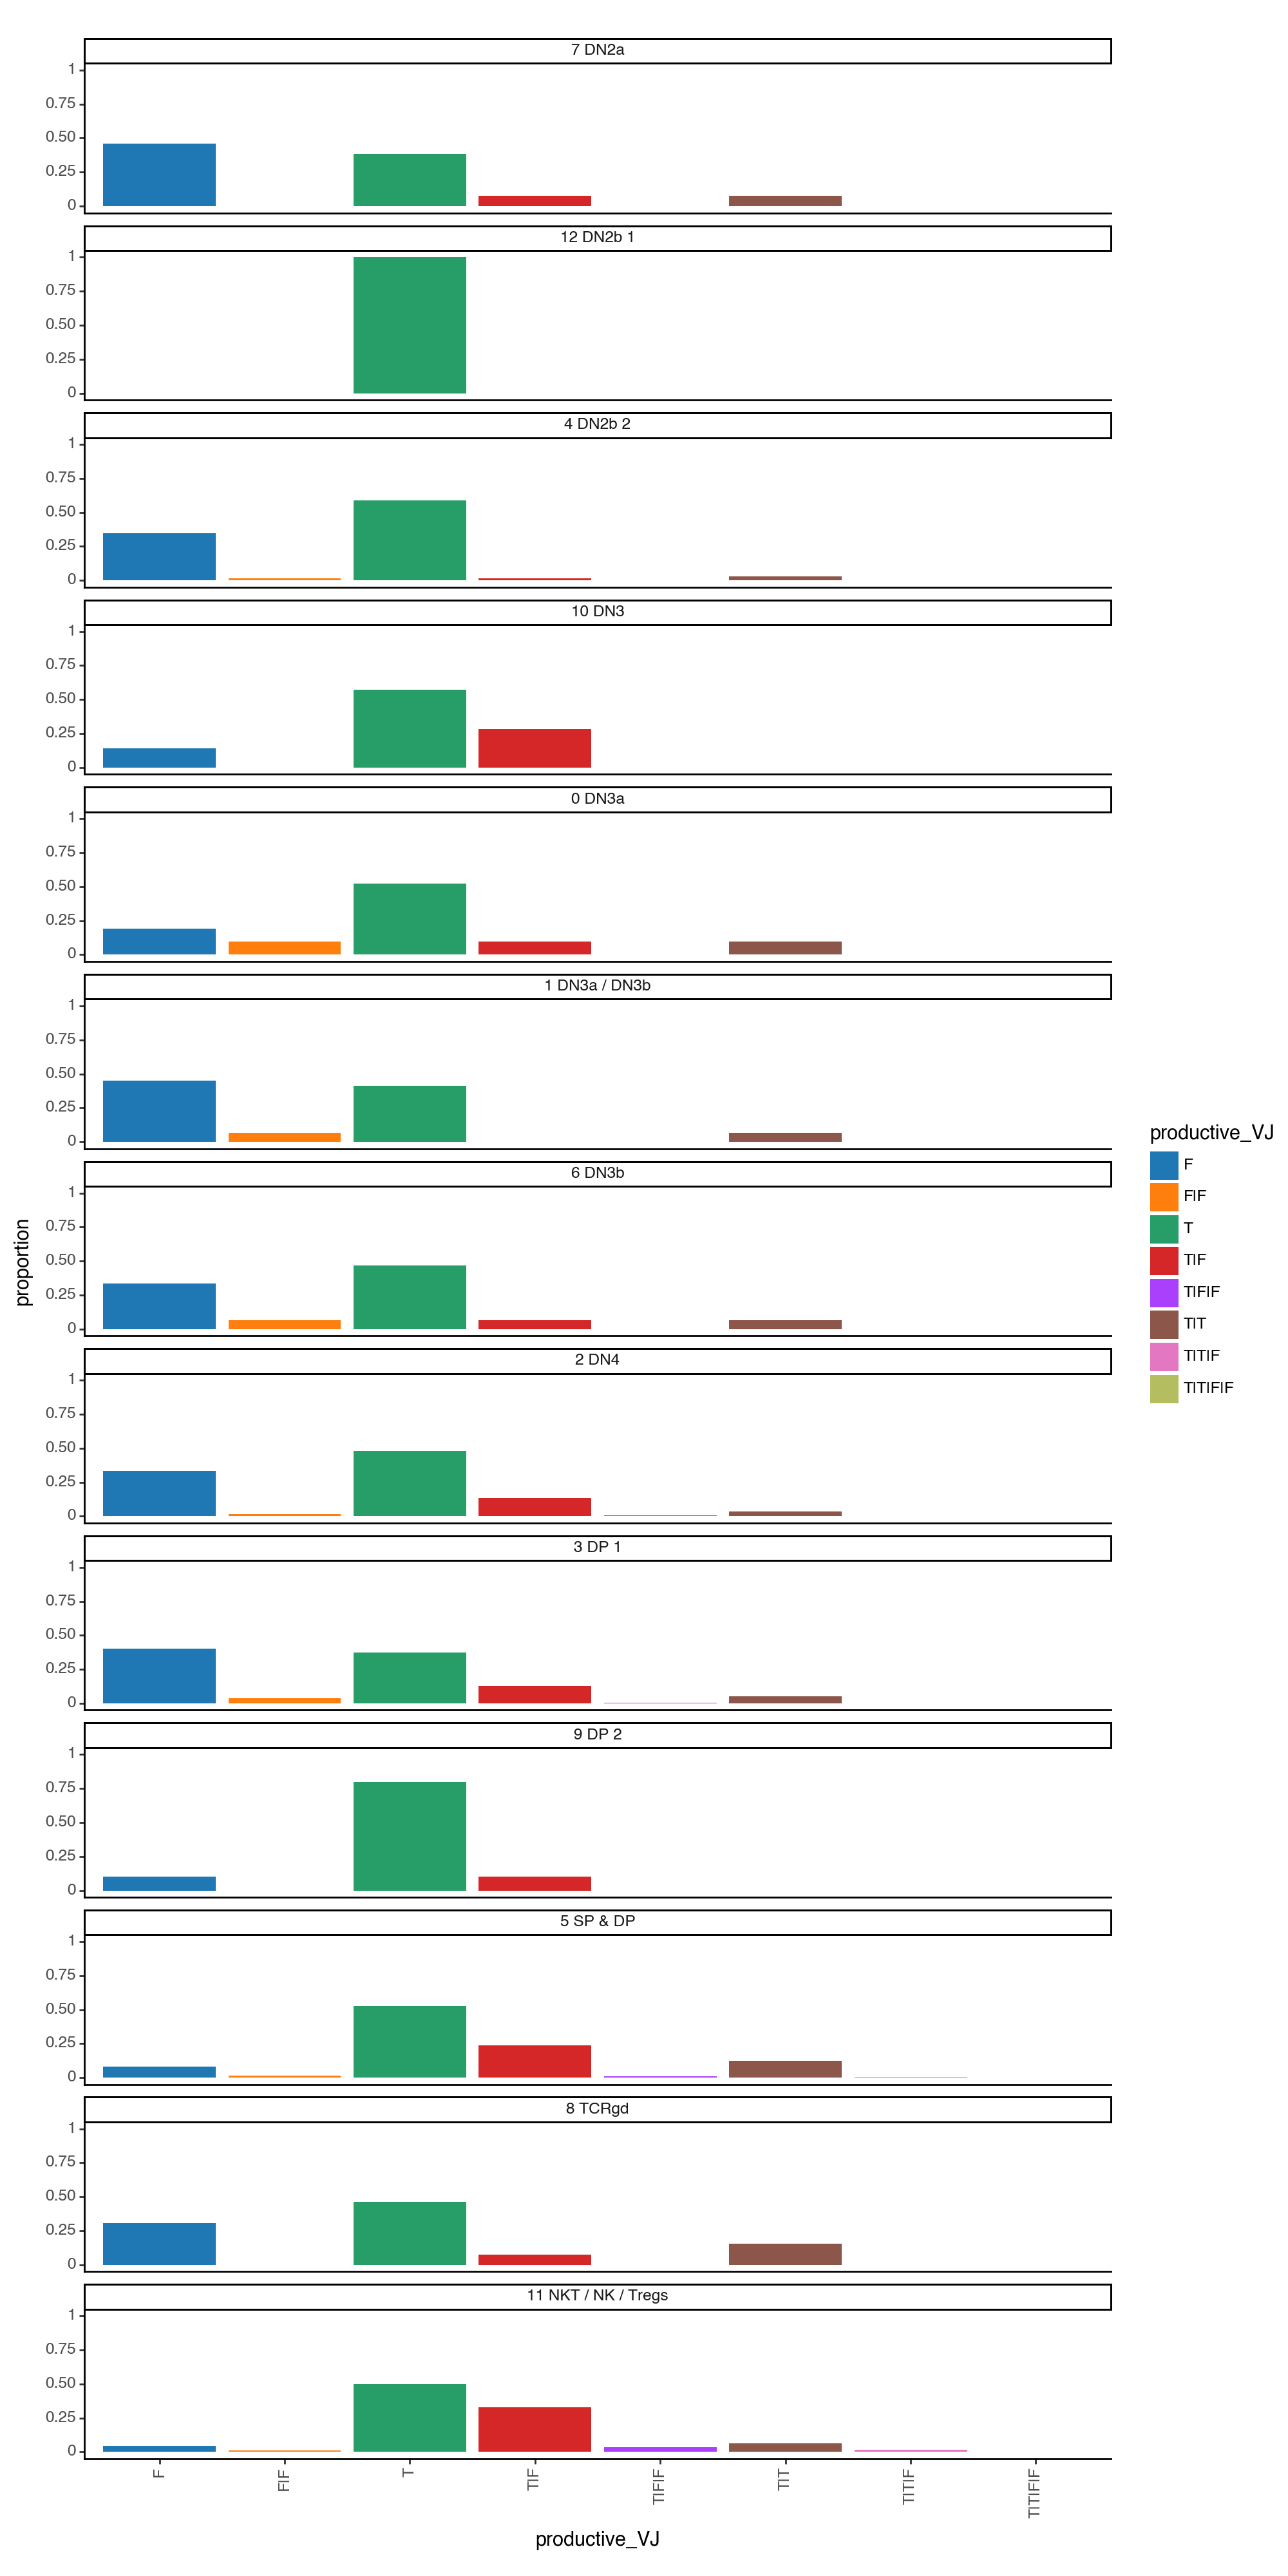

<Figure Size: (1000 x 2000)>

In [197]:
options.figure_size = (10, 20)
(
    ggplot(
        working_df,
        aes(x="productive_VJ", y="proportion", fill="productive_VJ"),
    )
    + geom_bar(stat="identity")
    + facet_wrap("~leiden", ncol=1)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90))
)

In [198]:
adata_filtered = adata[adata.obs["productive_VDJ"] != "None"]
adata_filtered = adata_filtered[adata_filtered.obs["productive_VDJ"] != "No_contig"]

In [199]:
adata_filtered

View of AnnData object with n_obs × n_vars = 6253 × 2631
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_hemo', 'pct_counts_hemo', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'predicted_doublet', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden', 'batch', 'has_contig', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'c_call_gdT_VDJ', 'productive_gdT_VDJ', 'duplicate_count_abT_VDJ', 'duplicate_count_abT_VJ', 'duplicate_count_gdT_VDJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j

In [200]:
working_df = pd.DataFrame(adata_filtered.obs.groupby("leiden")["productive_VDJ"].value_counts())
working_df

productive_VDJ
leiden              productive_VDJ                 
7 DN2a              T|F|F|F                      13
                    T|F|F|F|F                    11
                    F|F|F                         7
                    F|F                           7
                    T|F|F|F|F|F                   7
...                                             ...
11 NKT / NK / Tregs T|T|F|F|F                     0
                    F|F|F|F|F|F|F                 0
                    F|F|F|F|F|F                   0
                    F|F|F|F                       0
                    T|T|T|F|F|F|F|F               0

[338 rows x 1 columns]

In [201]:
working_df.columns =["counts"]
#need to make it into each row, so just reset index.. inplace = Trus is a shortcut to assign the change to the current object.
working_df.reset_index(inplace = True)
working_df

leiden   productive_VDJ  counts
0                 7 DN2a          T|F|F|F      13
1                 7 DN2a        T|F|F|F|F      11
2                 7 DN2a            F|F|F       7
3                 7 DN2a              F|F       7
4                 7 DN2a      T|F|F|F|F|F       7
..                   ...              ...     ...
333  11 NKT / NK / Tregs        T|T|F|F|F       0
334  11 NKT / NK / Tregs    F|F|F|F|F|F|F       0
335  11 NKT / NK / Tregs      F|F|F|F|F|F       0
336  11 NKT / NK / Tregs          F|F|F|F       0
337  11 NKT / NK / Tregs  T|T|T|F|F|F|F|F       0

[338 rows x 3 columns]

In [202]:
## Now get the number of cells per celltype

total_count_dict = {}
for x in working_df.leiden.unique():
    tmp = working_df[working_df["leiden"] == x]
    total_count_dict[x] = tmp["counts"].sum()
total_count_dict

{'7 DN2a': 66,
 '12 DN2b 1': 37,
 '4 DN2b 2': 468,
 '10 DN3': 90,
 '0 DN3a': 746,
 '1 DN3a / DN3b': 569,
 '6 DN3b': 407,
 '2 DN4': 1486,
 '3 DP 1': 1524,
 '9 DP 2': 71,
 '5 SP & DP': 587,
 '8 TCRgd': 85,
 '11 NKT / NK / Tregs': 117}

In [203]:
working_df["proportion"] = 0
# normalise VDJ counts ie how many cells use each gene per total count per group.
for i, row in working_df.iterrows():
    try:
        working_df.at[i, "proportion"] = row["counts"] / total_count_dict[row["leiden"]]
    except:
        pass

In [204]:
## Reordering
working_df["leiden"] = working_df[
    "leiden"
].cat.reorder_categories(
    [
        "7 DN2a",
        "12 DN2b 1",
        "4 DN2b 2",
        "10 DN3",
        "0 DN3a",
        "1 DN3a / DN3b",
        "6 DN3b",
        "2 DN4",
        "3 DP 1",
        "9 DP 2",
        "5 SP & DP",
        "8 TCRgd",
        "11 NKT / NK / Tregs",
    ]
)

In [205]:
from plotnine import ggplot, aes, facet_grid, geom_bar, theme_bw, facet_wrap, theme_classic, options, theme, element_text, scale_fill_manual


In [206]:
from scanpy.plotting.palettes import default_20, default_28, default_102
# https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
col_palette = default_20 +  default_102
col_palette

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a',
 '#8c6d31',
 '#FFFF00',
 '#1CE6FF',
 '#FF34FF',
 '#FF4A46',
 '#008941',
 '#006FA6',
 '#A30059',
 '#FFDBE5',
 '#7A4900',
 '#0000A6',
 '#63FFAC',
 '#B79762',
 '#004D43',
 '#8FB0FF',
 '#997D87',
 '#5A0007',
 '#809693',
 '#6A3A4C',
 '#1B4400',
 '#4FC601',
 '#3B5DFF',
 '#4A3B53',
 '#FF2F80',
 '#61615A',
 '#BA0900',
 '#6B7900',
 '#00C2A0',
 '#FFAA92',
 '#FF90C9',
 '#B903AA',
 '#D16100',
 '#DDEFFF',
 '#000035',
 '#7B4F4B',
 '#A1C299',
 '#300018',
 '#0AA6D8',
 '#013349',
 '#00846F',
 '#372101',
 '#FFB500',
 '#C2FFED',
 '#A079BF',
 '#CC0744',
 '#C0B9B2',
 '#C2FF99',
 '#001E09',
 '#00489C',
 '#6F0062',
 '#0CBD66',
 '#EEC3FF',
 '#456D75',
 '#B77B68',
 '#7A87A1',
 '#788D66',
 '#885578',
 '#FAD09F',
 '#FF8A9A',
 '#D157A0',
 '#BEC459',
 '#456648',
 '#0086ED',
 '#886F4C',
 '#3

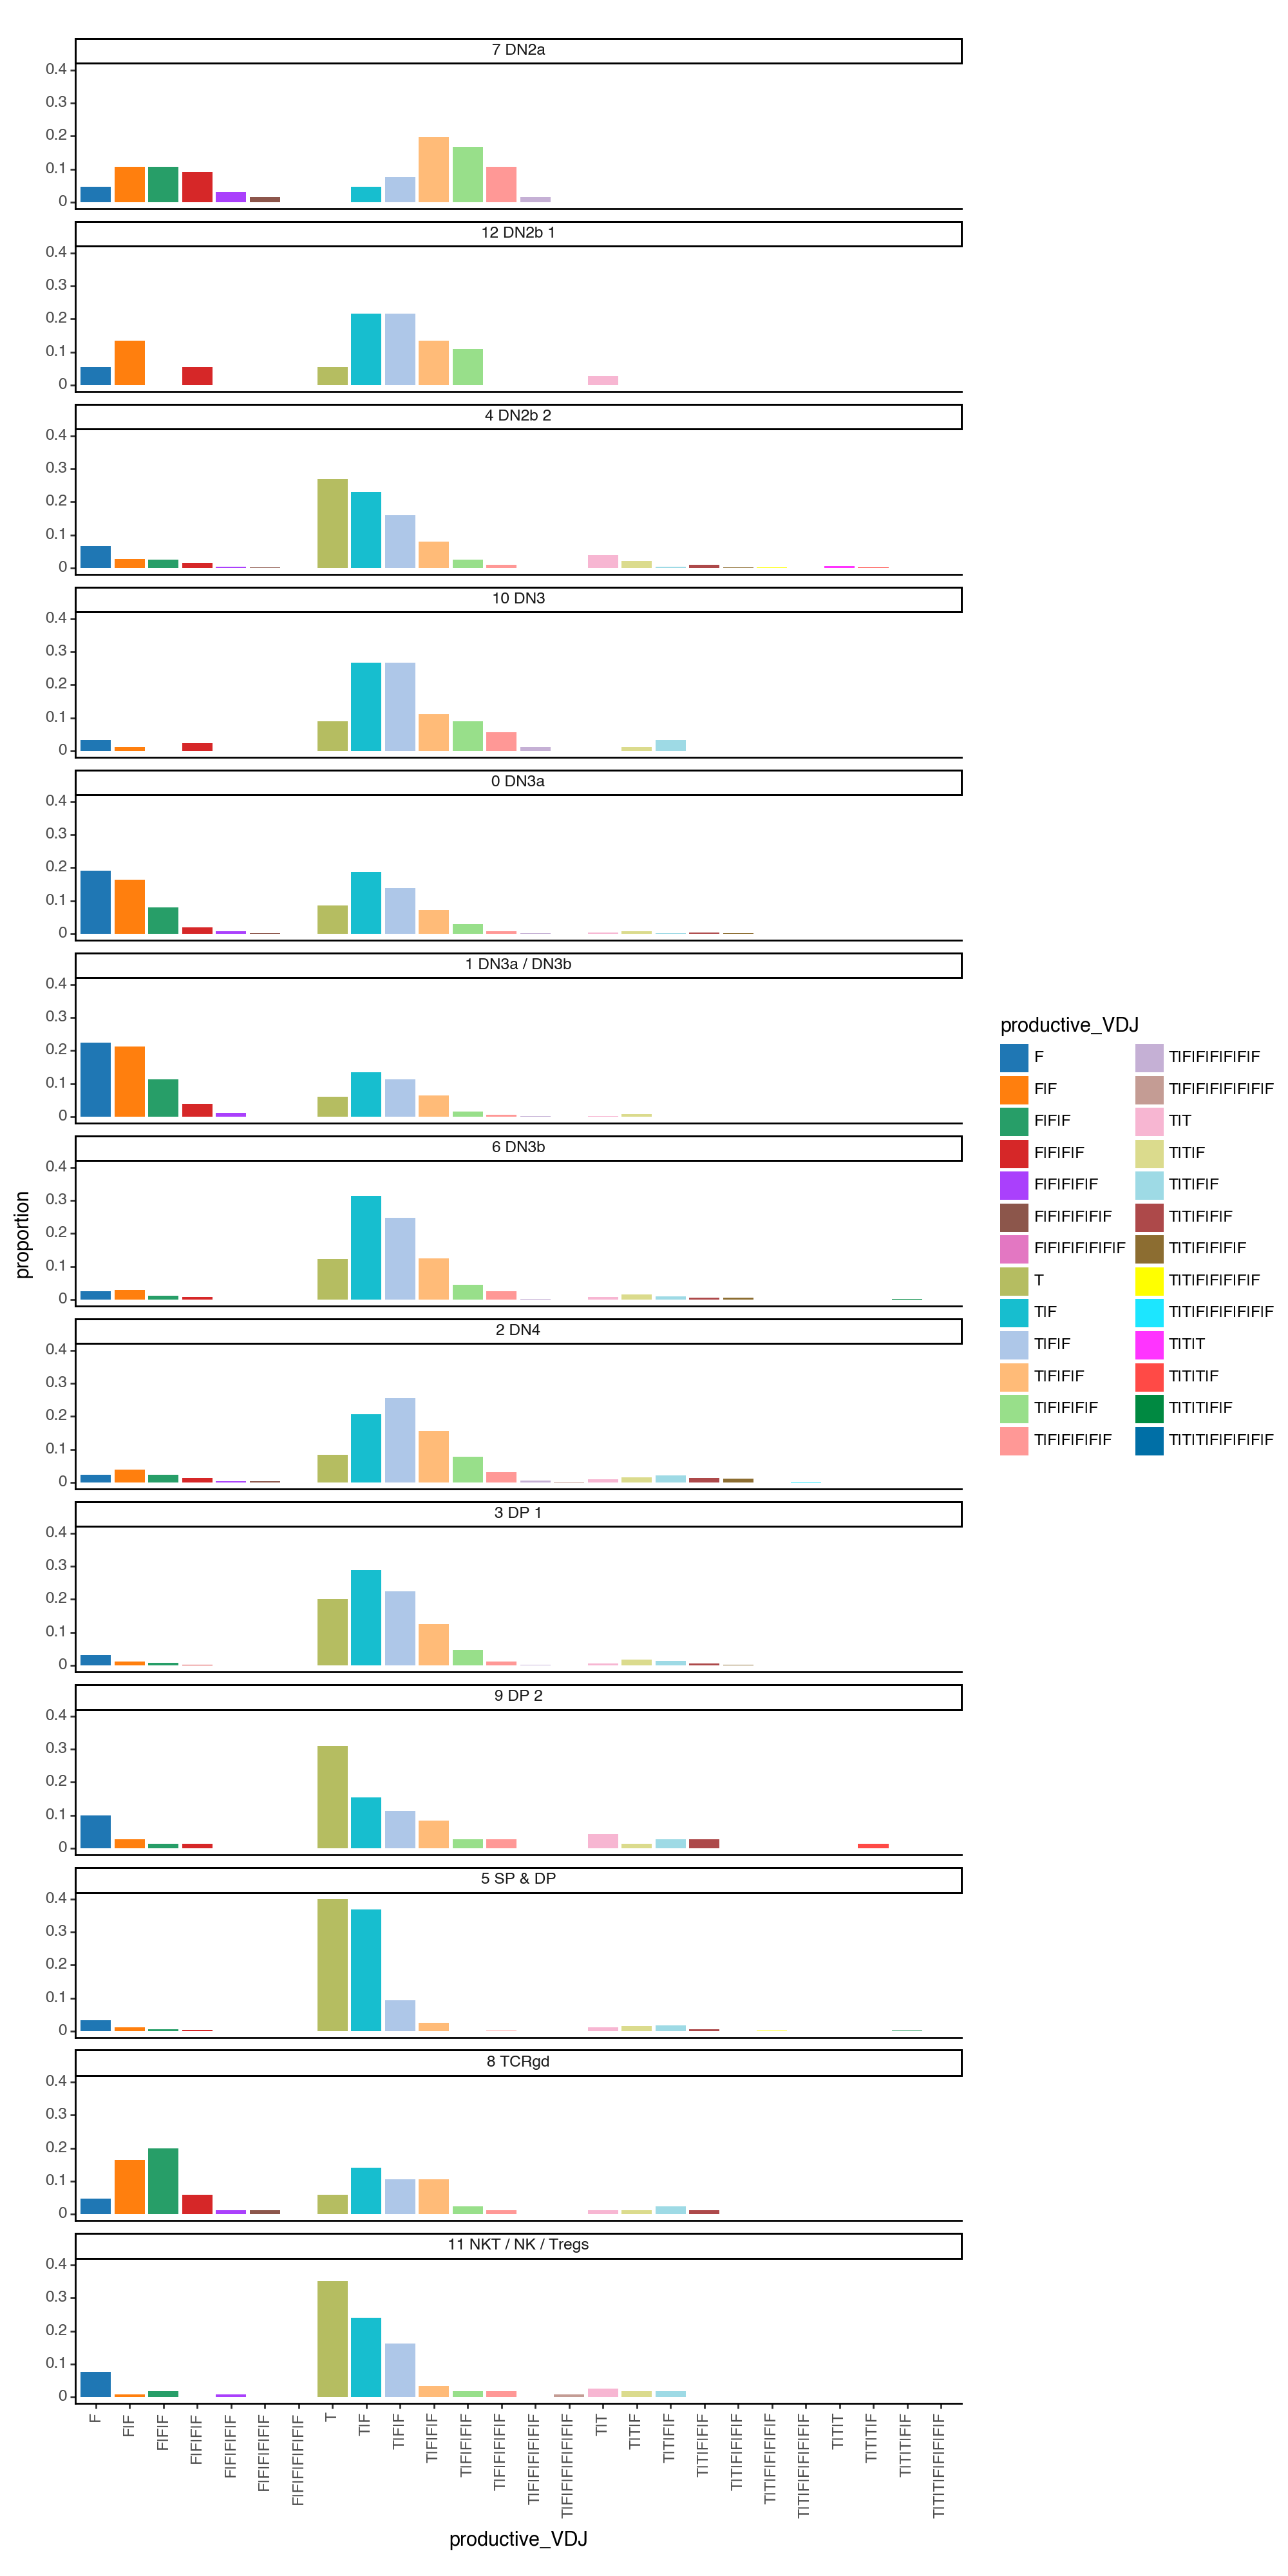

<Figure Size: (1000 x 2000)>

In [207]:
options.figure_size = (10, 20)
(
    ggplot(
        working_df,
        aes(x="productive_VDJ", y="proportion", fill="productive_VDJ"),
    )
    + geom_bar(stat="identity")
    + facet_wrap("~leiden", ncol=1)
    + scale_fill_manual(values=col_palette)
    + theme_classic()
    + theme(axis_text_x=element_text(angle=90))
)

In [ ]:
pb_adata.x